# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Bufo viridis</i> 
## Sample set:

###3 families:
    
    Family 1 : Mother (GR95F), Father (GR96M), 10 offspring (4 male, 6 female) - GR95x96*
    
    Family 2 : Mother (GR93_F), Father (GR94_M), 6 offspring (3 male, 3 female) - 93x94*
    
    Family 3 : Mother (GR13_11female), Father (GR13_12male), 17 offspring (10 male, 7 female) - Bv_19*
    
        ***Note: The Mother and father of family 3 were included on both plate 1 and 2. These samples have been renamed (by Dan)
        to GR13_11female_1 and GR13_11female_2 for plate 1 and 2 respectively. They were then merged before use in the below analyses
        and named GR13_11female. 
        
        ***The same has been done for the male:  GR13_12male_1 and GR13_12male_2 were merged into GR13_12male
    

### Analysis strategy:

    First I will test Ustacks and Cstacks parameters and then run these modules on the dataset has a whole (all families combined) 
    
    Then, at the "Populations" module stage of Stacks, I will separate families and analyse one by one for sex linked markers.


##Contents of this notebook:

####1. Ustacks parameter tests using a subset of samples
####2. Cstacks parameter tests using a subset of samples
####3. Populations parameter tests (for separate families, using all samples in each family)
####4. Identification of sex-linked markers
####5. Map sex-linked markers to the genome(s). 


In [1]:
%matplotlib inline
from __future__ import division
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [2]:
%load_ext rpy2.ipython

##1. Ustacks parameter tests

In [8]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Ustacks/"

In [9]:
## INPUT INCREMENTAL TEST PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                   ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                              ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                    ## Int. eg 7
parent_dir = Incrememntal_test_directory        ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                           ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print "Analsyses will be performed in %s" % parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


Analsyses will be performed in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'Bv19_10M.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Bv19_11F.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Bv19_12F.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Bv19_13F.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Bv19_14M.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm':

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


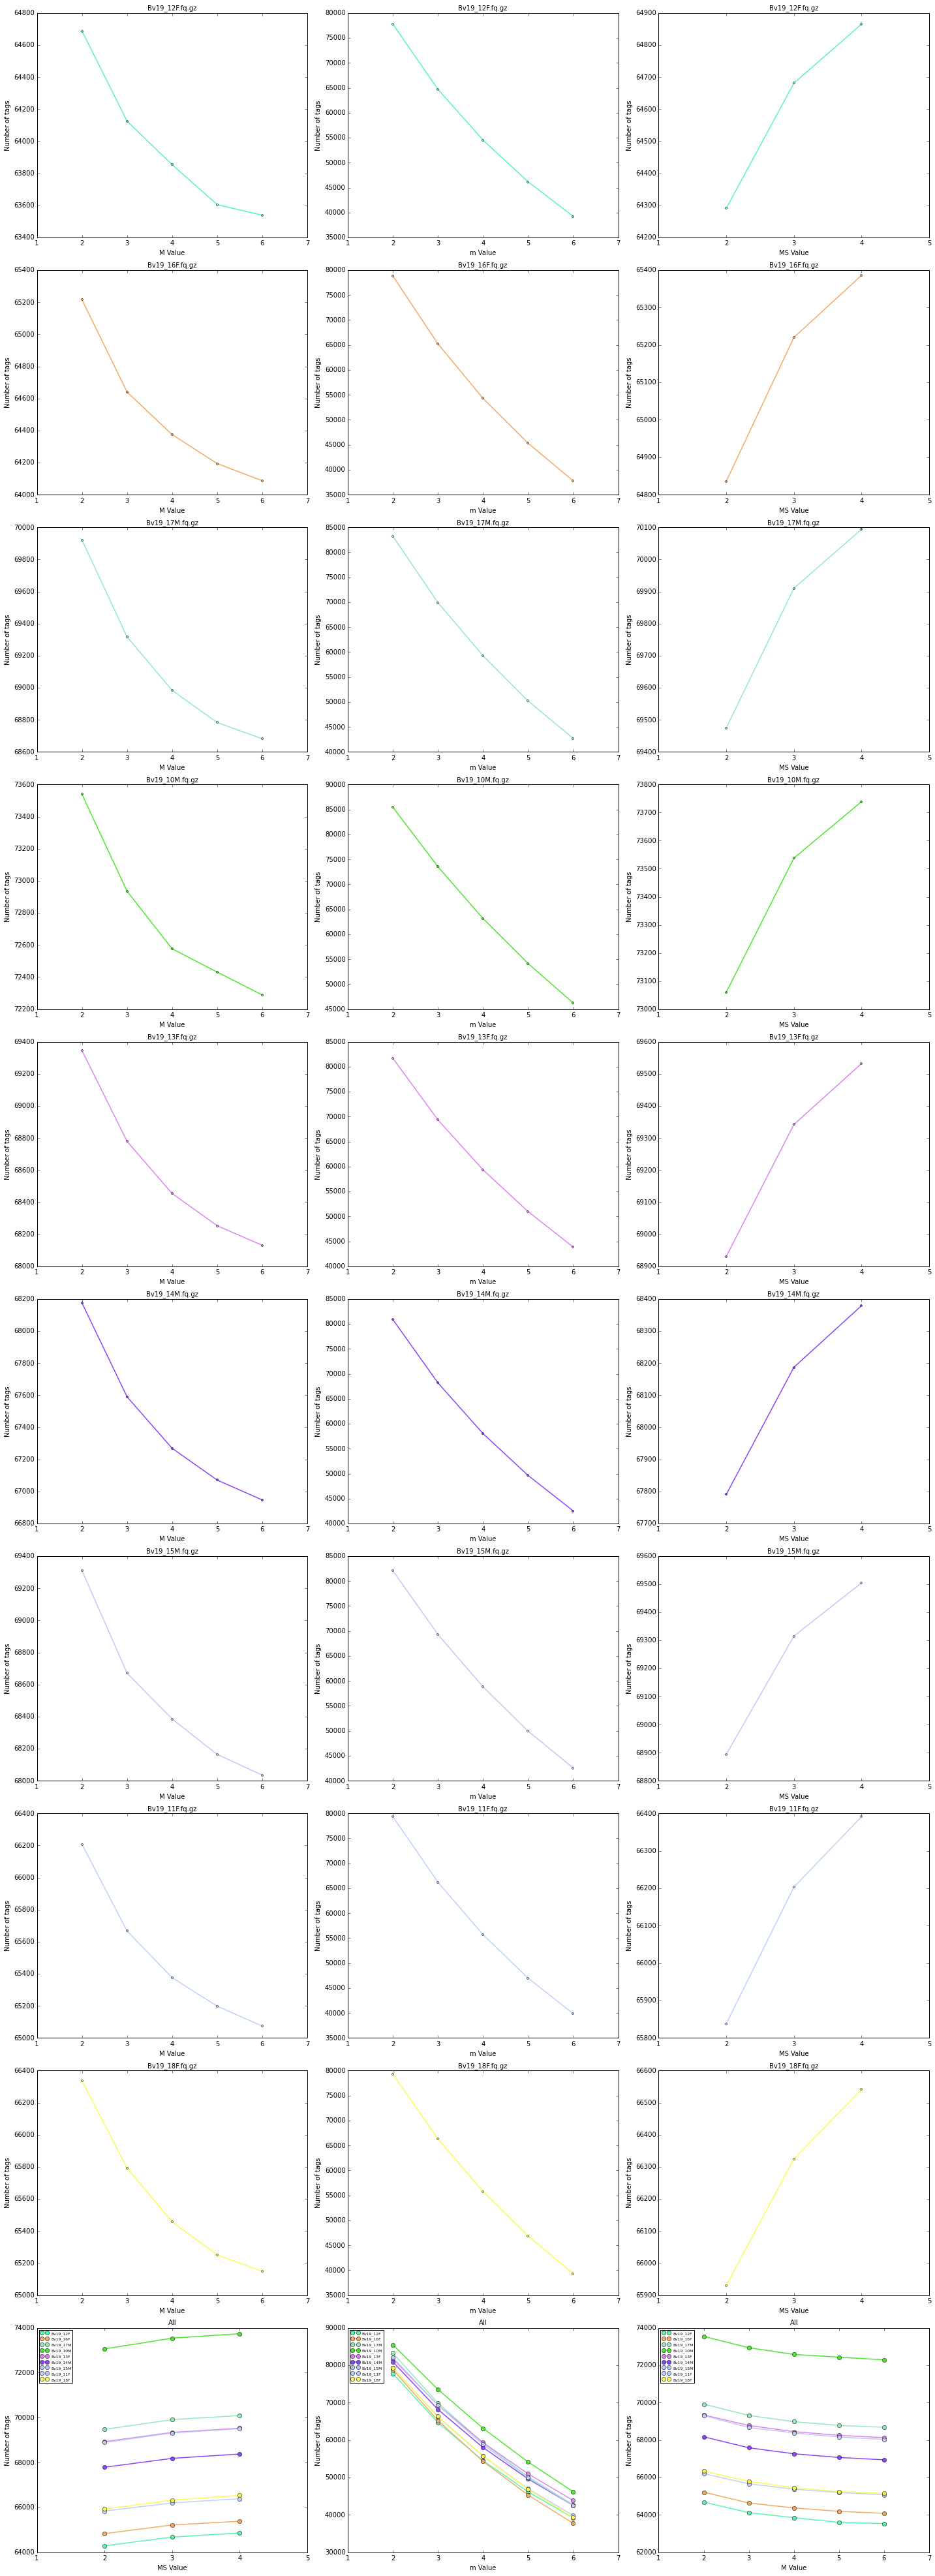

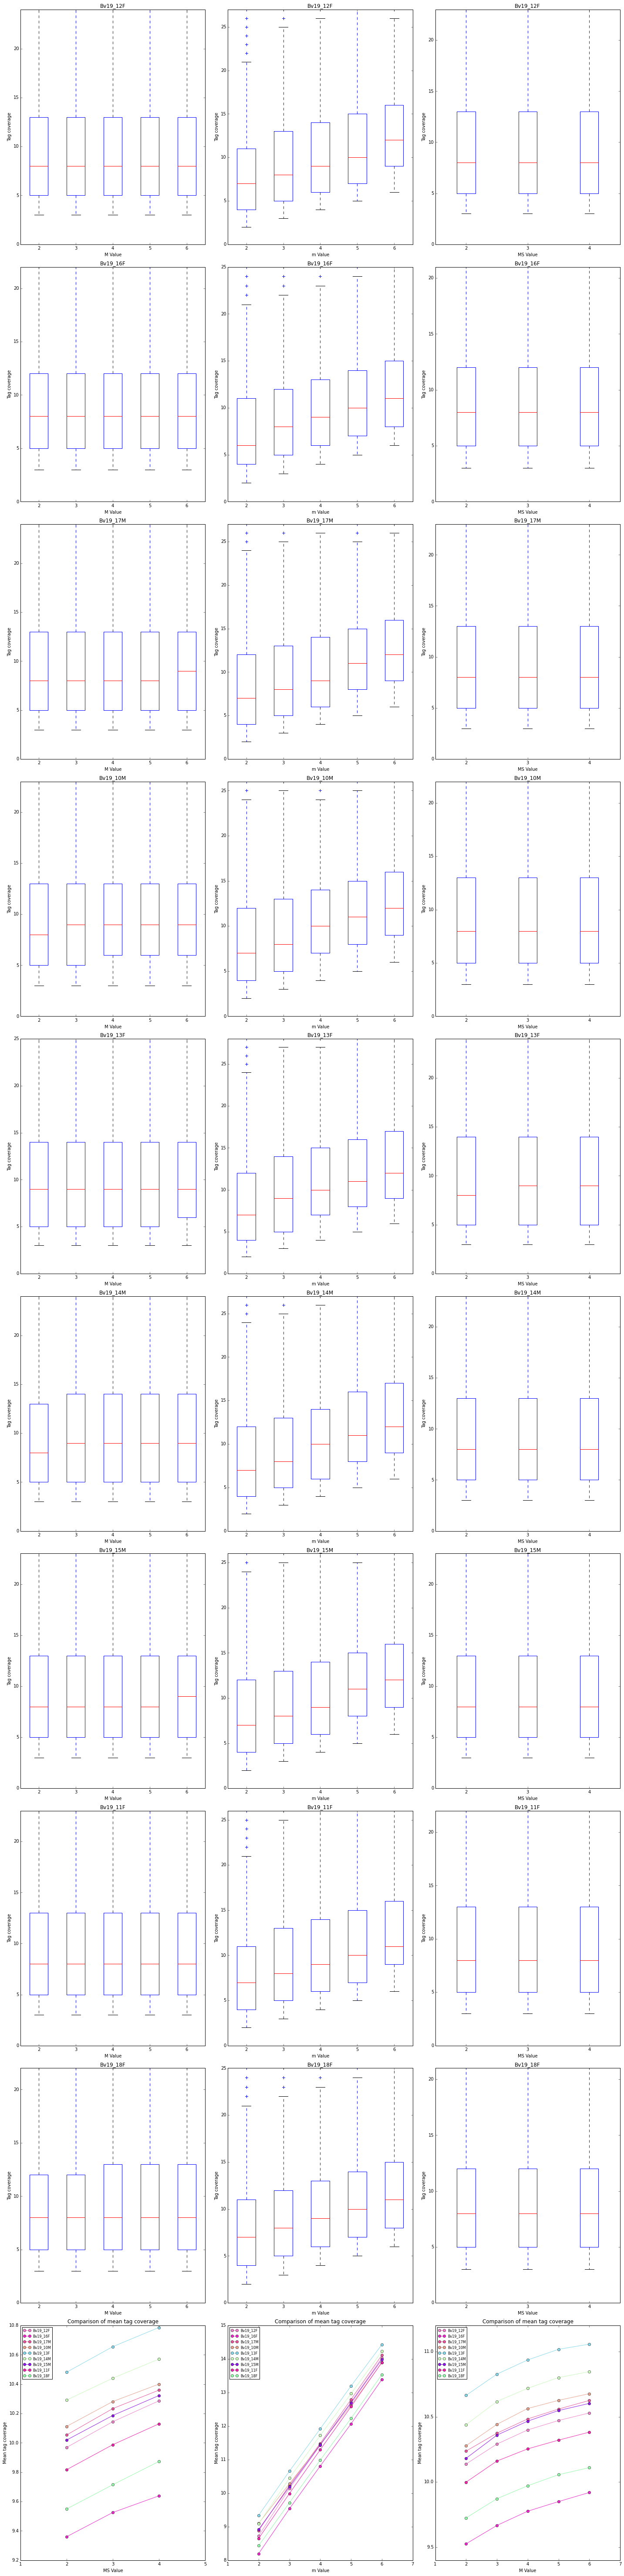

In [7]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

<b>Final Ustacks commands</b> -------------------------------------------------------------------------------------------------------------------

ustacks -t gzfastq -f Bv19_10M.fq.gz -i 1 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_11F.fq.gz -i 2 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_12F.fq.gz -i 3 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_13F.fq.gz -i 4 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_14M.fq.gz -i 5 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_15M.fq.gz -i 6 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_16F.fq.gz -i 7 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_17M.fq.gz -i 8 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_18F.fq.gz -i 9 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_2M.fq.gz -i 10 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_3M.fq.gz -i 11 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_4F.fq.gz -i 12 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_5F.fq.gz -i 13 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_6M.fq.gz -i 14 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_7F.fq.gz -i 15 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_8F.fq.gz -i 16 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f Bv19_9F.fq.gz -i 17 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR13_11female.fq.gz -i 18 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR13_12male.fq.gz -i 19 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93_F_1.fq.gz -i 20 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93_F_2.fq.gz -i 21 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93_F.fq.gz -i 22 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93x94_21F.fq.gz -i 23 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93x94_23F.fq.gz -i 24 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93x94_24M.fq.gz -i 25 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93x94_30M.fq.gz -i 26 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93x94_31F.fq.gz -i 27 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR93x94_32M.fq.gz -i 28 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR94_M_1.fq.gz -i 29 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR94_M_2.fq.gz -i 30 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR94_M.fq.gz -i 31 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95F_1.fq.gz -i 32 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95F_2.fq.gz -i 33 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95F.fq.gz -i 34 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_21M.fq.gz -i 35 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_22F.fq.gz -i 36 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_23M.fq.gz -i 37 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_24F.fq.gz -i 38 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_25F.fq.gz -i 39 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_26M.fq.gz -i 40 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_27F.fq.gz -i 41 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_28M.fq.gz -i 42 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_29F.fq.gz -i 43 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR95x96_30F.fq.gz -i 44 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR96M_1.fq.gz -i 45 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR96M_2.fq.gz -i 46 -m 3 -M 2 -r -d;  
ustacks -t gzfastq -f GR96M.fq.gz -i 47 -m 3 -M 2 -r -d


###2. Cstacks tests -------------------------------------------------------------------------------------------------------------------

In [10]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

## Get IDs for the test samples

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

Bv19_10M, ID = 4
Bv19_11F, ID = 8
Bv19_12F, ID = 1
Bv19_13F, ID = 5
Bv19_14M, ID = 6
Bv19_15M, ID = 7
Bv19_16F, ID = 2
Bv19_17M, ID = 3
Bv19_18F, ID = 9


In [11]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks"
Parameter_dict["sample_ids"] = [2,7,4]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [2, 7, 4],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_16F -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_15M -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_10M 7 -o /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_16F -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_15M -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_10M 7 -o /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_16F -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/Bv19_15M -s /home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Cstacks/B

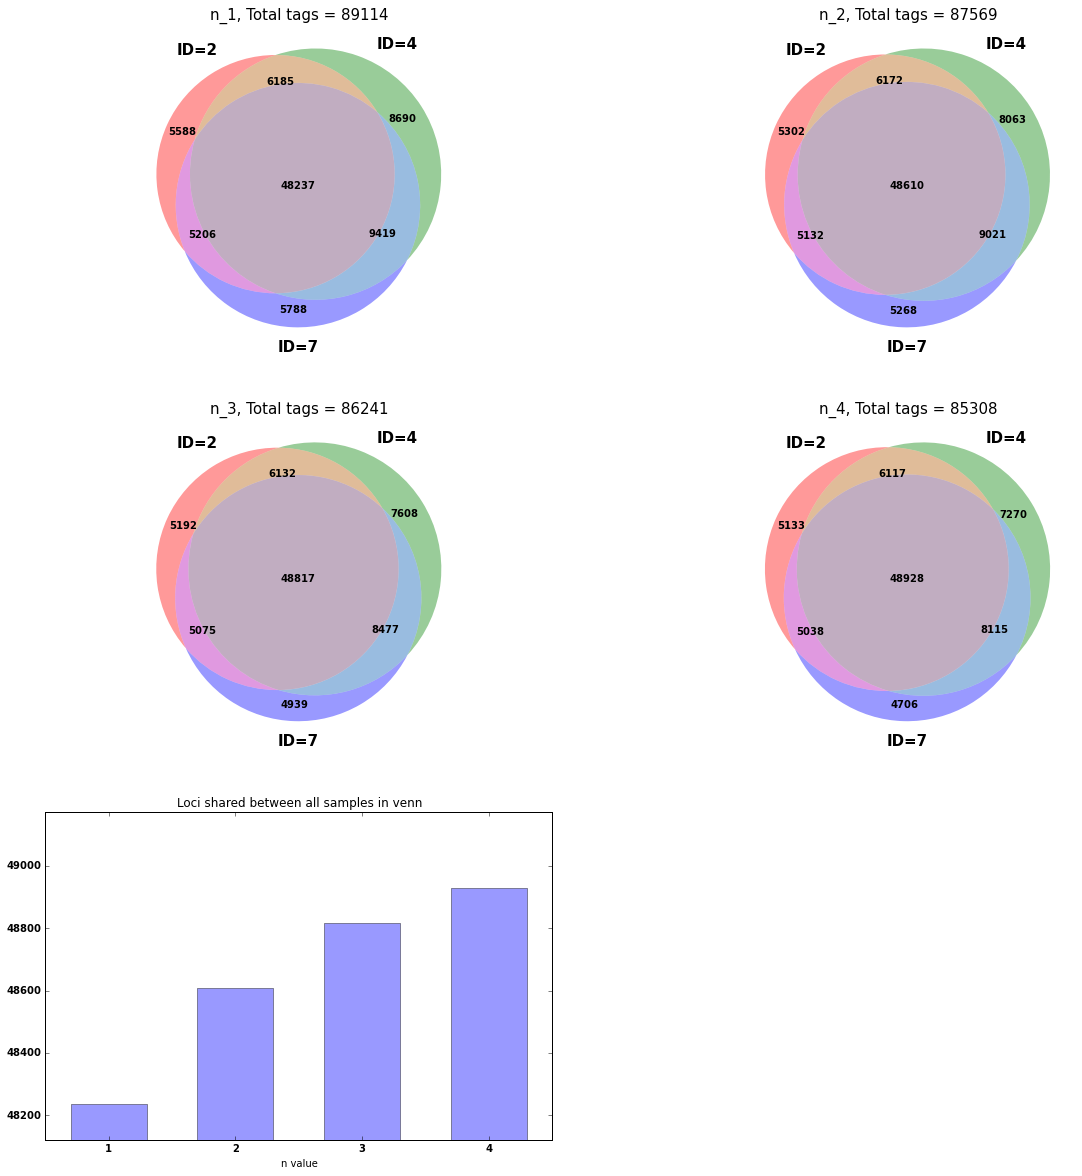

In [12]:
IncC.Incremental_C(Parameter_dict)  

### These look great. Very good sharing between samples. 
Not much improvement in using high -n mismatch value in Cstacks here so, to be concervative I will stick with -n = 2 for final catalog.

<b>Final Cstacks command</b> ----------------------------------------------------------------------------------------------------------------------------

cstacks -b 1 -n2 -p 12  -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_10M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_11F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_12F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_13F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_14M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_15M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_16F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_17M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_18F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_2M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_3M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_4F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_5F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_6M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_7F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_8F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/Bv19_9F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR13_11female -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR13_12male -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93_F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93_F_1 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93_F_2 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93x94_21F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93x94_23F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93x94_24M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93x94_30M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93x94_31F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR93x94_32M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR94_M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR94_M_1 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR94_M_2 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95F_1 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95F_2 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_21M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_22F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_23M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_24F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_25F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_26M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_27F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_28M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_29F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR95x96_30F -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR96M -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR96M_1 -s /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/GR96M_2 -o /scratch/beegfs/monthly/djeffrie/Stoeck/Bviridis/ > Cstacks.log 2>&1


<b> Final Sstacks commands </b> -------------------------------------------------------------------------------------------------------------------------  

sstacks -b1 -c batch_1 -s Bv19_10M -p 7  
sstacks -b1 -c batch_1 -s Bv19_11F -p 7  
sstacks -b1 -c batch_1 -s Bv19_12F -p 7  
sstacks -b1 -c batch_1 -s Bv19_13F -p 7  
sstacks -b1 -c batch_1 -s Bv19_14M -p 7  
sstacks -b1 -c batch_1 -s Bv19_15M -p 7  
sstacks -b1 -c batch_1 -s Bv19_16F -p 7  
sstacks -b1 -c batch_1 -s Bv19_17M -p 7  
sstacks -b1 -c batch_1 -s Bv19_18F -p 7  
sstacks -b1 -c batch_1 -s Bv19_2M -p 7  
sstacks -b1 -c batch_1 -s Bv19_3M -p 7  
sstacks -b1 -c batch_1 -s Bv19_4F -p 7  
sstacks -b1 -c batch_1 -s Bv19_5F -p 7  
sstacks -b1 -c batch_1 -s Bv19_6M -p 7  
sstacks -b1 -c batch_1 -s Bv19_7F -p 7  
sstacks -b1 -c batch_1 -s Bv19_8F -p 7  
sstacks -b1 -c batch_1 -s Bv19_9F -p 7  
sstacks -b1 -c batch_1 -s GR13_11female -p 7  
sstacks -b1 -c batch_1 -s GR13_12male -p 7  
sstacks -b1 -c batch_1 -s GR93_F_1 -p 7  
sstacks -b1 -c batch_1 -s GR93_F_2 -p 7  
sstacks -b1 -c batch_1 -s GR93_F -p 7  
sstacks -b1 -c batch_1 -s GR93x94_21F -p 7  
sstacks -b1 -c batch_1 -s GR93x94_23F -p 7  
sstacks -b1 -c batch_1 -s GR93x94_24M -p 7  
sstacks -b1 -c batch_1 -s GR93x94_30M -p 7  
sstacks -b1 -c batch_1 -s GR93x94_31F -p 7  
sstacks -b1 -c batch_1 -s GR93x94_32M -p 7  
sstacks -b1 -c batch_1 -s GR94_M_1 -p 7  
sstacks -b1 -c batch_1 -s GR94_M_2 -p 7  
sstacks -b1 -c batch_1 -s GR94_M -p 7  
sstacks -b1 -c batch_1 -s GR95F_1 -p 7  
sstacks -b1 -c batch_1 -s GR95F_2 -p 7  
sstacks -b1 -c batch_1 -s GR95F -p 7  
sstacks -b1 -c batch_1 -s GR95x96_21M -p 7  
sstacks -b1 -c batch_1 -s GR95x96_22F -p 7  
sstacks -b1 -c batch_1 -s GR95x96_23M -p 7  
sstacks -b1 -c batch_1 -s GR95x96_24F -p 7  
sstacks -b1 -c batch_1 -s GR95x96_25F -p 7  
sstacks -b1 -c batch_1 -s GR95x96_26M -p 7  
sstacks -b1 -c batch_1 -s GR95x96_27F -p 7  
sstacks -b1 -c batch_1 -s GR95x96_28M -p 7  
sstacks -b1 -c batch_1 -s GR95x96_29F -p 7  
sstacks -b1 -c batch_1 -s GR95x96_30F -p 7  
sstacks -b1 -c batch_1 -s GR96M_1 -p 7  
sstacks -b1 -c batch_1 -s GR96M_2 -p 7  
sstacks -b1 -c batch_1 -s GR96M -p 7  

### Family specific analyses  -----------------------------------------------------------------------------------------------------------------

Here I am splitting the families up and analysing them separately

### Family Bv


First, I am using relaxed sample filtering criteria (i.e. the constraints on number of samples a locus must be present in are loose). This will allow me to look at which samples are responsible for a lot of locus dropout. If some samples are particularly bad they can be removed and the dataset will likely be better off.

<b> relaxed populations command </b>

populations -b1 -M popmap.txt -P ./ -r 0.5 -p 2 --vcf -t 12 > Populations_relaxed.log 2>&1 & 

Running populations like this means that a locus has to be present in at least half the samples in at least 2 populations. We will have to be more strict with the final dataset. 

#### Now quickly looking at the amount of loci droping out in each sample, to check for bad samples.

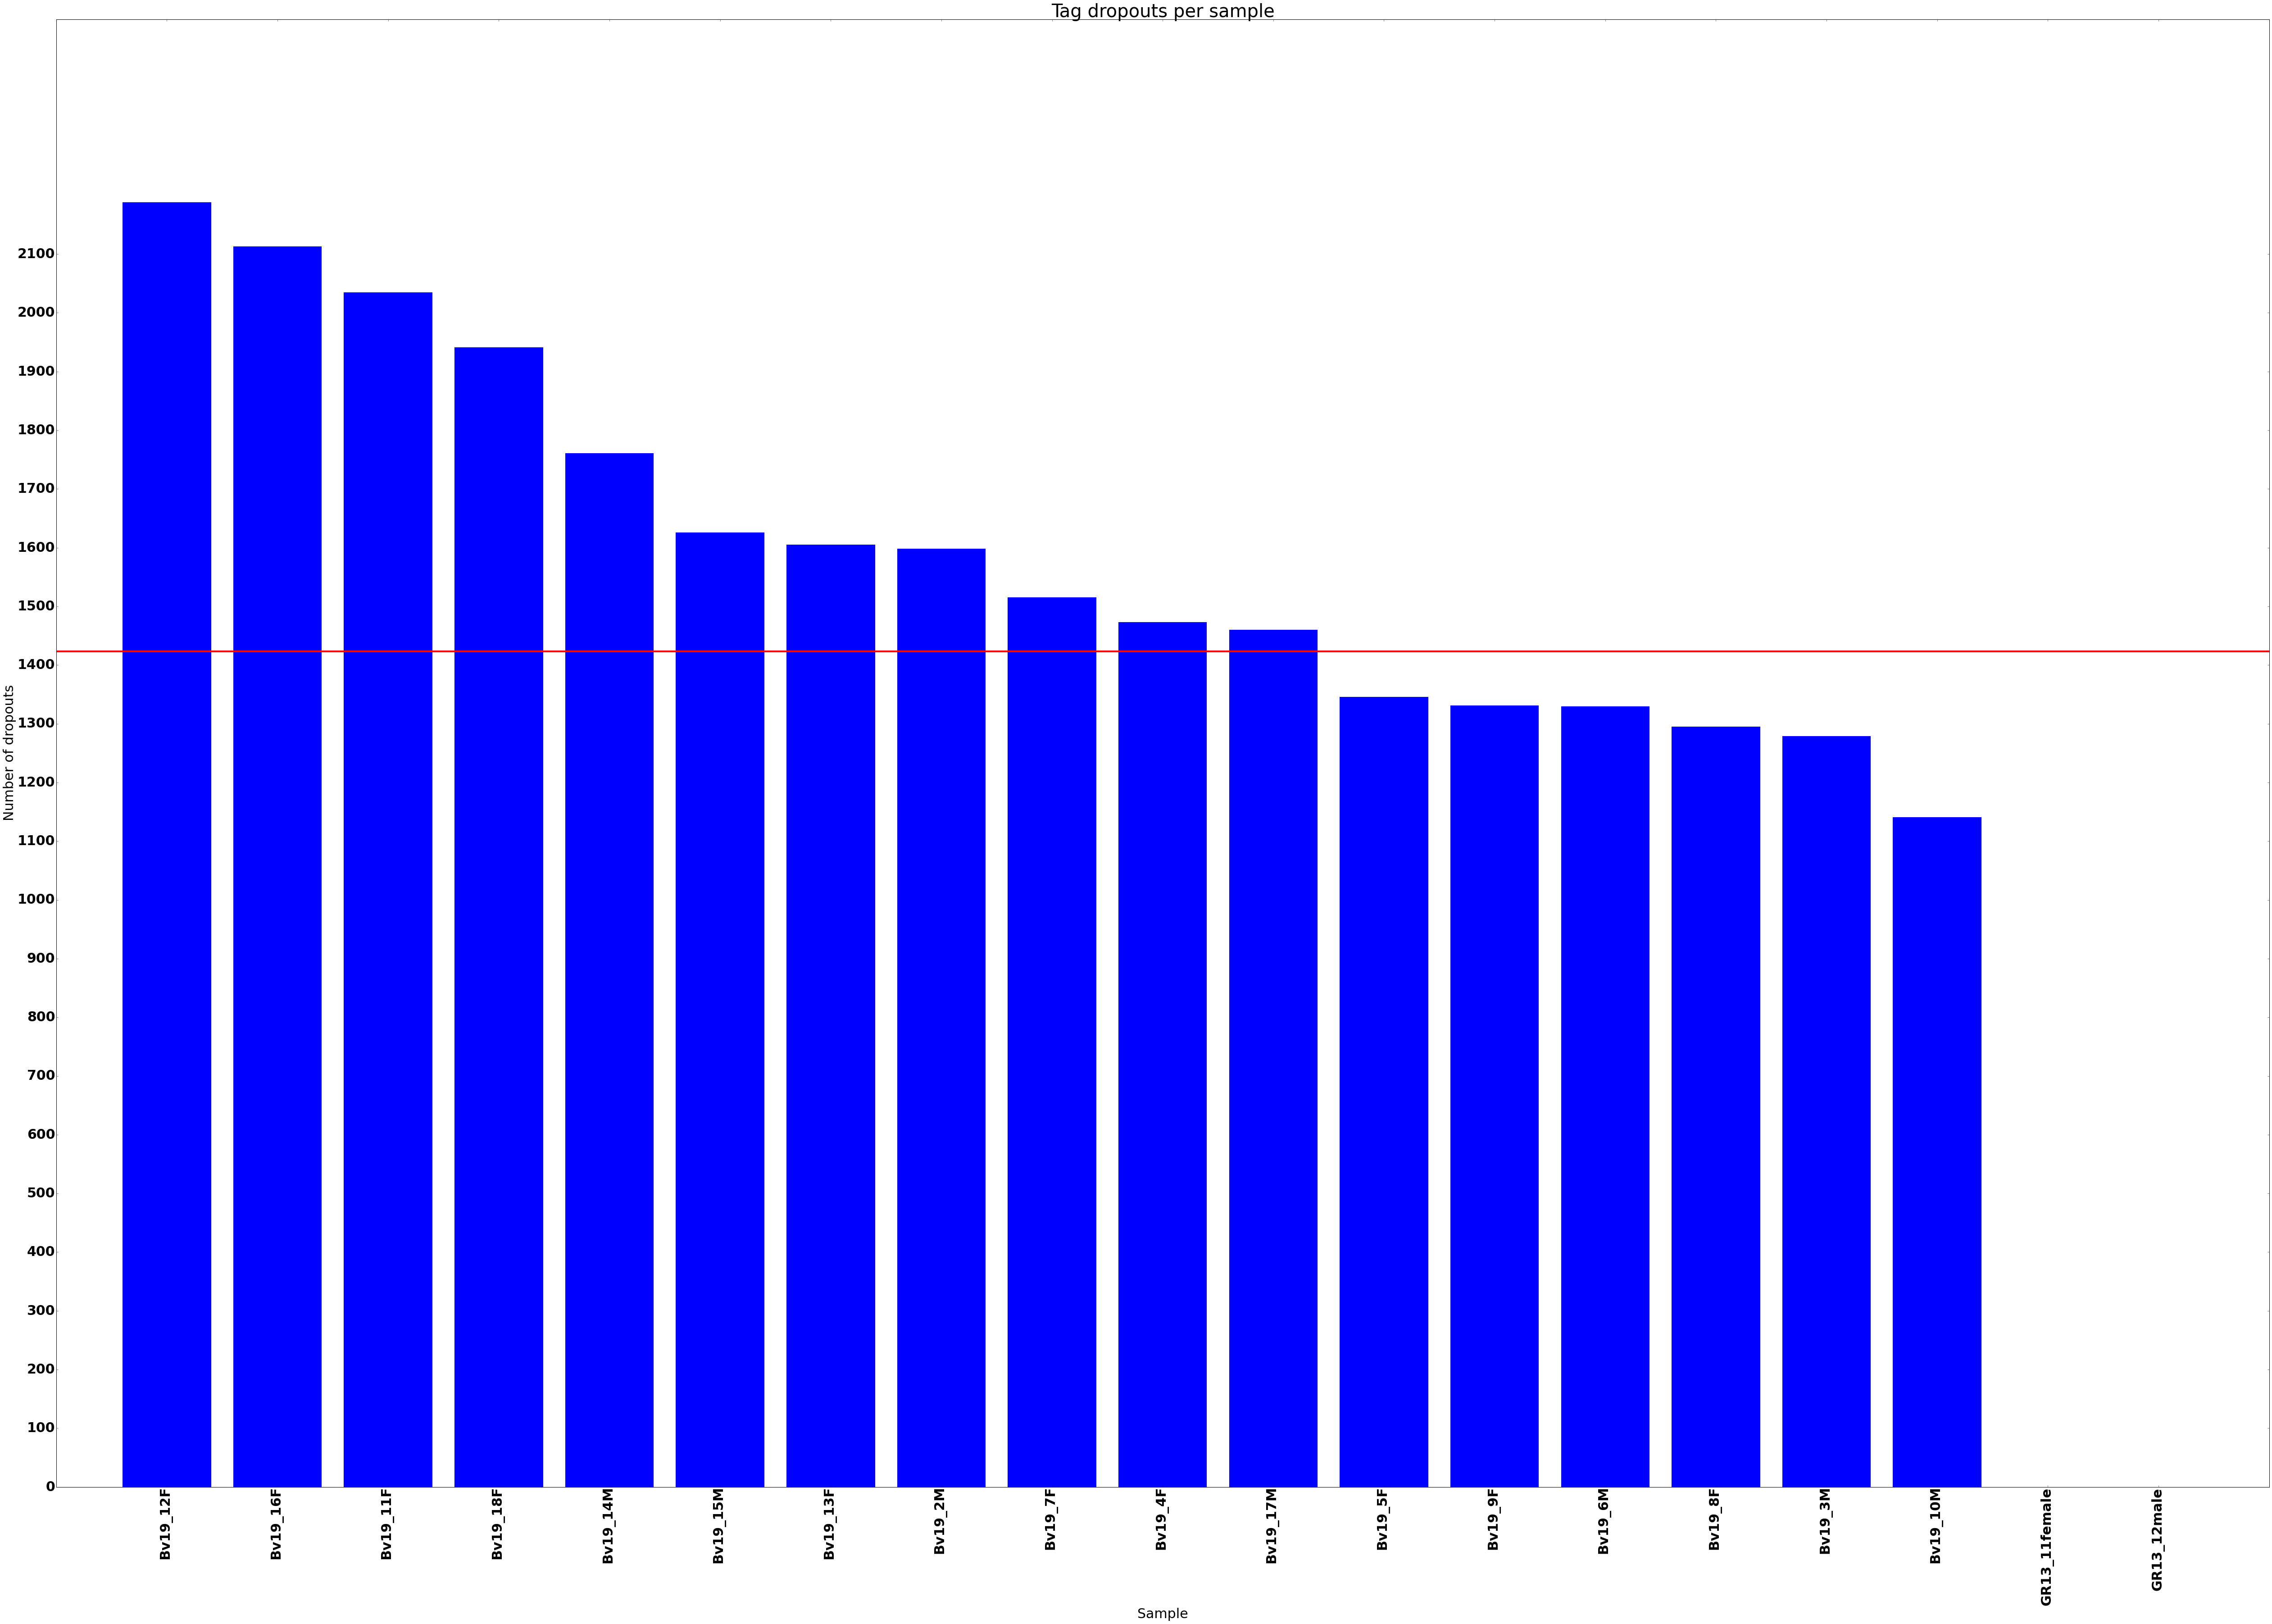

Outputs written to:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Populations//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Populations//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Populations//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Populations//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Populations//blacklist.txt


In [61]:
wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Incremental/Populations/"

blacklist = MISC.missing_data_finder("%s/batch_1_relaxed.vcf" % wd, wd)

<b> Final (strict) populations command </b>

populations -b1 -P ./ -r 0.75 -p 4 --min_maf 0.05 --vcf --vcf_haplotypes -t 12 > Populations_Bv.log 2>&1 &

The popmap file looks like this:

Bv19_10M        MO  
Bv19_11F        FO  
Bv19_12F        FO  
Bv19_13F        FO  
Bv19_14M        MO  
Bv19_15M        MO  
Bv19_16F        FO  
Bv19_17M        MO  
Bv19_18F        FO  
Bv19_2M         MO  
Bv19_3M         MO  
Bv19_4F         FO  
Bv19_5F         FO  
Bv19_6M         MO  
Bv19_7F         FO  
Bv19_8F         FO  
Bv19_9F         FO  
GR13_11female   F  
GR13_12male     M  

<b>MO = Male offspring  </b>  
<b>FO = Female offspring  </b>  
<b>M = Male parent  </b>  
<b>F = Female parent  </b>  

Running like this means that all loci left in the dataset must be present in both parents, as well as 75% of female offspring and 75% of male offspring

#### Checking the state of the locus dropout in the final SNP dataset

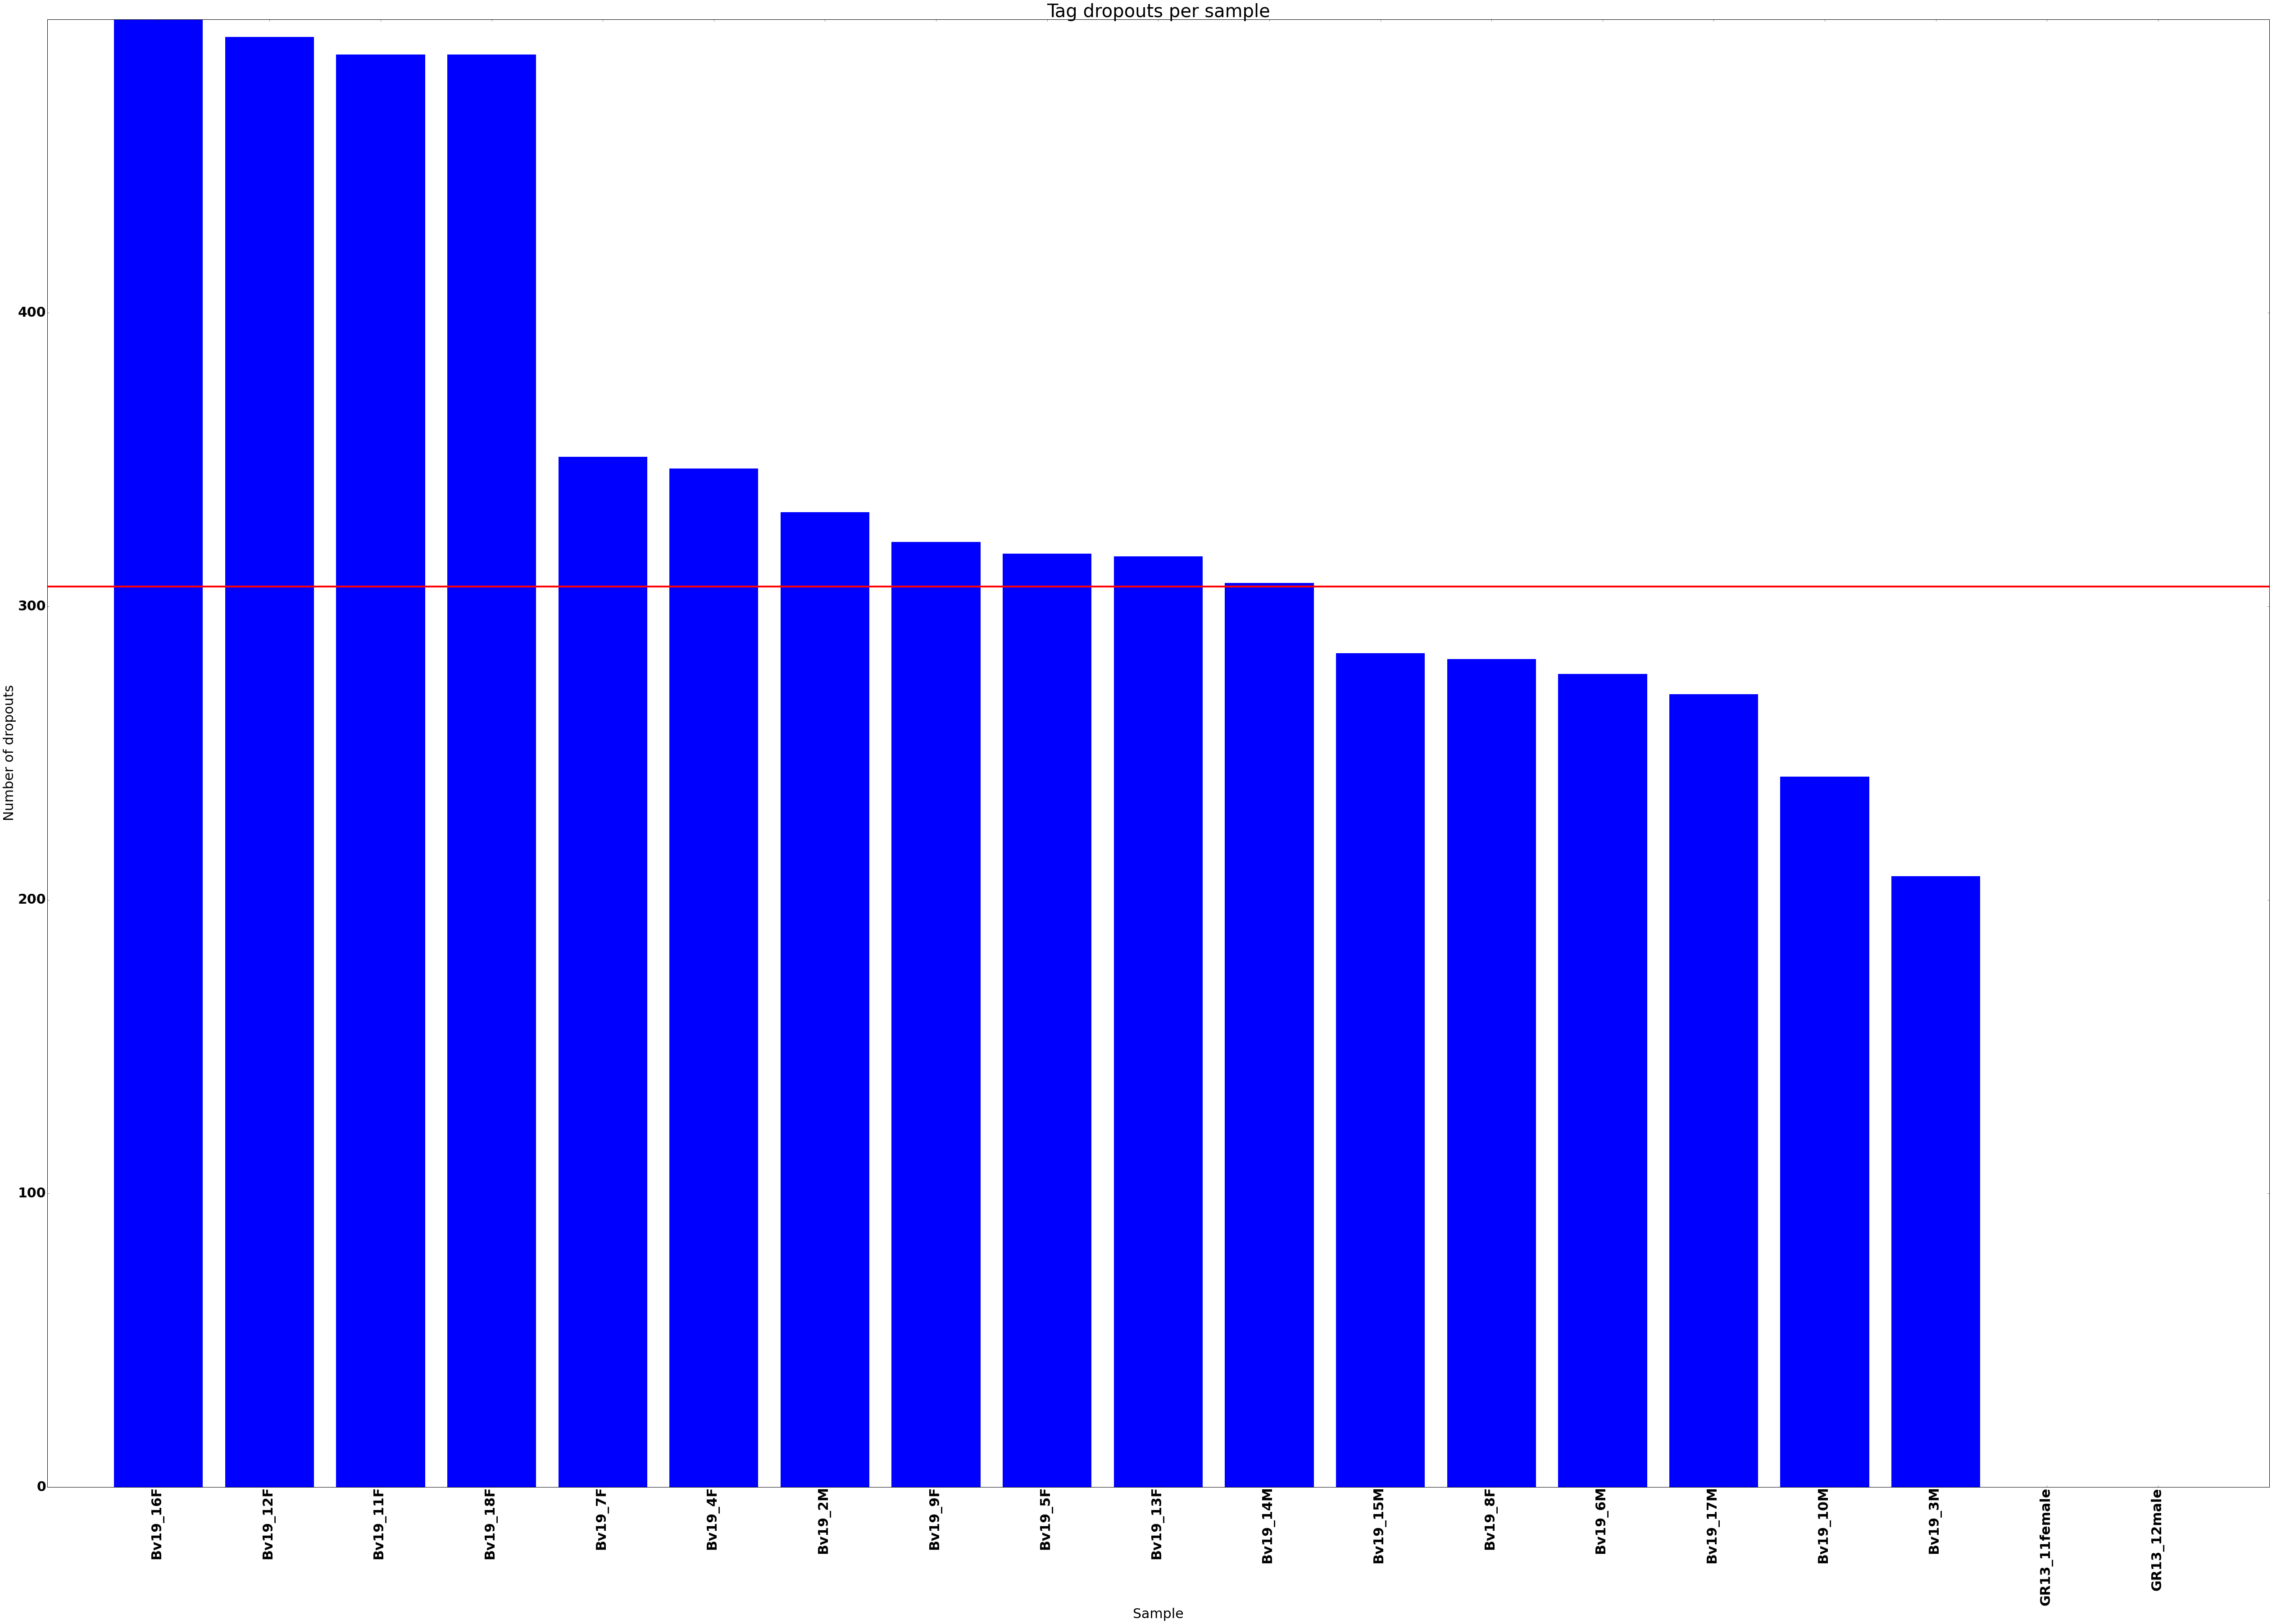

Outputs written to:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//blacklist.txt


In [62]:
wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/"

blacklist = MISC.missing_data_finder("%s/batch_1_strict.vcf" % wd, wd)

####Check the final snp dataset coverage

Number of tags =  5927
Average tag coverage 16.9576780656 (+- 10.8479794007 )


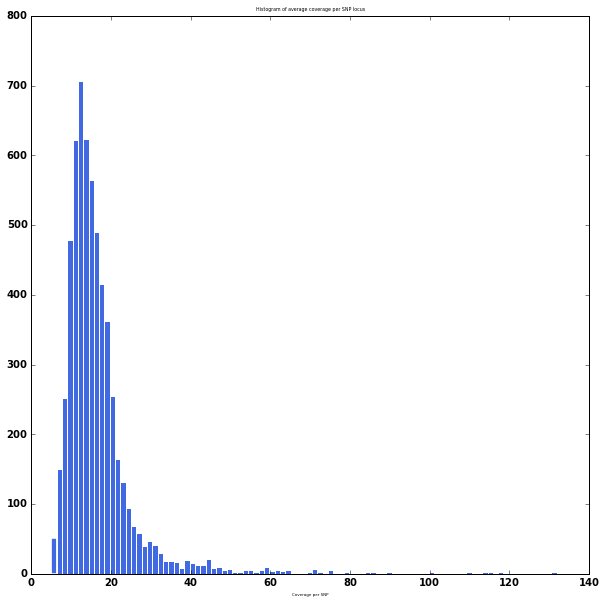

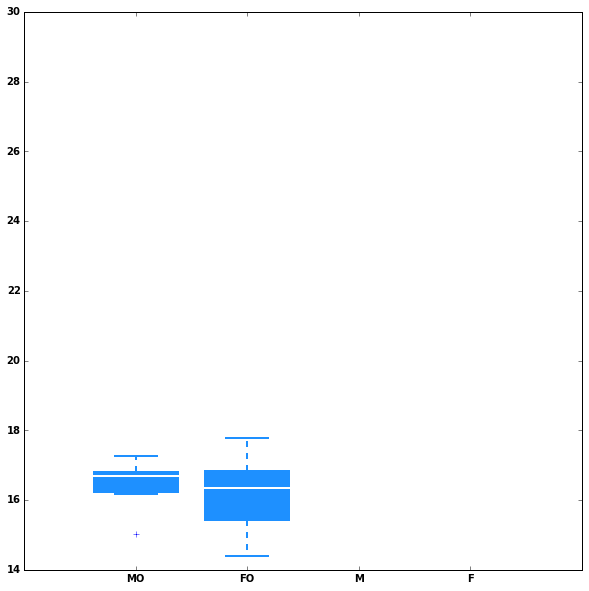

In [63]:
final_vcf = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/batch_1_strict.vcf"
final_popmap = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/popmap.txt"
tag_means, pop_cov_data = MISC.Super_av_tag_cov(final_vcf, popmap = final_popmap)

## Un-edited popmap analyses

In [3]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/unedited_pop_map_analyses/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex information:
sexes <- read.delim("popmap.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


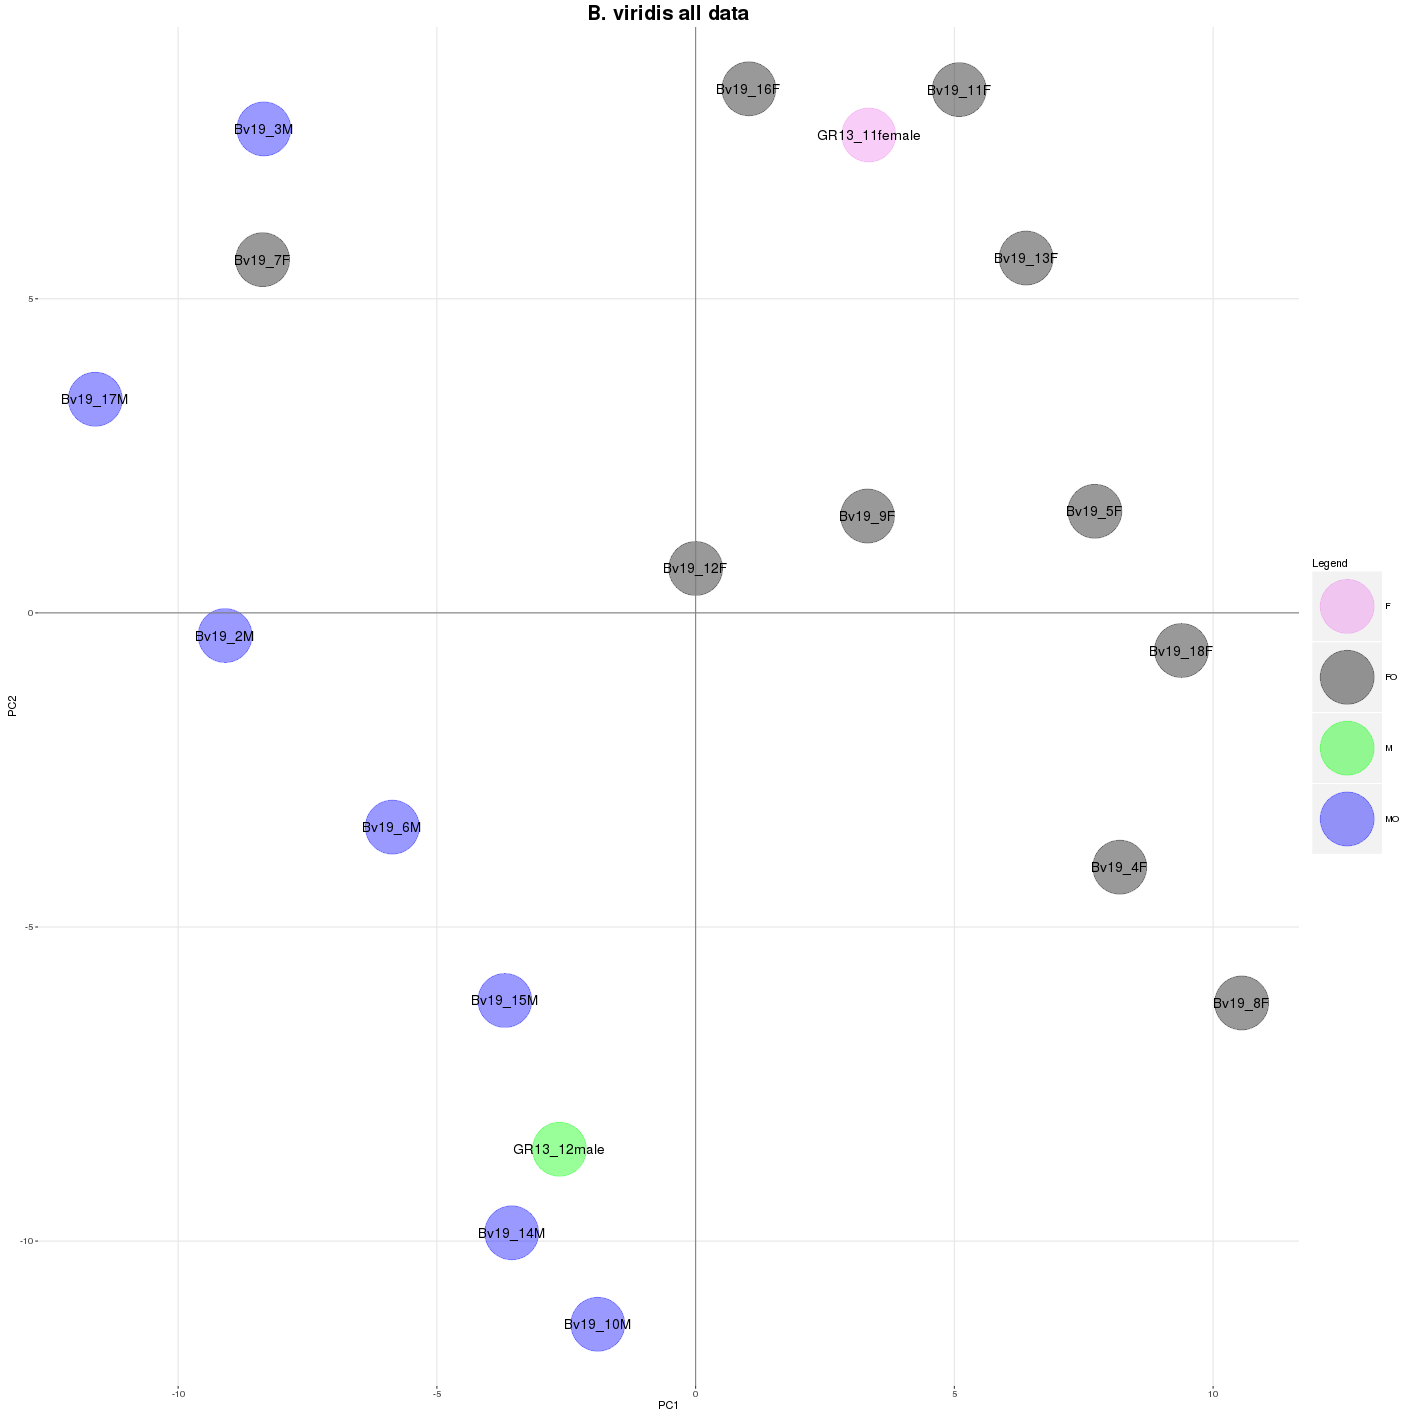

In [4]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis all data", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

## Now lets take a look at the data for Each family in a PCA, to check that all is as expected.

In [1]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf  ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink  ## convert to plink format



PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SN

In [6]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex information:
sexes <- read.delim("pop_map_edited.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


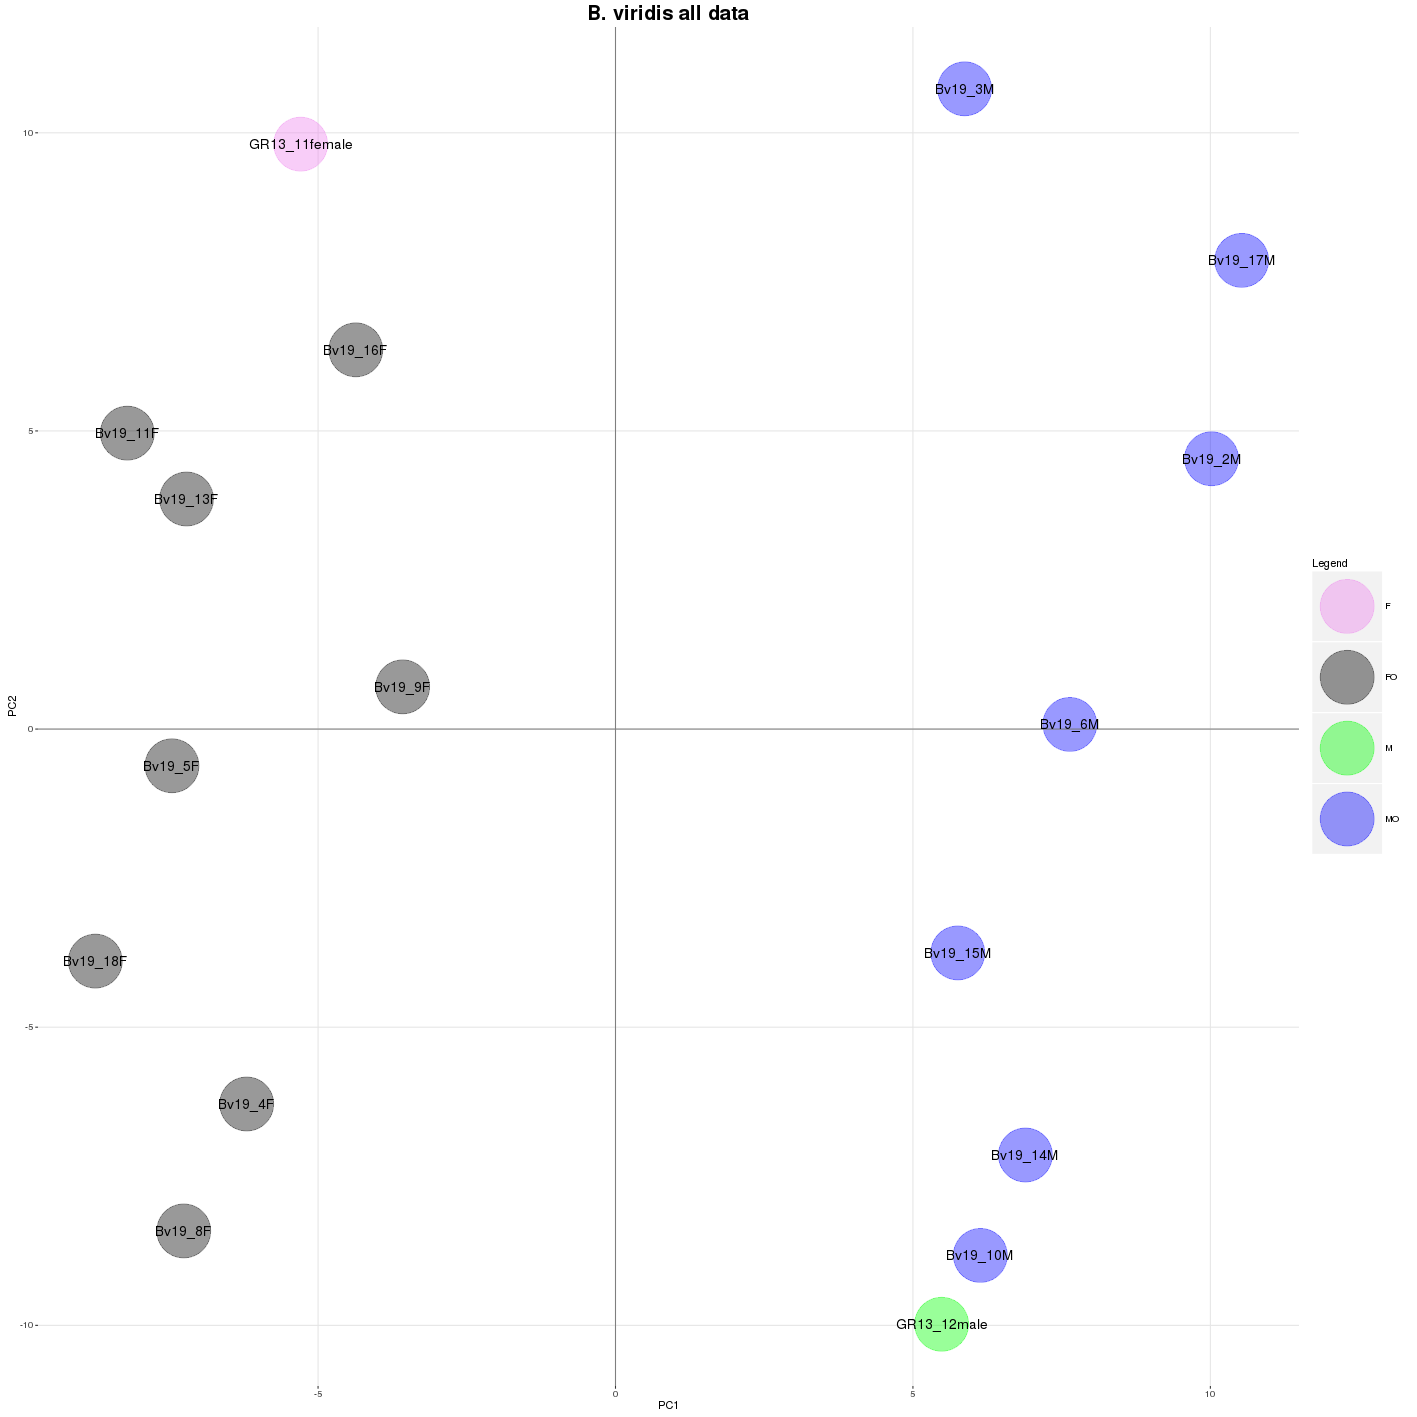

In [7]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis all data", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So looks good - the data is already separating males and females. Should also pick this up in a heatmap

In [9]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_adegenet_plink.raw  $wd/batch_1_heatmap_input

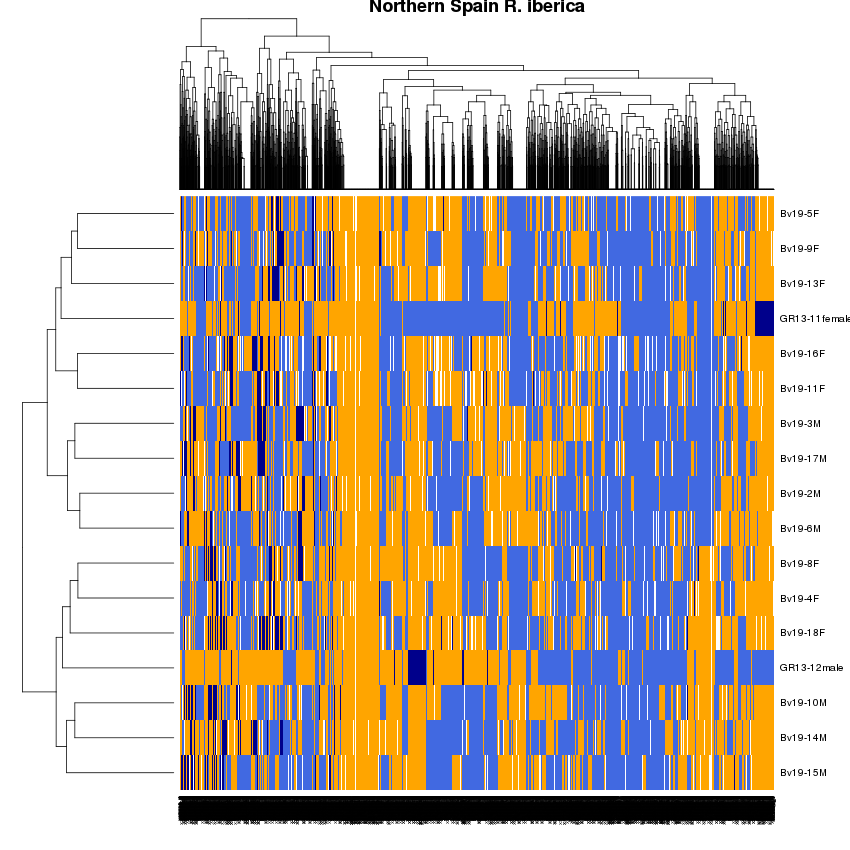

In [10]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


Unfortunately it doesn't come through in the heatmap.

## Now, we search for the sex linked markers. 

See the help message of the script below for some details on how this function works

In [2]:
help(MISC.SL_markers_from_sexed_fam)

Help on function SL_markers_from_sexed_fam in module MISC_RAD_tools:

SL_markers_from_sexed_fam(vcf_path, sex_info_file, catalog_path, offspring_presence_threshold, mendelian_threshold, het_sex_thresh, hom_sex_thresh)
    Usage: SL_markers_from_sexed_fam  <vcf_path>  <sex_info_file>  <catalog_path> <offspring_presence_threshold>  <mendelian_threshold> <het_sex_thresh> <hom_sex_thresh>
    
    This script will identify sex linked markers using the genotype of parents and sexed offspring. Specifically, it will identify alleles specific to one of the parents
    and then track these loci through the progeny. The script will filter loci that are not present in enough samples (specified by the user) and also those that have 
    segregation patterns indicative of incorrect genotype calles in either the parents or offspring (See below)
    
    ### Informative locus filters:
    -Loci are used only if the number of offspring present is equal to or above the percentage specified by the user


In [11]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/pop_map_edited.txt"
catalog_file = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_stacks_outs/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 0.9   # 90% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 0.75  # 75% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 0.9  # 90% of the homogametic sex must be homozygous


Bv_XYs, Bv_ZWs = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 2381

N loci suitable for XY testing: 1427
N XY test loci with enough heterozygous males: 241
N loci that fit the specified XY criteria: 149

N loci suitable for ZW testing: 954
N ZW test loci with enough heterozygous females: 923
N loci that fit the specified ZW criteria: 2


So we have 149 markers here which look like they could be sex linked. To take a closer look at these I will now run a PCA analyses to look at structure within the samples both at all loci, and just at the sex linked loci. 

<b> First, subset the VCF for only the putatively sex linked snps </b>

In [14]:
vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1.vcf"
XY_IDs = [i.split("_")[0] for i in Bv_XYs]


MISC.filter_vcf(vcf_path, XY_IDs, "XY_linked_snps.vcf") ## Function to filter a vcf for a subset of markers

Next, get these ready for PCA analyses in R.

In [4]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1_strict.vcf.altered > $wd/batch_1_altered_adegenet.vcf  ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink  ## convert to plink format


## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered.vcf   ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered_plink ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data//batch_1_altered_adegenet_plink-temporary.fam
written.
5927 variants loaded from .bim file.
19 people (0 males, 0 females, 19 ambiguous) loaded from .

Now we will do a little bit of work in R, the line below allows me to use in inside a Jupter notebook (very cool!)

In [10]:
%load_ext rpy2.ipython

So I will use the adegenet package in R to read in the plink formated snp file and run it through a PCA analyses designed specifically for genetic data. I will do this for both full and XY linked datasets for comparison

In [7]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex linked SNPs only (about 150)
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 
## again if on linux, you can set "parallel" to TRUE to use multi cores
## Also, here I have specified nf = 3 to retain 3 PCs. If I don't do this it will plot the eigenvalues and interactively ask you
## how many PCs to retain. This even works in Jupyter! Cos Jupyter and rpy2 are bloody cool! Thats Why!

pca2 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



Finally, I will plot this PCA with a slightly customised plotting function, which allows me to colour the different classes of sample separately

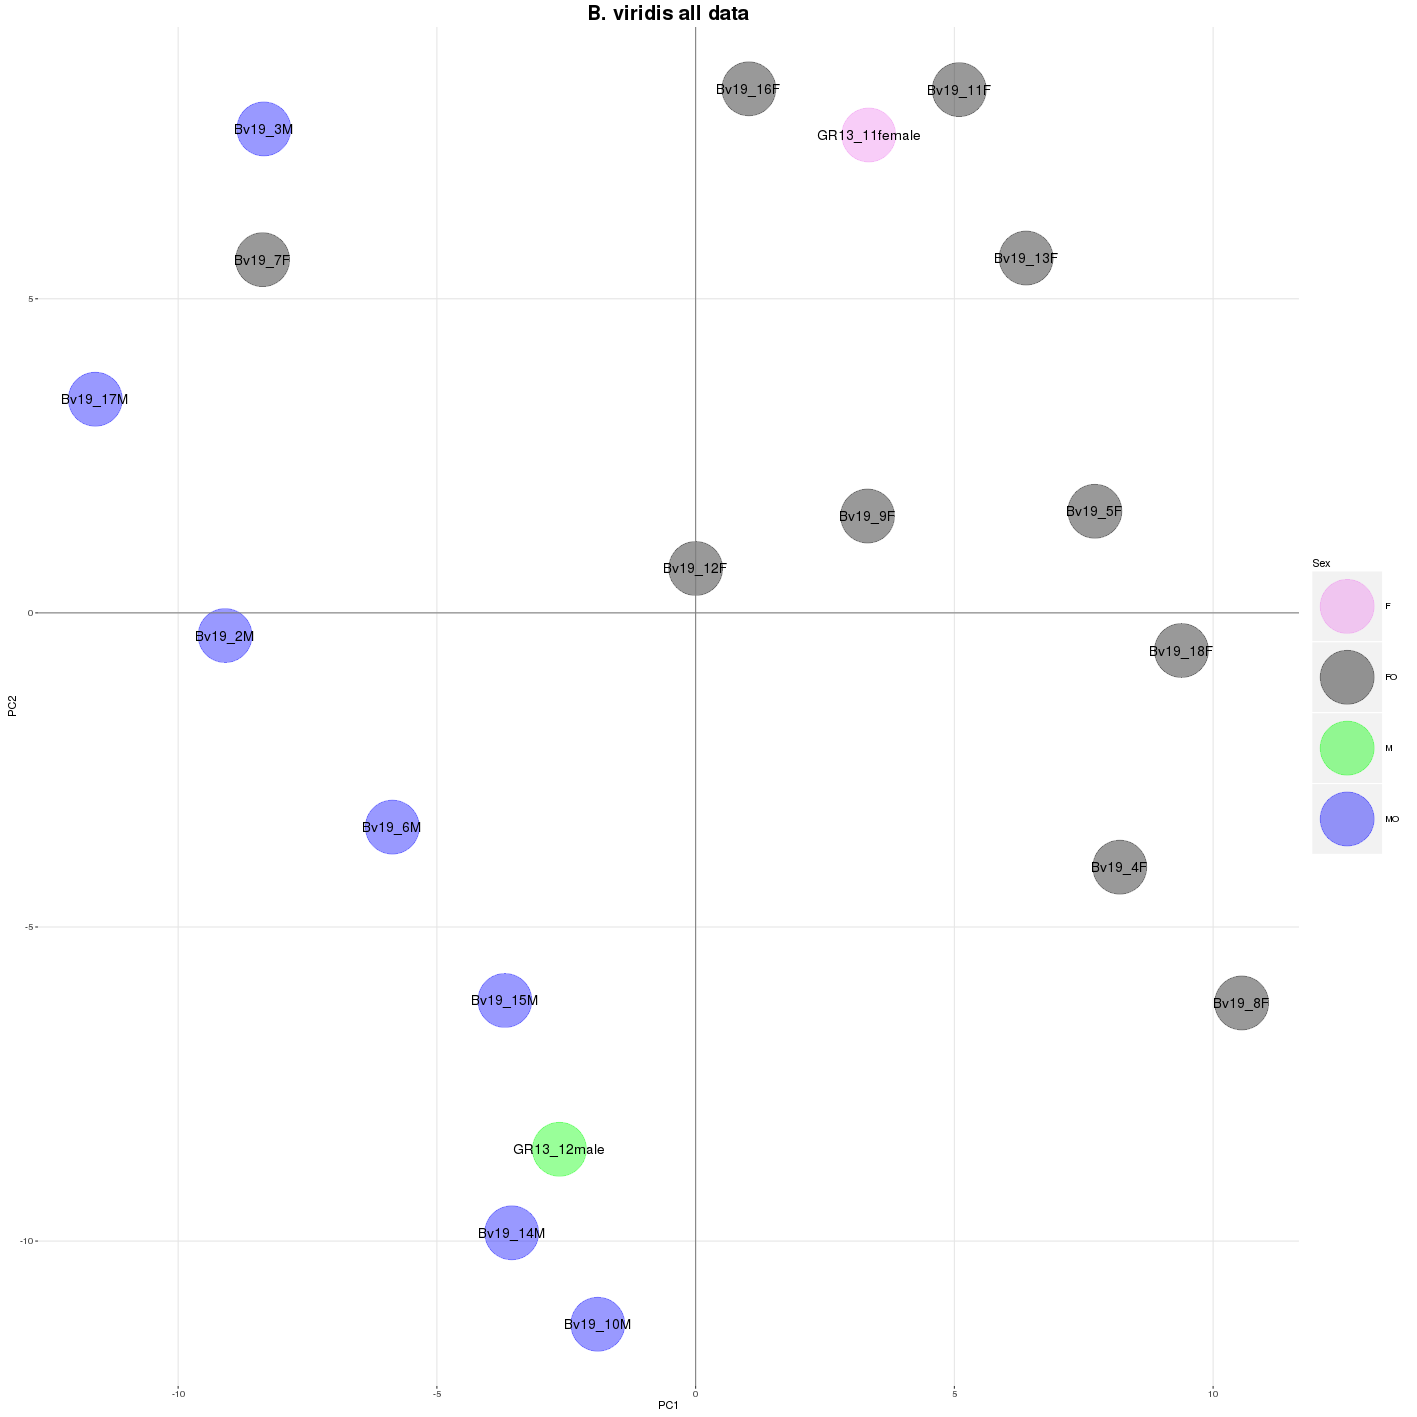

In [15]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis all data", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

There is even a bit of male / female signal here using all of the data. This is reassuring and kind of to be expected - with the low diversity found in a single family, there shouldn't by much consistent signal between them apart from on the Y.

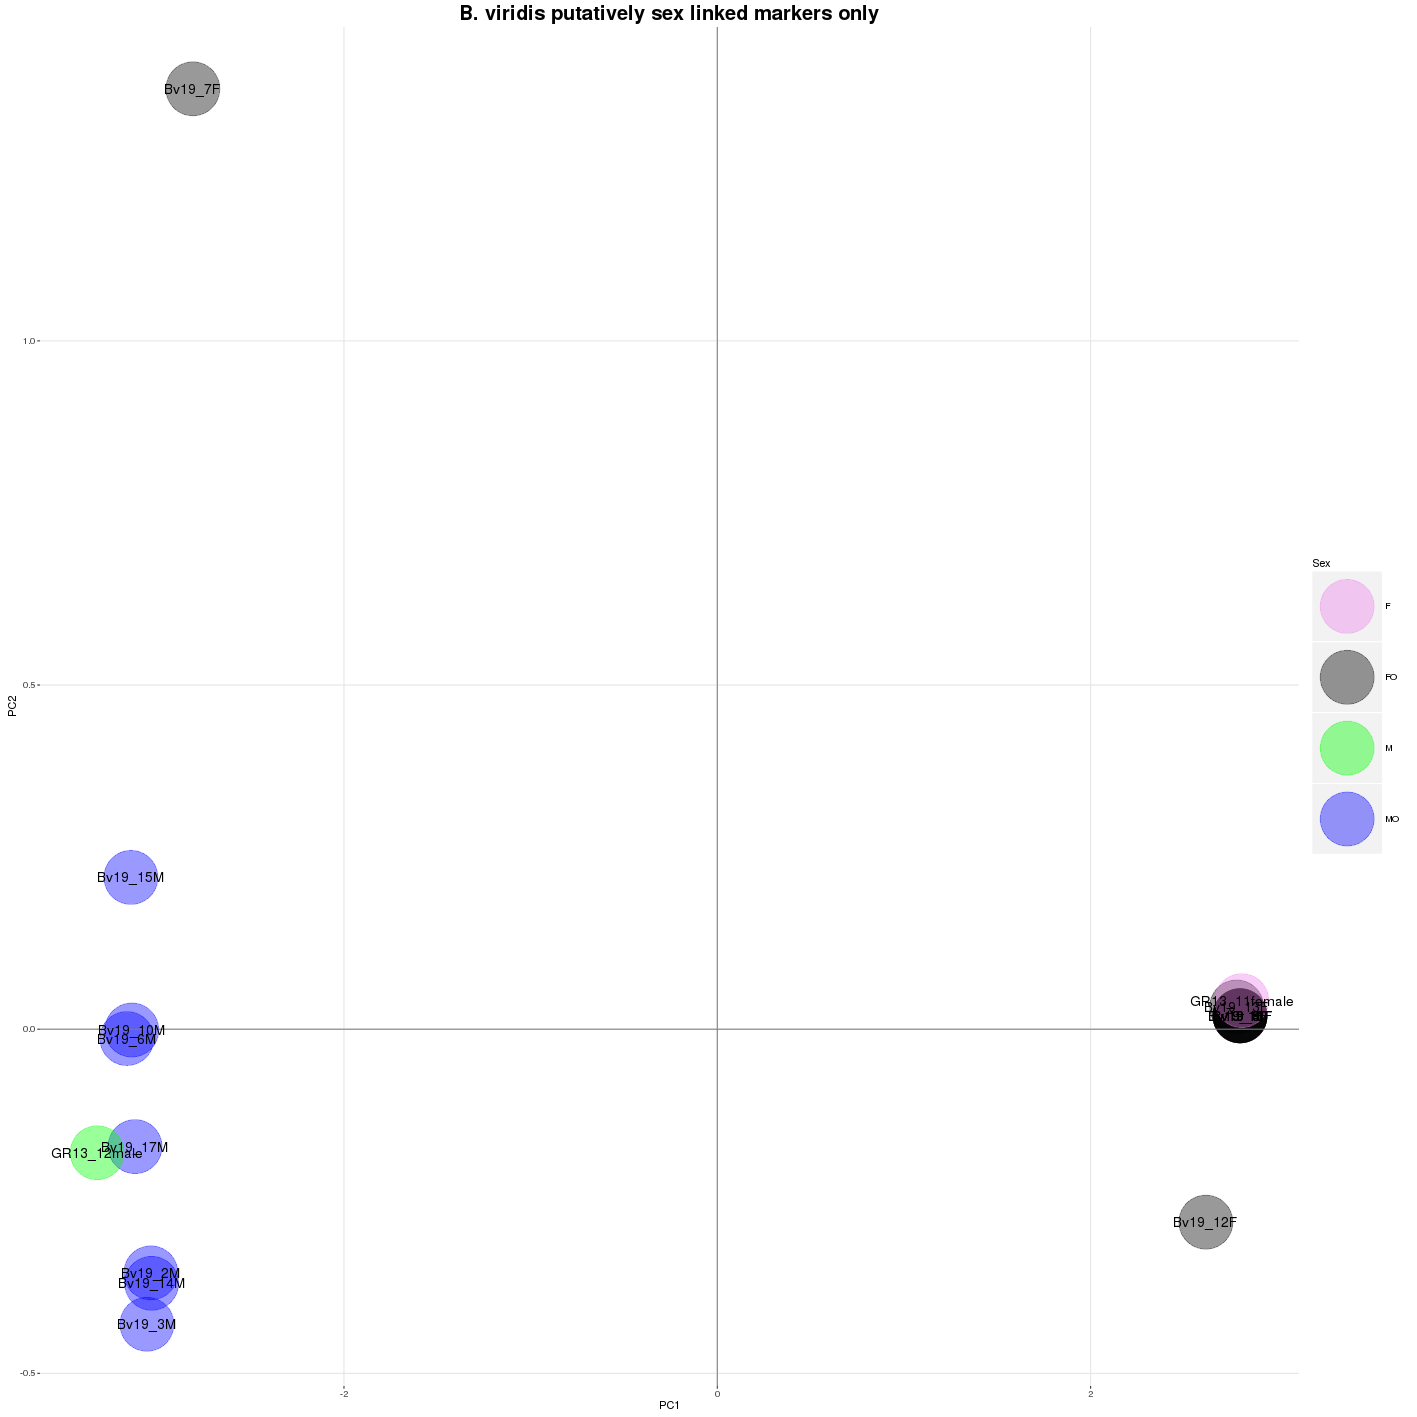

In [14]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis putatively sex linked markers only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So this for the most part there is very clear separation between the males and females here. However, there are some interesting exceptions. 

- Bv19_7F, which has been assigned as a female, clusters with the males on the first PC. This means that, at the loci which are diagnostic between males and females here, this sample has the same genotypes as the males. However, there is some distance between this sample and the males on PC2. What this other axis of variation represents I cannot say. However if I had to guess I would say that perhaps this sample comes from a different family.  

 
- Bv19_12F clusters with the females on PC1, consistent with its assignment. However it is an outlier to the other females on PC2. Again the only thing I can think of that may cause this is that this sample is from a different mother (with a different X haplotype).


So I think it is worth removing these samples for now and repeating the analyses. To do this I re-ran populations, using the exact same code as previously run, but having removed these two samples from the popmap.txt file. 

So no, I will re-run the analyses, from finding the sex linked markers, to plotting them on a PCA.

In [278]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/pop_map_edited.txt"
catalog_file = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/unedited_pop_map_analyses/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 0.9   # 90% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 1  # 75% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 1  # 90% of the homogametic sex must be homozygous


Bv_XYs, Bv_ZWs = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 2381

N loci suitable for XY testing: 1427
N XY test loci with enough heterozygous males: 96
N loci that fit the specified XY criteria: 76

N loci suitable for ZW testing: 954
N ZW test loci with enough heterozygous females: 923
N loci that fit the specified ZW criteria: 0


In [50]:
vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/batch_1.vcf"
XY_IDs = [i.split("_")[0] for i in Bv_XYs]

MISC.filter_vcf(vcf_path, Bv_XYs , "XY_linked_snps.vcf") ## Function to filter a vcf for a subset of markers

In [51]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses  ## just change this line

## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered.vcf   ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered_plink ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/XY_linked_snps_altered_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/XY_linked_snps_altered_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/XY_linked_snps_altered.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/XY_linked_snps_altered_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/XY_linked_snps_altered_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/XY_linked_snps_altere

In [54]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_SNP_data/edited_pop_map_analyses/") 

## Sex linked SNPs only 
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("pop_map_edited.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca3 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



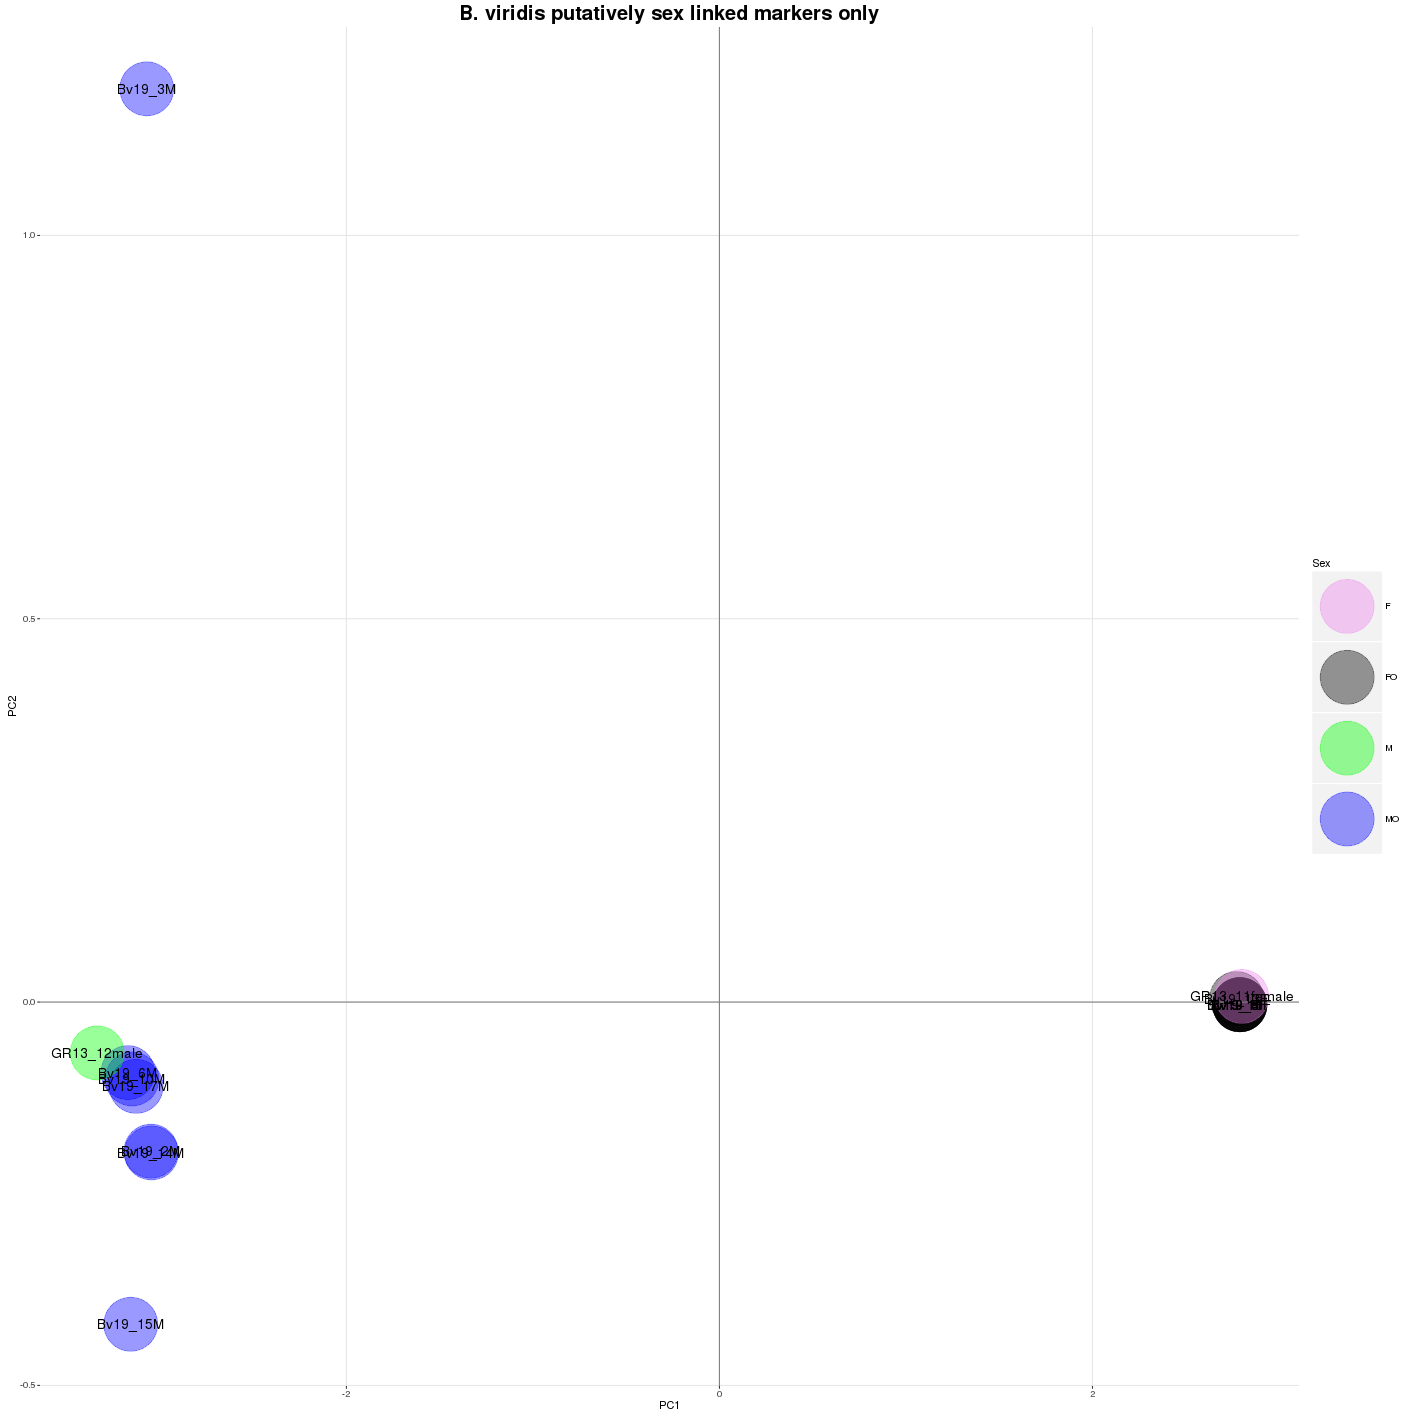

In [55]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca3,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis putatively sex linked markers only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Interestingly still a couple of outliters on the male side of things!! Can perhaps think about this in more detail later.

# Family 93x94

#### Relaxed populations command:

populations -b1 -P ./ -M popmap.txt -r 0.5 -p 2 --vcf -t 8 > Populations.log 2>&1 &

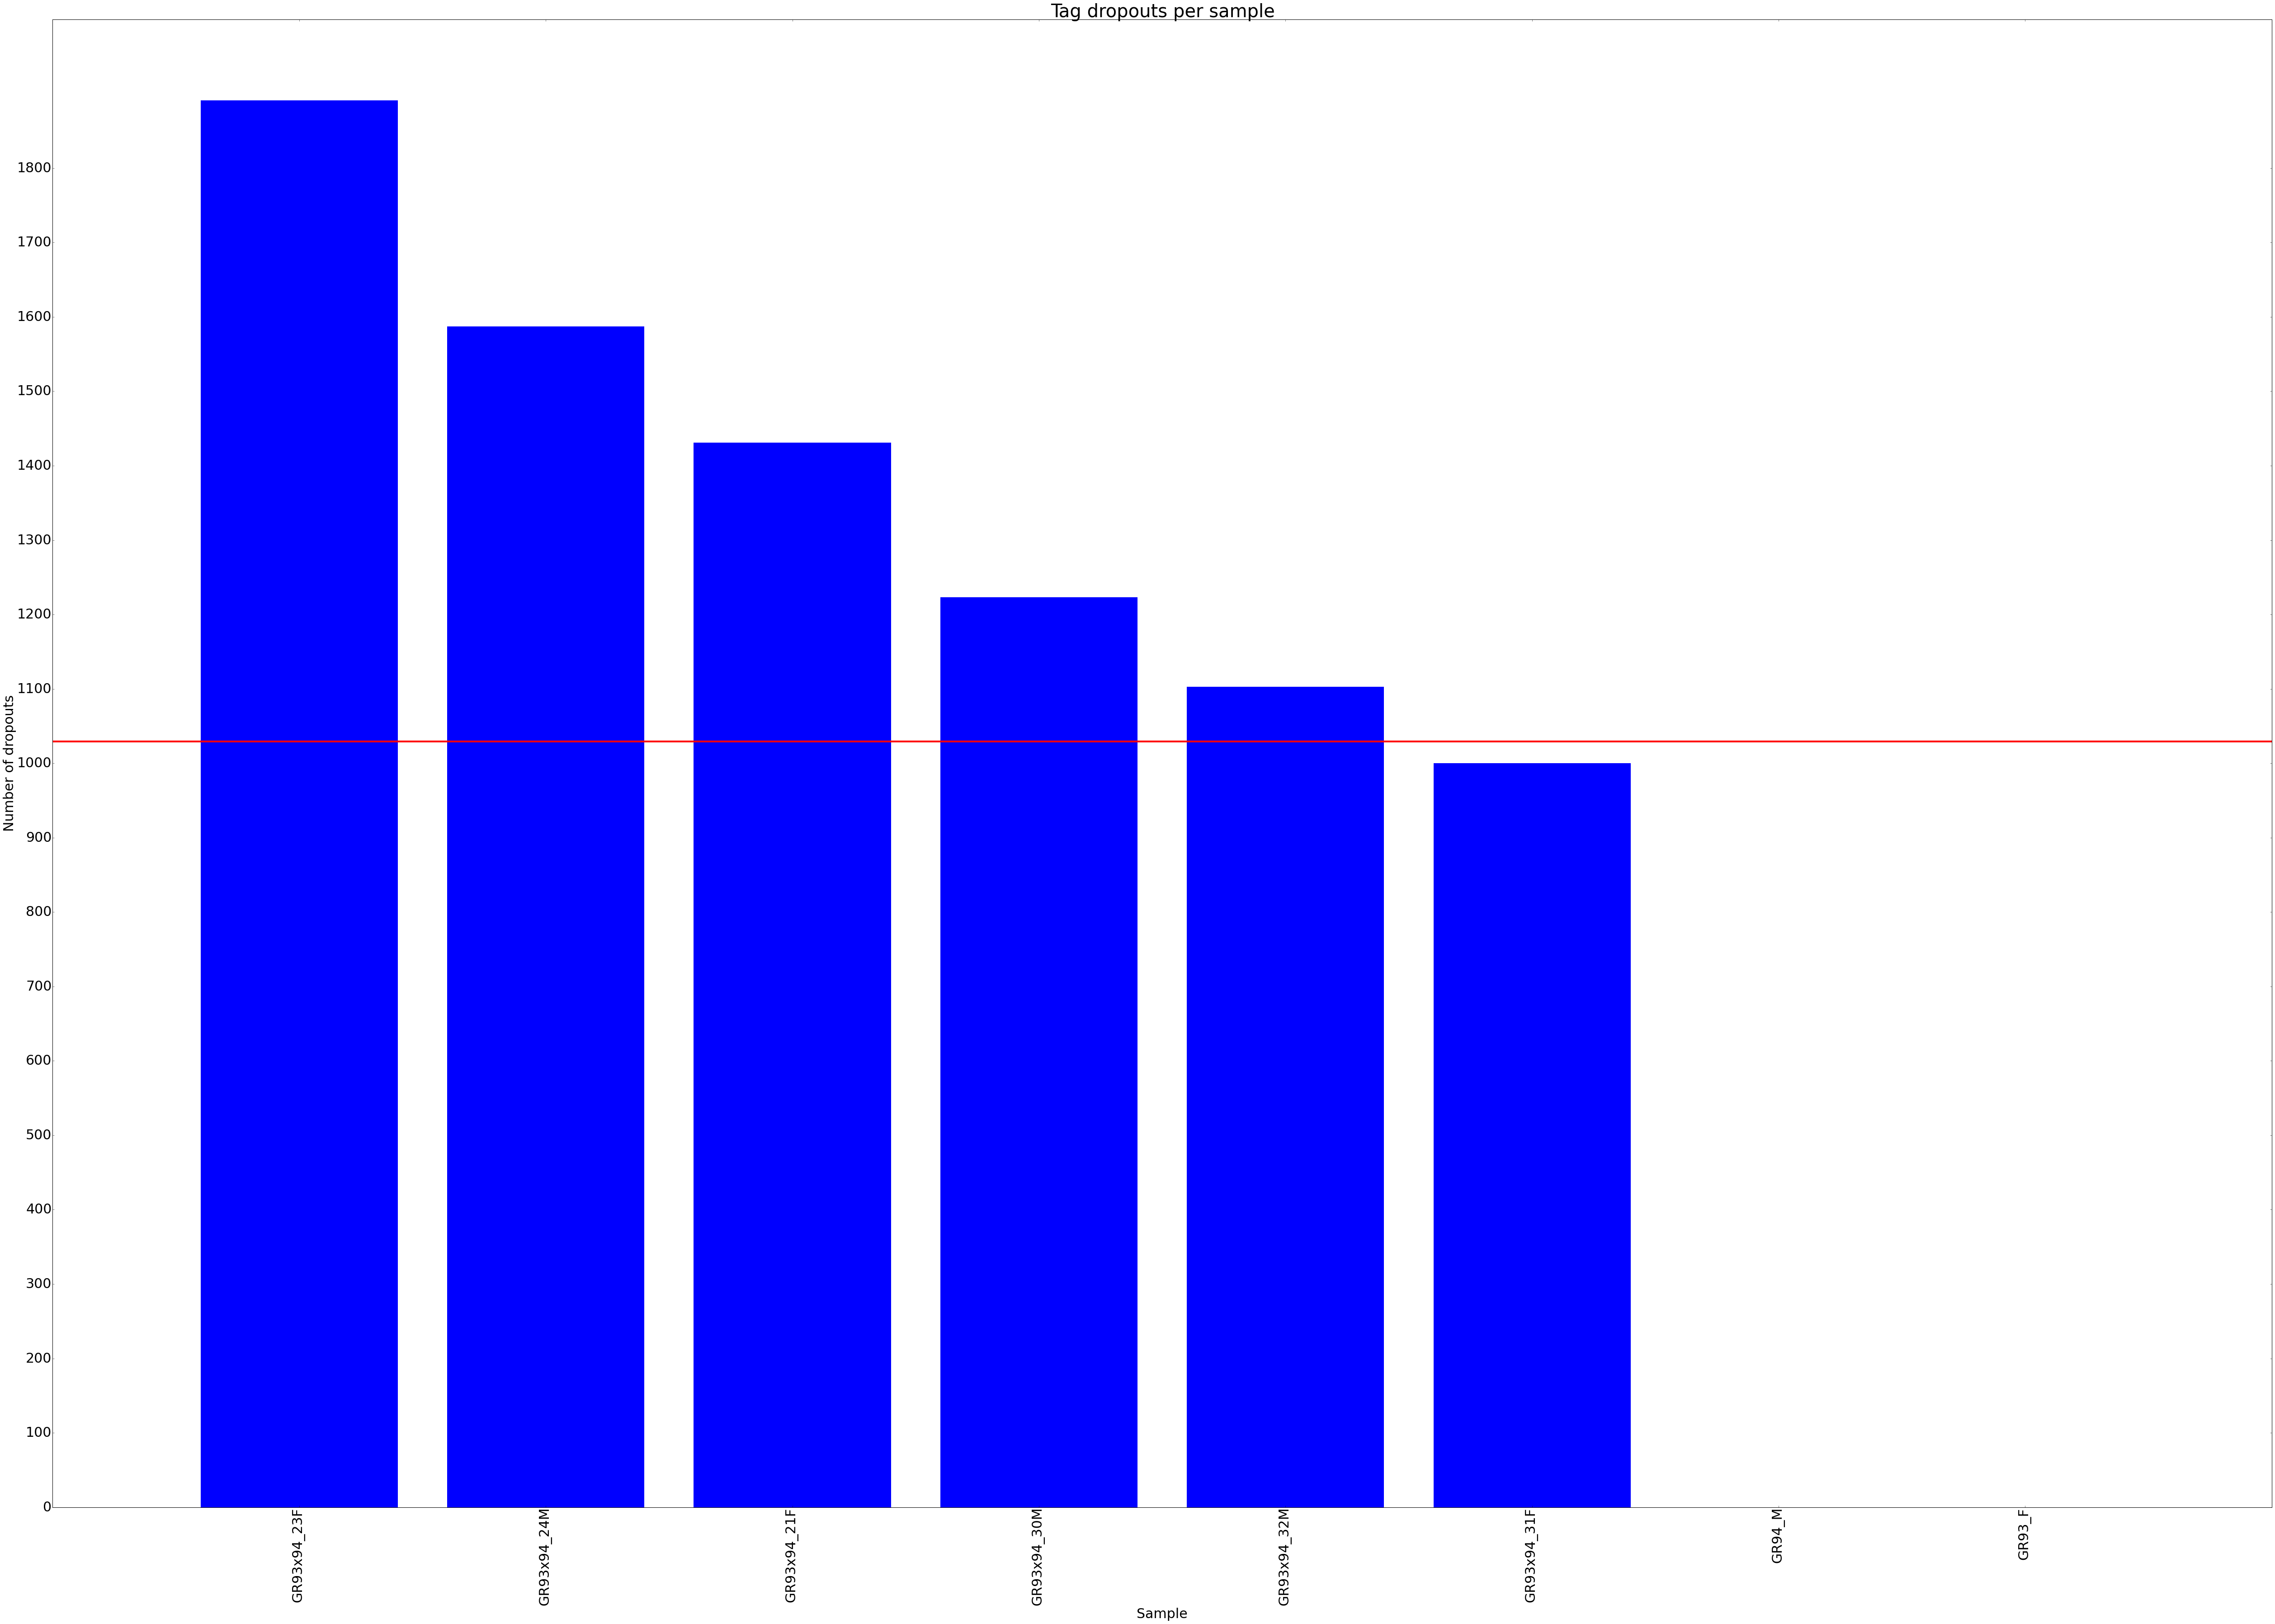

Outputs written to:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/relaxed_SNPs//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/relaxed_SNPs//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/relaxed_SNPs//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/relaxed_SNPs//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/relaxed_SNPs//blacklist.txt


In [56]:
wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/relaxed_SNPs/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

Data looks good! Move on to the strict populations run:


    populations -b1 -P ./ -M popmap.txt -r 0.75 -p 4 --vcf -t 8 > Populations_strict.log 2>&1 &

Running populations like this means that a locus has to be present in ALL SAMPLES


Number of tags =  6393
Average tag coverage 19.3799663695 (+- 10.8527878734 )


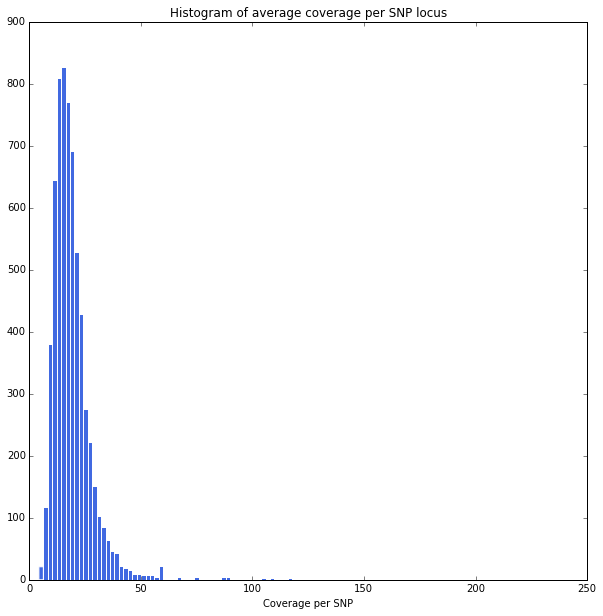

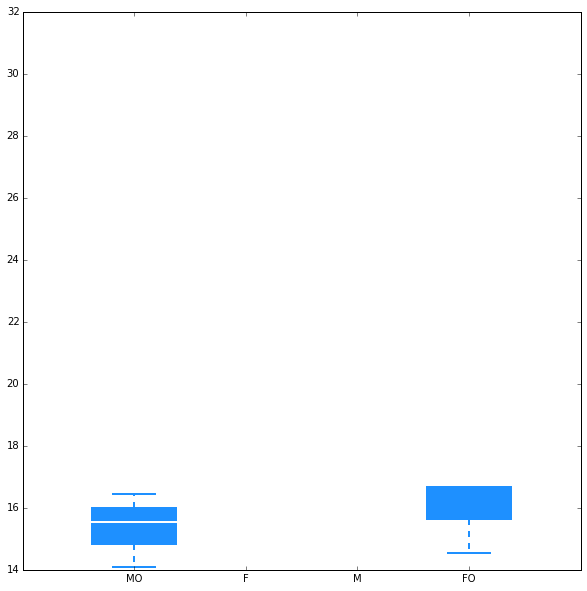

In [59]:
final_vcf = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/batch_1.vcf"
final_popmap = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/popmap.txt"
tag_means, pop_cov_data = MISC.Super_av_tag_cov(final_vcf, popmap = final_popmap)

A decent number of SNPs and a decent amount of coverage. So now I will run the family through the function to find sex linked markers. Note however, the number of offspring in this family is very low. So I am not sure how confidentally we can find markers. I will therefore be very strict here, i.e. the male allele has to be passed to EVERY male, and absent in EVERY female. 

In [275]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/batch_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/popmap.txt"
catalog_file = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 1   # 100% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 1  # 100% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 1  # 100% of the homogametic sex must be homozygous


_93x94_XYs, _93x94_ZWs = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 3075

N loci suitable for XY testing: 1497
N XY test loci with enough heterozygous males: 334
N loci that fit the specified XY criteria: 100

N loci suitable for ZW testing: 1578
N ZW test loci with enough heterozygous females: 782
N loci that fit the specified ZW criteria: 33


Ok, so not as many as the previous family, but it is reassuring that there are many more loci supporting XY than ZW. There are quite a few supporting ZW but high numbers of false positives is to be expected with so few samples. 

So now I will just check on PCA as usual.

In [62]:
XY_IDs = [i.split("_")[0] for i in _93x94_XYs]

MISC.filter_vcf(vcf_path, XY_IDs , "XY_linked_snps.vcf") ## Function to filter a vcf for a subset of markers

In [63]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/  ## just change this line

## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered.vcf   ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered_plink ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs//XY_linked_snps_altered_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs//XY_linked_snps_altered_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs//XY_linked_snps_altered.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs//XY_linked_snps_altered_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs//XY_linked_snps_altered_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs//XY_linked_snps_altered_plink-temporary.fam
written.
112 variants loaded from .bim file.
8 people (0 males, 0 females,

In [64]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/") 

## Sex linked SNPs only 
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca4 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



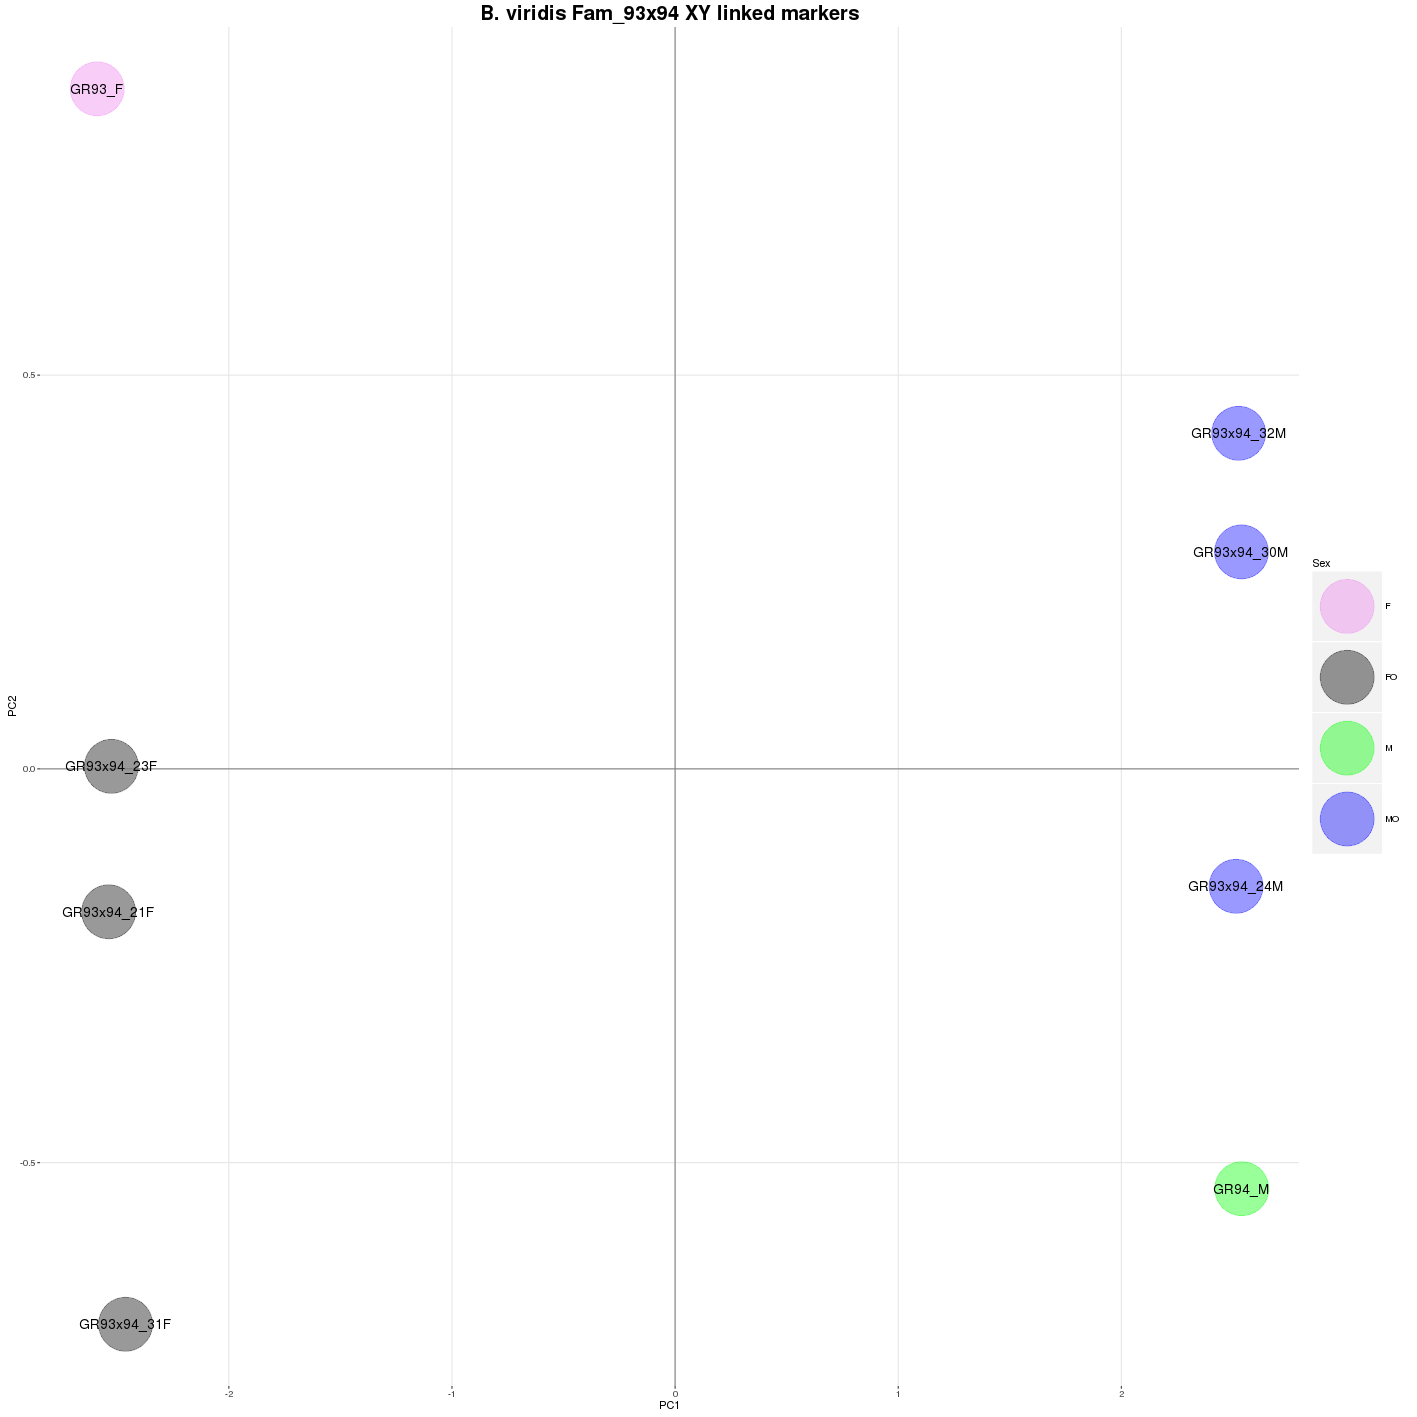

In [65]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca4,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis Fam_93x94 XY linked markers", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So these loci are very diagnostic between sex. There is quite a bit of spread between them, but I imagine that a few missed genotype calls could do this in a dataset with so few samples and such low diversity. 

So next question, are these 100 loci the same as those loci found in family Bv?

# FAM_GR95x96

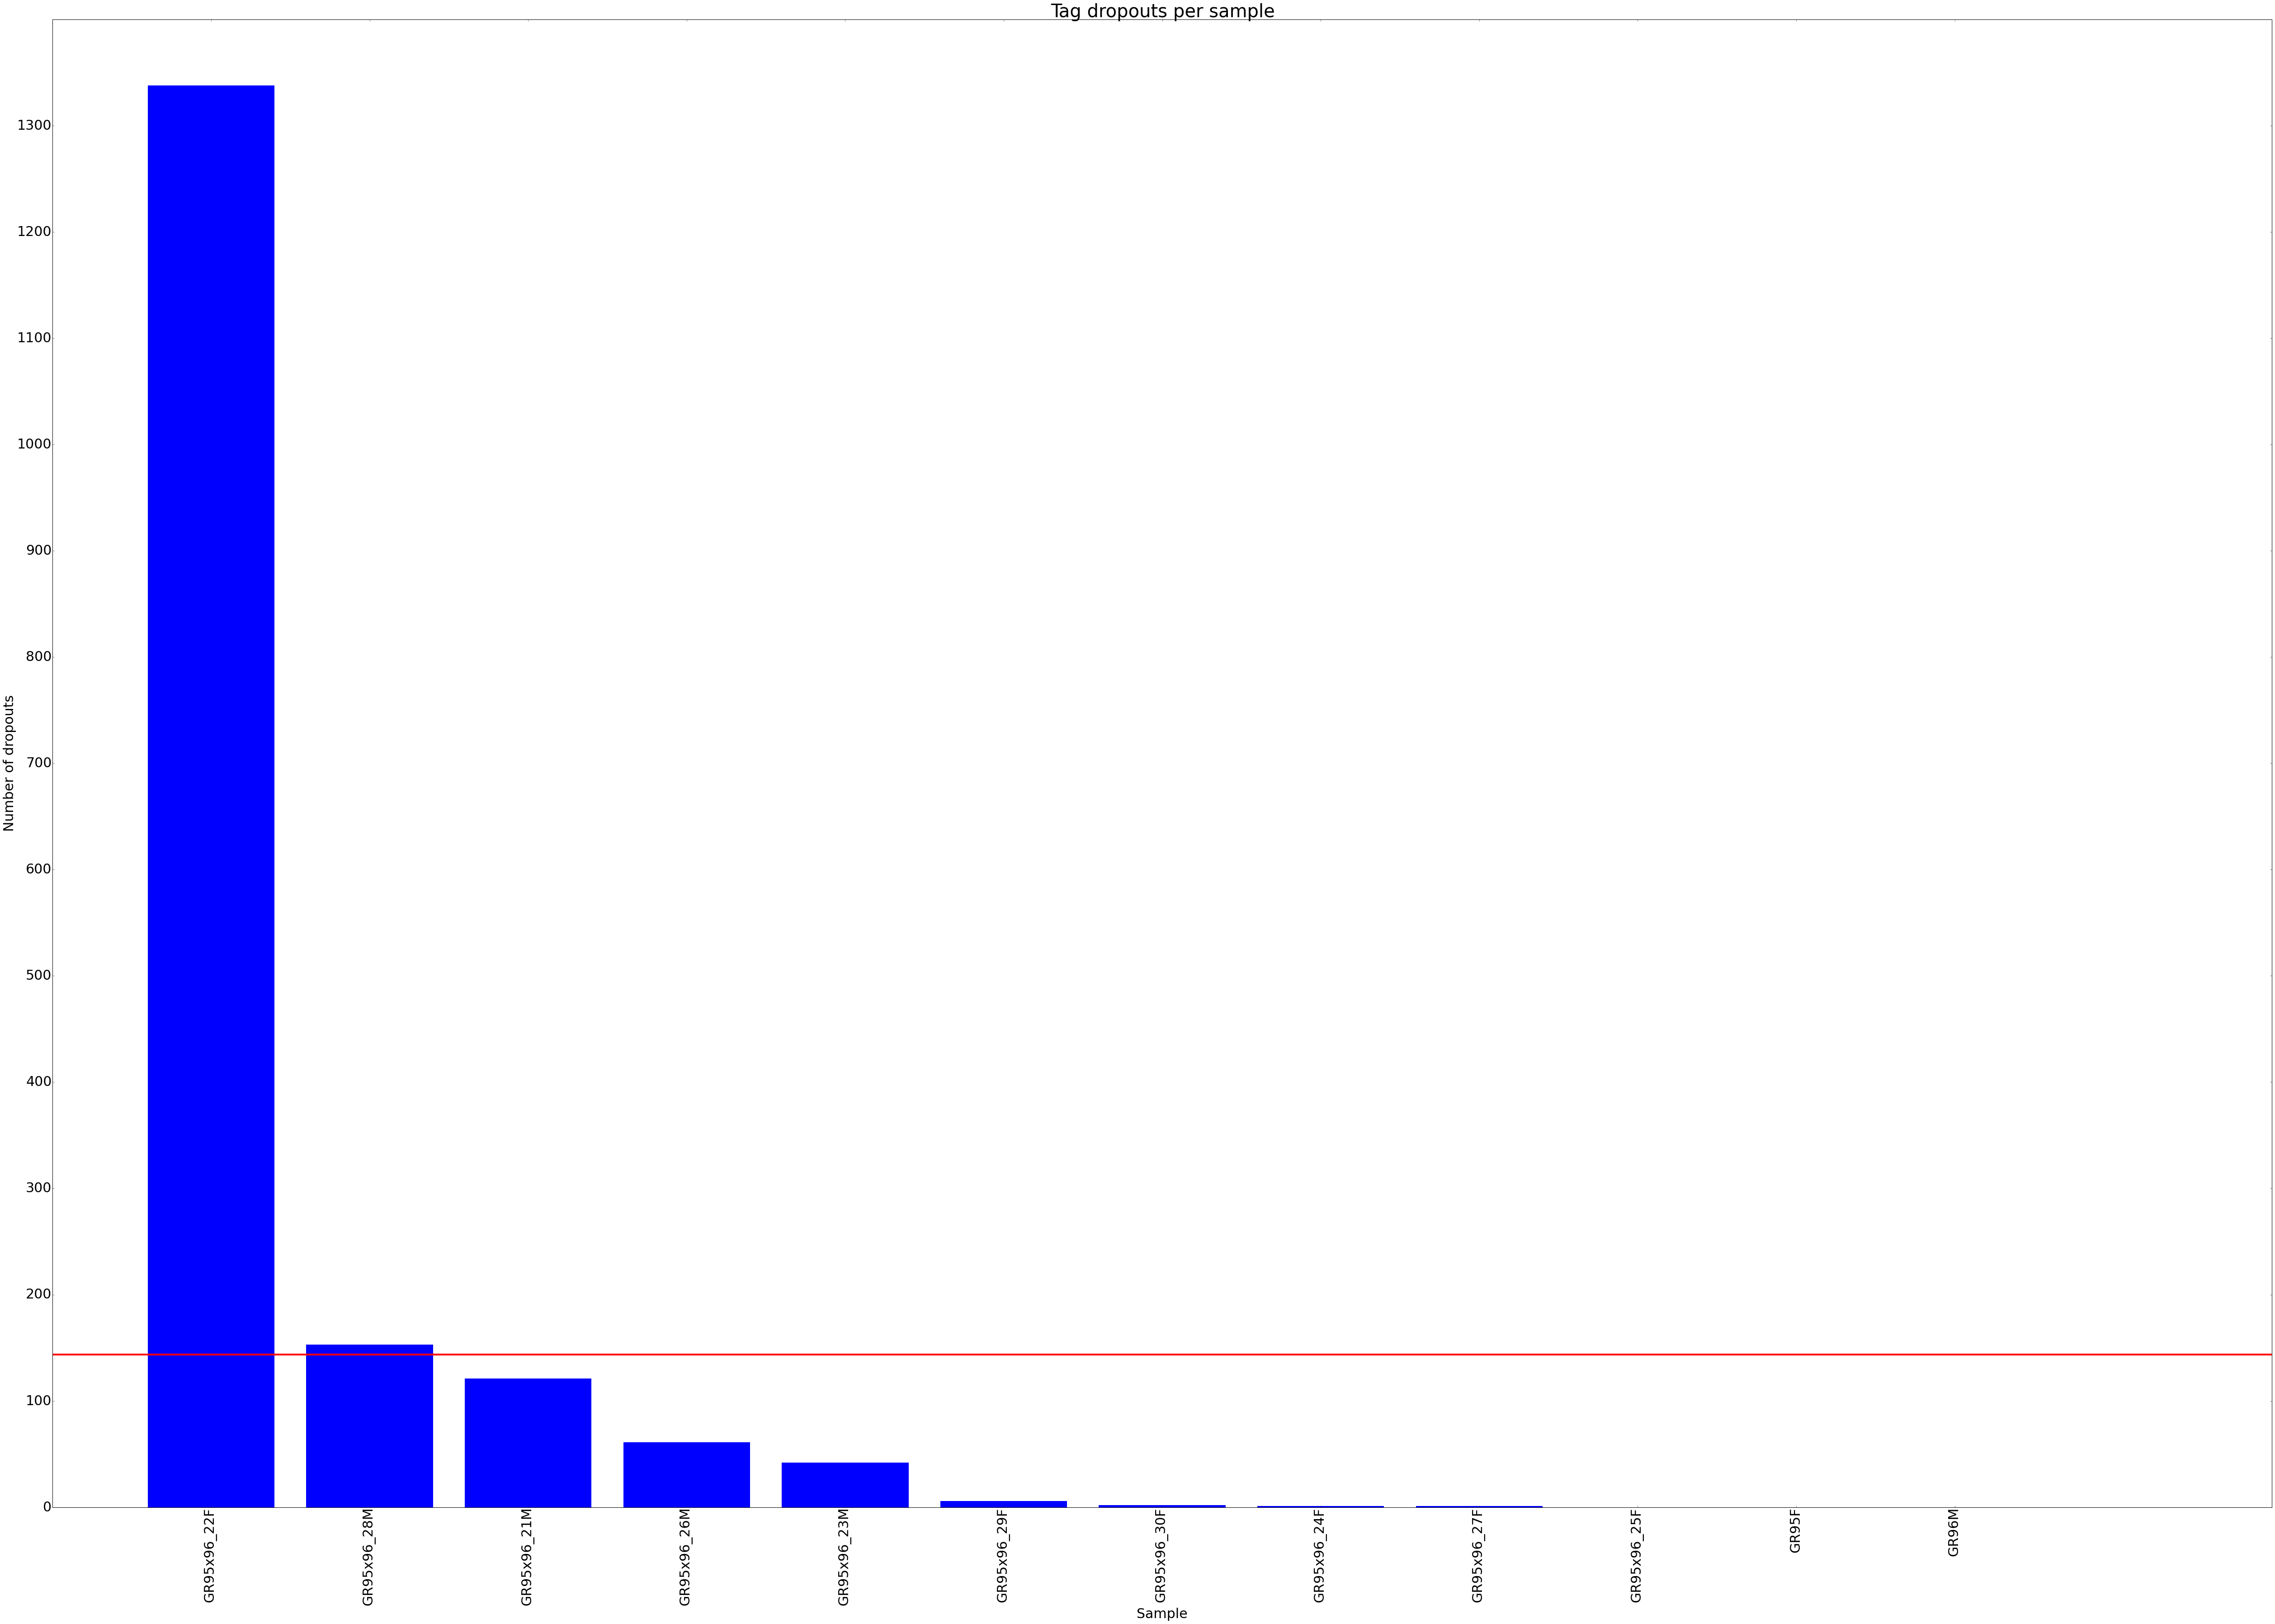

Outputs written to:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//blacklist.txt


In [91]:
wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

So there is one bad sample in here. So I removed this (GR95x96_22F) and re-ran populations using the same parameters as above.

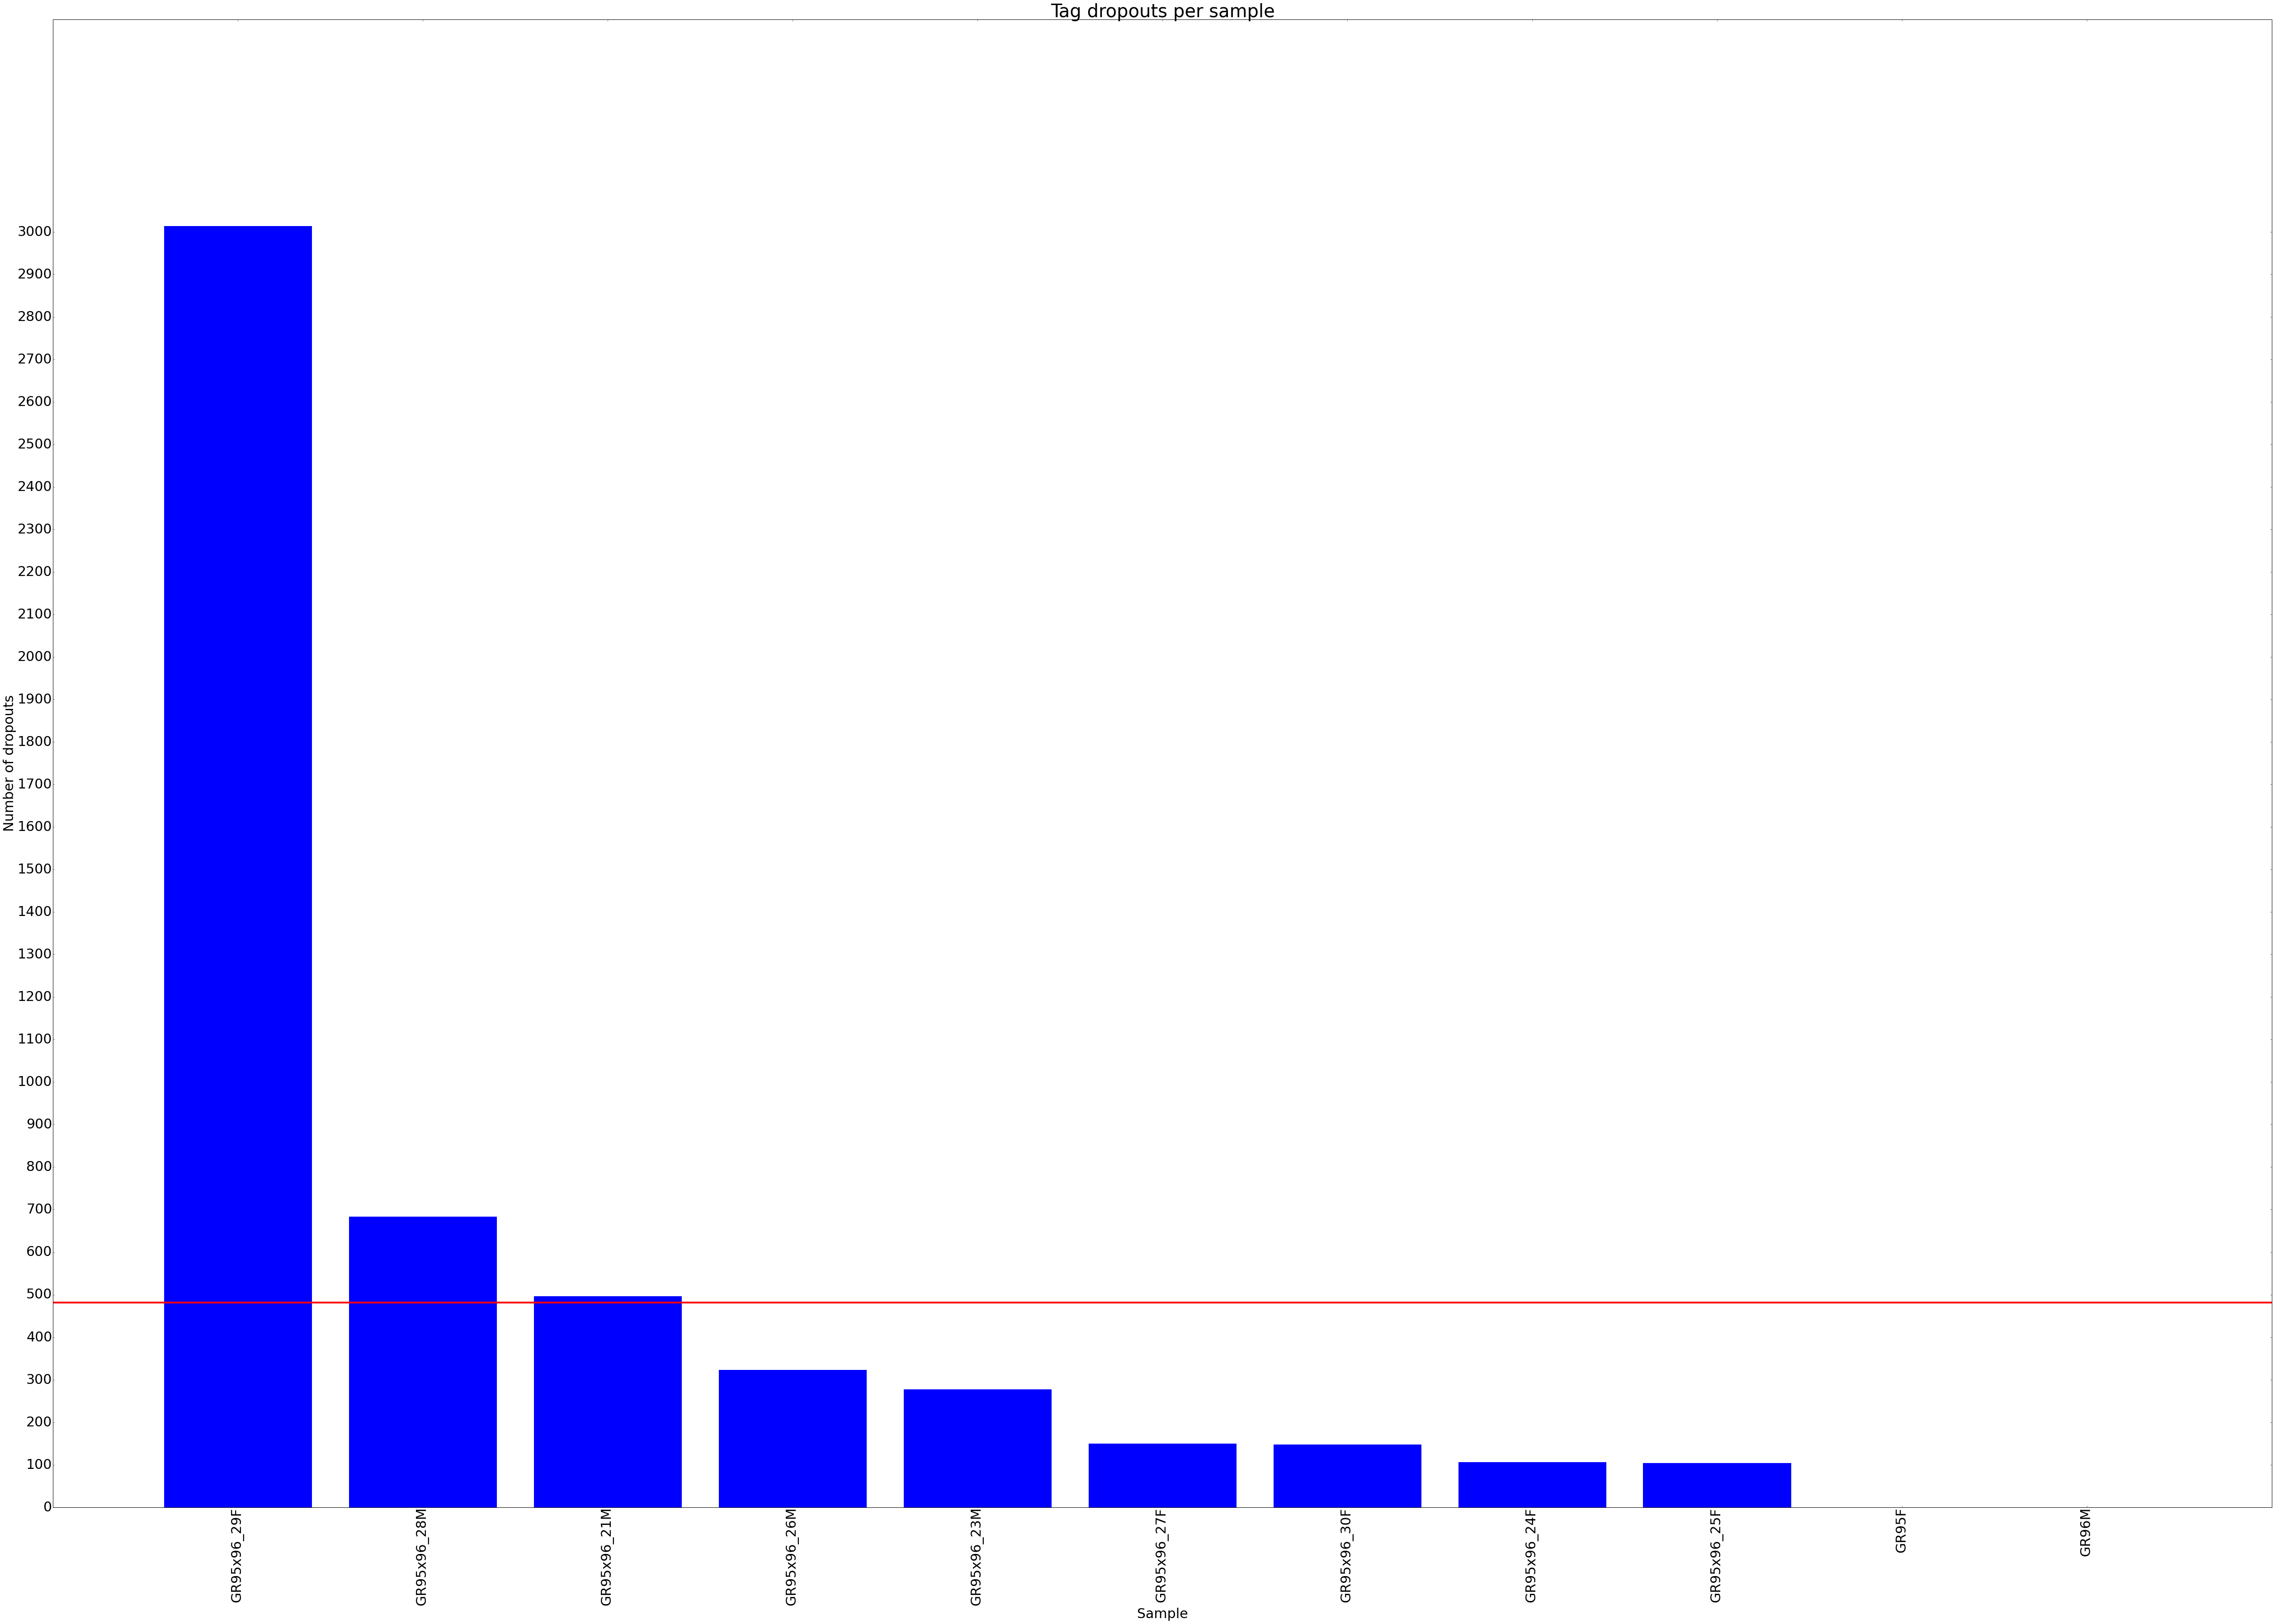

Outputs written to:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//blacklist.txt


In [92]:
wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/"

blacklist = MISC.missing_data_finder("%s/batch_1_kept.vcf" % wd, wd)

So we still lose quite a few loci because of this other female (_29F) So I will remove this sample too. 

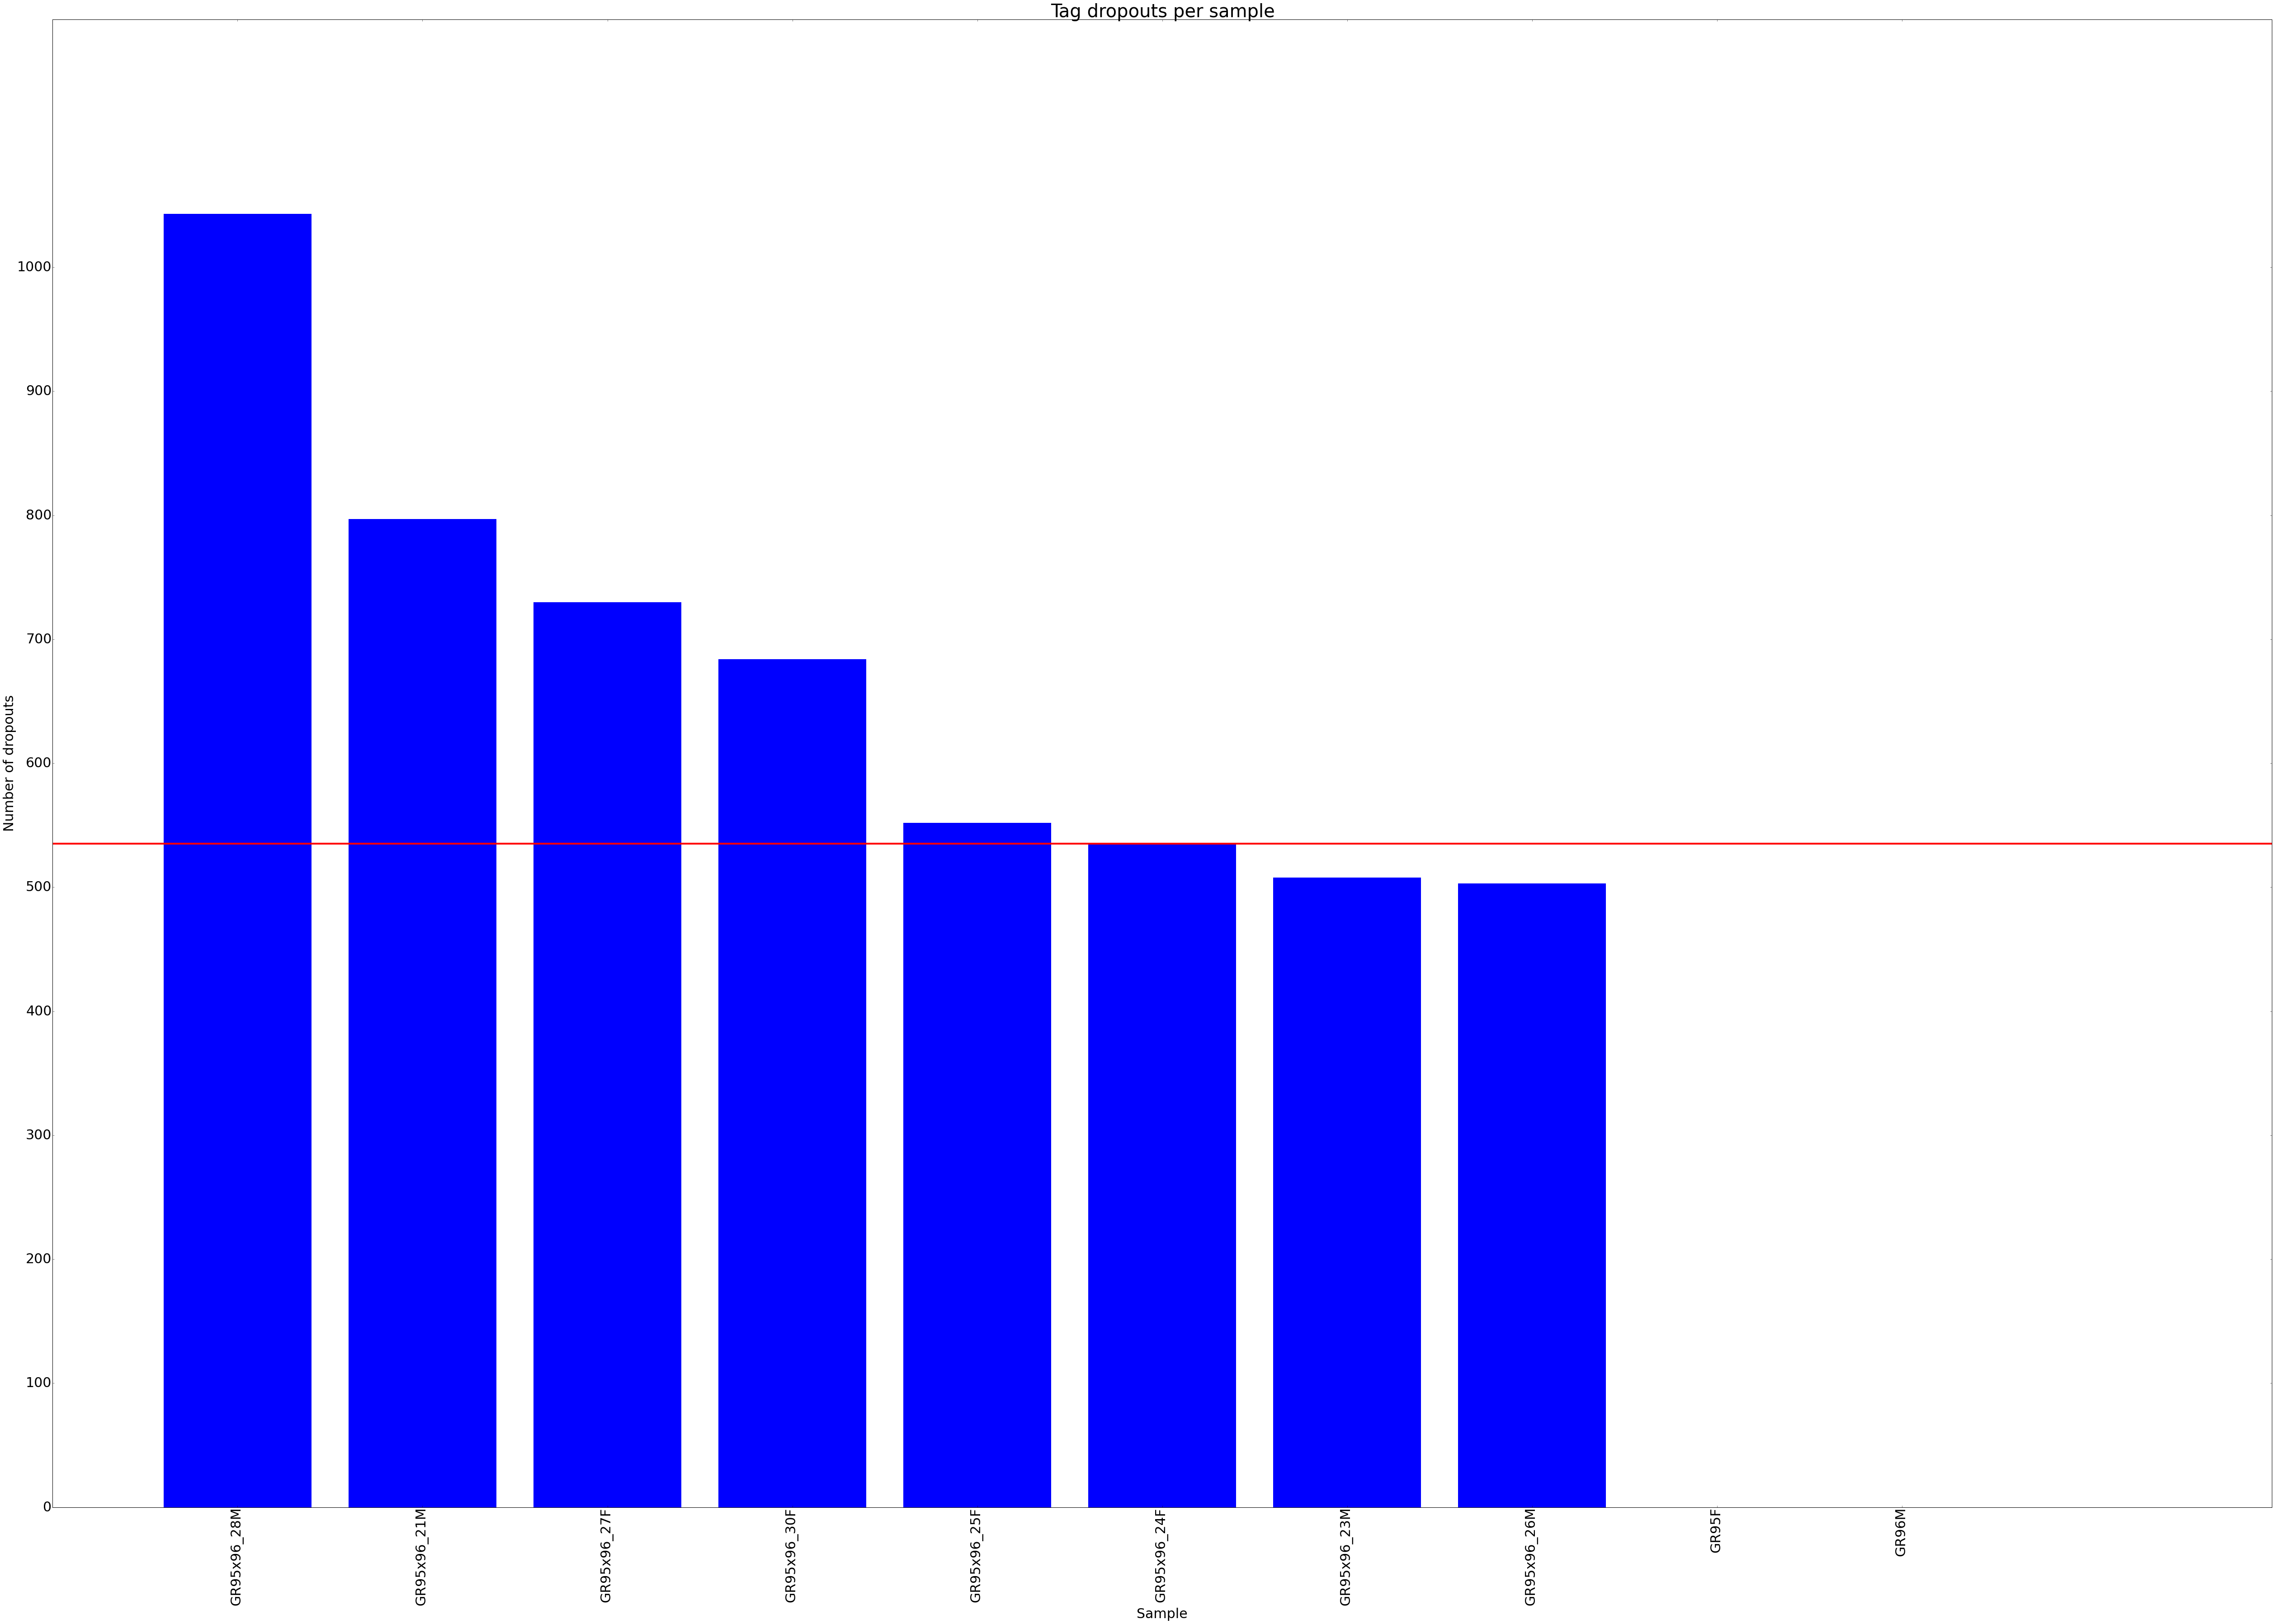

Outputs written to:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//blacklist.txt


In [114]:
wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/"

blacklist = MISC.missing_data_finder("%s/batch_1_kept_1.vcf" % wd, wd)

## Finding the sex linked loci

In [274]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/batch_1_kept_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/pop_map_kept_1.txt"
catalog_file = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 1   # 100% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 1  # 100% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 1  # 100% of the homogametic sex must be homozygous


GR_95x96_XYs, GR_95x96_ZWs = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 1243

N loci suitable for XY testing: 563
N XY test loci with enough heterozygous males: 96
N loci that fit the specified XY criteria: 58

N loci suitable for ZW testing: 680
N ZW test loci with enough heterozygous females: 469
N loci that fit the specified ZW criteria: 0


So there are a few more here now, I will continue with this subset.

## Running PCA

In [117]:
#XY_IDs = [i.split("_")[0] for i in GR_95x96_XYs]

MISC.filter_vcf(vcf_path, XY_IDs , "XY_linked_snps.vcf") ## Function to filter a vcf for a subset of markers

In [118]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/  ## just change this line

## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered.vcf   ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered_plink ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//XY_linked_snps_altered_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//XY_linked_snps_altered_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//XY_linked_snps_altered.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//XY_linked_snps_altered_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//XY_linked_snps_altered_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96//XY_linked_snps_altered_plink-temporary.fam
written.
61 variants loaded from .bim file.
10 people (0 males, 0 females, 10 ambiguous) loaded from .fam.
Ambiguous sex IDs written t

In [122]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/") 

## Sex linked SNPs only 
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("pop_map_kept_1.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca5 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



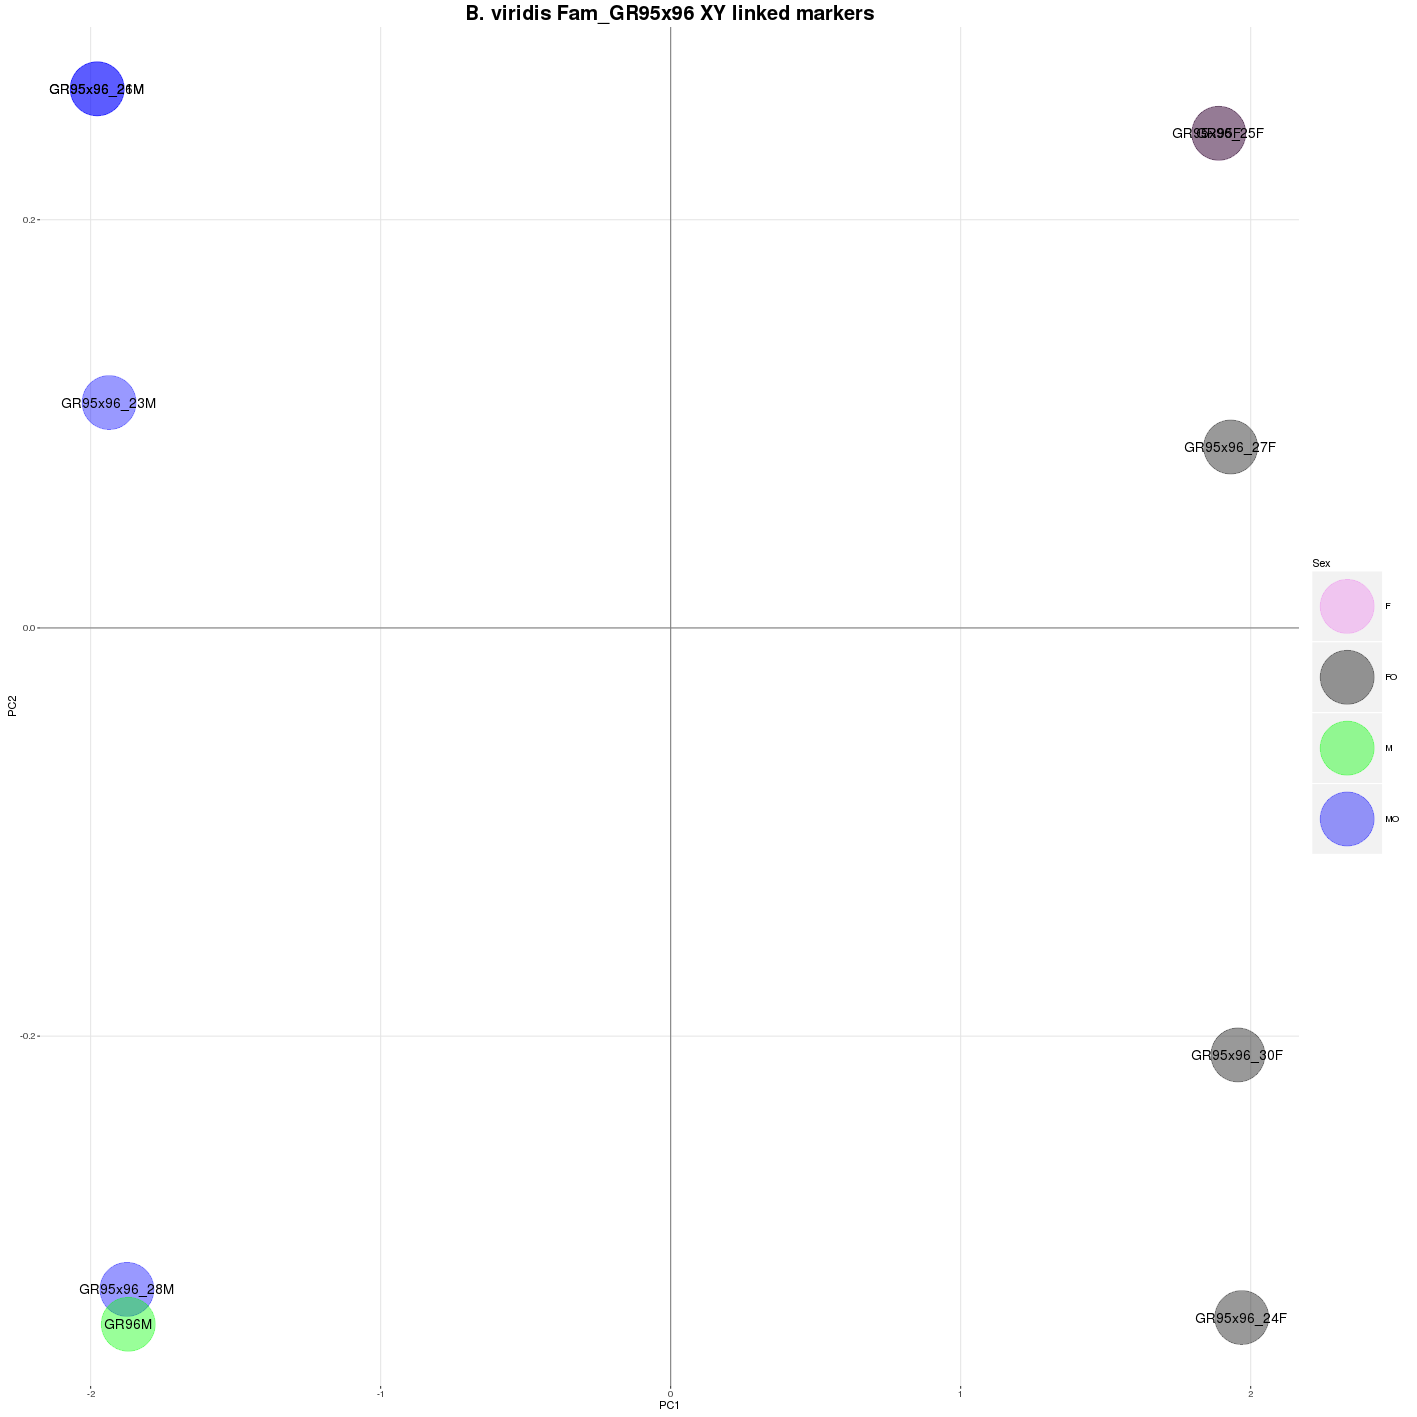

In [123]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca5,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "B. viridis Fam_GR95x96 XY linked markers", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So these again have a lot of spread between them. But this is at least consistent with the other families. 

### So the question now is, are the loci which are sex linked in these three families orthologous?

In [168]:
print len(Bv_XYs_set)
print len(_93x94_XYs_set)
print len(GR_95x96_XYs_set)

123
89
53


<matplotlib_venn._common.VennDiagram instance at 0x7fe52de61a28>

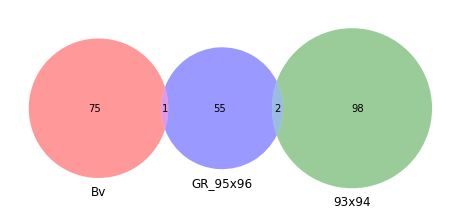

In [279]:
from matplotlib_venn import venn3  ## get function for plotting venn diagram
from matplotlib import pyplot as plt

## prepare datasets

#Bv_XYs_list = [i.split("_")[0] for i in Bv_XYs]
Bv_XYs_set = set(Bv_XYs)

#_93x94_XYs_list = [i.split("_")[0] for i in _93x94_XYs]
_93x94_XYs_set = set(_93x94_XYs)


#GR_95x96_XYs_list = [i.split("_")[0] for i in GR_95x96_XYs]
GR_95x96_XYs_set = set(GR_95x96_XYs)


## make venn
plt.figure(figsize = (8,8))
venn3([Bv_XYs_set, _93x94_XYs_set, GR_95x96_XYs_set], ("Bv", "93x94", "GR_95x96"))

It seems largely not! Which is either indicative of a problem with the data, the analyses, or there are actually 3 different haplotypes in these three males! So which is it??

Maybe, as a comparison I will look at the number of loci shared by these families. . . 

In [125]:
import vcf

In [281]:
import vcf

Bv_vcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_Bv/Final_SNP_data/edited_pop_map_analyses/batch_1.vcf.altered",'r'))
_93x94_vcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_93x94/strict_SNPs/batch_1.vcf.altered",'r'))
GR95x96_vcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/FAM_GR95x96/batch_1_kept_1.vcf.altered", 'r'))

Bv_tags = []
_93x94_tags = []
GR95x96_tags = []

for record in Bv_vcf:
    Bv_tags.append("%s_%s" % (record.ID, record.POS))

for record in _93x94_vcf:
    _93x94_tags.append("%s_%s" % (record.ID, record.POS))
    
for record in GR95x96_vcf:
    GR95x96_tags.append("%s_%s" % (record.ID, record.POS))

Bv_tags = set(Bv_tags)
_93x94_tags = set(_93x94_tags)
GR95x96_tags = set(GR95x96_tags)
    
print "Number of tags in family Bv: ", len(Bv_tags)
print "Number of tags in family 93x94: ", len(_93x94_tags)
print "Number of tags in family GR95x96: ", len(GR95x96_tags)


Number of tags in family Bv:  6313
Number of tags in family 93x94:  6393
Number of tags in family GR95x96:  6782


<matplotlib_venn._common.VennDiagram instance at 0x7f44bcffb6c8>

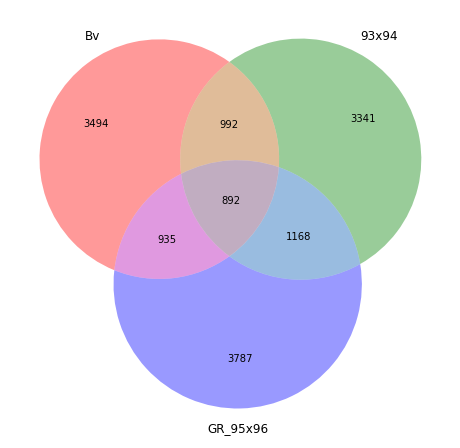

In [8]:
plt.figure(figsize = (8,8))
venn3([Bv_tags, _93x94_tags, GR95x96_tags], ("Bv", "93x94", "GR_95x96"))


So actually the number of SNPs shared in general is not huge. But the question really is, are the sexed linked markers in one family just absent in the datasets of the other families (due to stochasticity in RADseq datasets) or are they present and just not sex linked. . . ?

<matplotlib_venn._common.VennDiagram instance at 0x7fe527d04b48>

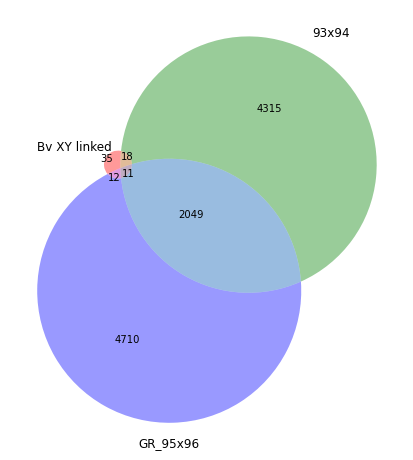

In [282]:
## Bv sex linked tags Vs. whole datasets of other families
plt.figure(figsize = (8,8))
venn3([Bv_XYs_set, _93x94_tags, GR95x96_tags], ("Bv XY linked", "93x94", "GR_95x96"))



<matplotlib_venn._common.VennDiagram instance at 0x7fe52ce5dcf8>

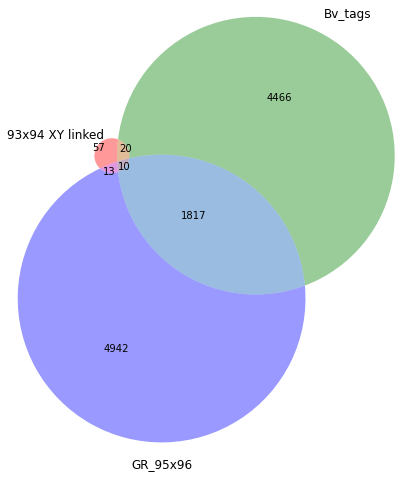

In [283]:
## Bv sex linked tags Vs. whole datasets of other families
from matplotlib import pyplot as plt

plt.figure(figsize = (8,8))
venn3([_93x94_XYs_set, Bv_tags, GR95x96_tags], ("93x94 XY linked", "Bv_tags", "GR_95x96"), normalize_to = 10)


<matplotlib_venn._common.VennDiagram instance at 0x7fe52da32a70>

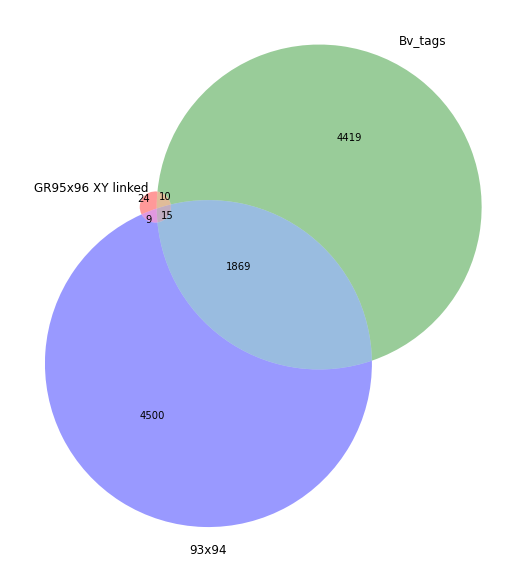

In [284]:
## Bv sex linked tags Vs. whole datasets of other families
plt.figure(figsize = (10,10))
venn3([GR_95x96_XYs_set, Bv_tags, _93x94_tags], ("GR95x96 XY linked", "Bv_tags", "93x94"))


So, the answer is a bit of both. There is some locus dropout between families, so 47/123, 45/89 and 20/53 sex linked tags for Bv, 93x94 and 95x96 respectively are not present in the other families. 

But if we take the intersections of all three of these last venn diagrams, that means that there are 27+17+16 = 60 loci that are present in all three families but are sex linked in only one or two families, NOT all of them. It would be interesting to look at the genotypes of these loci across these samples. . . to adress the question, are these loci indeed not sex linked, or is it problems with the sequencing that is causing these loci not to meet the sex linked criteria in all families??

In [7]:
## First, a little function to find elements of a list which are present a certain number of times

def common(mylist, N):
    from collections import Counter
    new_list = []
    Counted = Counter(mylist)

    for i in Counted:
        if Counted[i] == N:
            new_list.append(i)
    return new_list

In [8]:
## Find tags shared by all families
all_tags = (list(Bv_tags) + list(_93x94_tags) + list(GR95x96_tags))
allshared = common(all_tags, 3)

# Find tags shared by all families and sex linked in at least one family
allshared_BvXYs = (allshared+list(Bv_XYs_set))
allshared_93x94_XYs = (allshared+list(_93x94_XYs_set))
allshared_95x96_BvXYs = (allshared+list(GR_95x96_XYs_set))

BvXYs_shared_only = common(allshared_BvXYs, 2)
_93x94_shared_only = common(allshared_93x94_XYs, 2)
GR_95x96_shared_only = common(allshared_95x96_BvXYs, 2)

## Add these into a list 
linked_and_shared = (GR_95x96_shared_only + _93x94_shared_only + BvXYs_shared_only)
len(linked_and_shared)

50

I will now run populations, for all samples only using these loci, in order to get their genotpyes into the same vcf file for visualisation. *** NOTE - these 60 loci are actually only 56, there was a little overlap between some loci, which must be shared between 2 families

In [310]:
# make the whitelist to use in populations. 
whitelist = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations/whitelist.txt", 'w')

for i in linked_and_shared:
    whitelist.write("%s\n" % i)
    
whitelist.close()

Now converting to plink format to use in the visualisation in the same R package as before

In [329]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations/

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf  ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink  ## convert to plink format

## I then ordered this file to make visualisation easier

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations//batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations//batch_1_altered_adegenet_plink-temporary.fam
written.
79 variants loaded from .bim file.
35 peo

## Visualising with a heatmap

<b>Matthias</b> - The plotting software here has cut off the axis names and I haven't got around to fixing it. See pdf I emailed you!

So here the clustering works on two dimensions, individuals are clustered using the order of he rows and the dendogram to the left, and the loci are clustered by column and the dendogram above the plot. On the heat map itself, the colours correspond to the genotpe: Dark blue = Homozygous (minor allele), light blue = Homozygous (major allele), orange = heterozygous. 

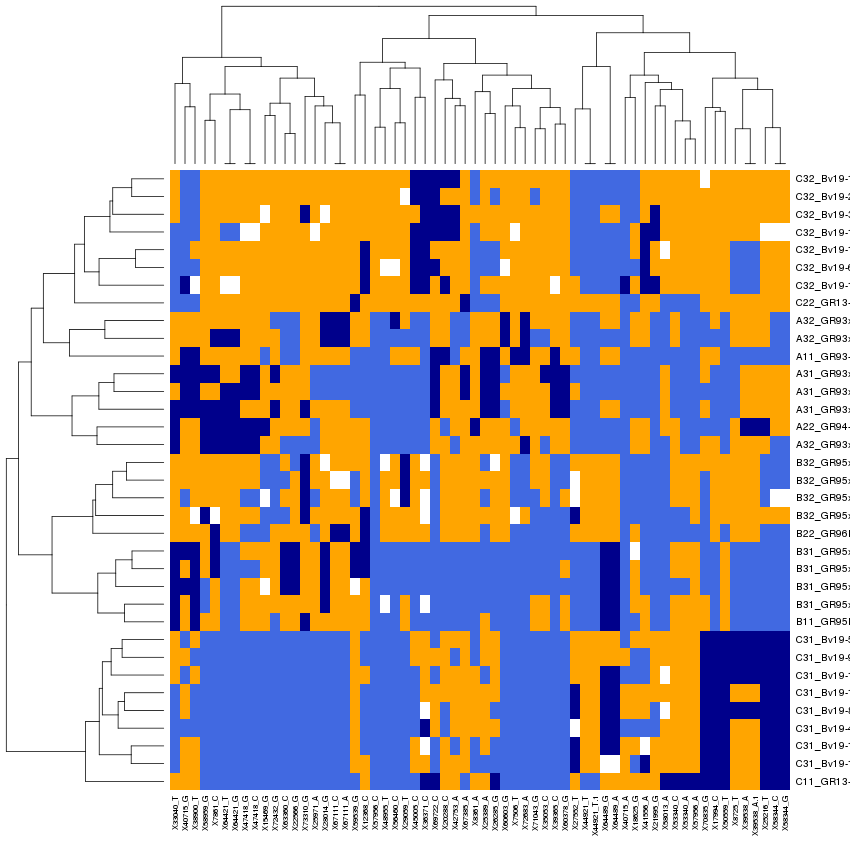

In [332]:
%%R -w 30 -h 30 -u cm


alldat <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations/ordered_plinks/plink_fam_sorted_for_heatmap2.raw", row.names = 1)

alldat_sorted <- alldat[order(row.names(alldat), decreasing = T), ]




alldatmat <- as.matrix(alldat_sorted )

heatmap(alldatmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1)


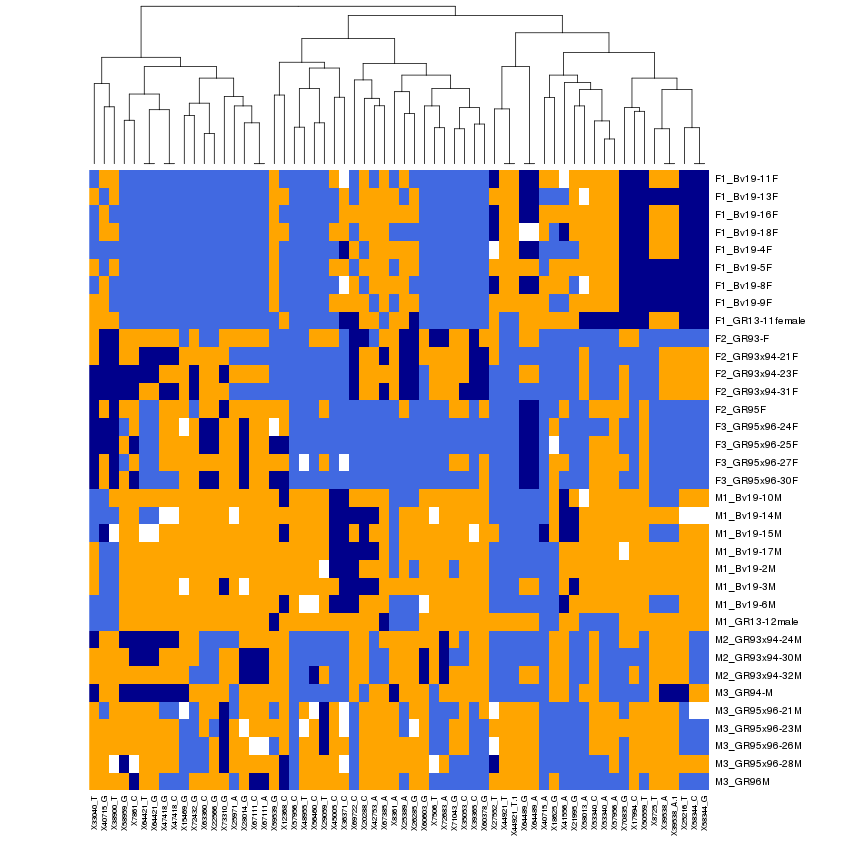

In [334]:
%%R -w 30 -h 30 -u cm

alldat <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/All_samples_populations/ordered_plinks/plink_sex_sorted_for_heatmap2.raw", row.names = 1)

alldat_sorted <- alldat[order(row.names(alldat), decreasing = T), ]

alldatmat <- as.matrix(alldat_sorted )


heatmap(alldatmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, Rowv = NA)

## To do next. . . . 

See if I can identify any sex linked markers that are common to all males (all Ys) by disregarding family information and running standard analyses (Breslford & Lavanchy et al. 2016) using just male and female information.

Populations was run with the below command:

    populations -b1 -P ./ -M Family_blind_analyses/pop_map_all_samples_kept.txt -r 0.75 -p 2 --min_maf 0.05 -t 8 --vcf > Populations_fam_blind.log 2>&1 &

In [17]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/pop_ID_info_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 14115
Number of samples = 35
Number of loci with too few samples = 3375
Number of loci with low MAF = 227
Number of loci with enough data = 10512
Number of putative X linked snps = 3
Number of putative X linked tags = 3
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


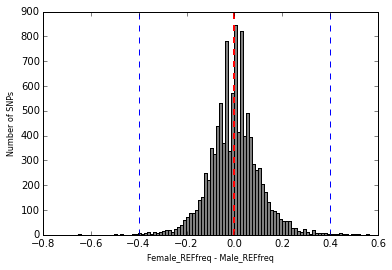


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 14115
Number of samples = 35
Number of loci with too few samples = 3547
Number of loci with low MAF = 55
Number of loci with enough data = 10512
Number of putative X linked snps = 2
Number of putative X linked tags = 1
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 18
Number of males: 17
Number of Putative Y linked tags: 9
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 13
Final number of ZW tags = 0
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:46: UserWarning: All circles have zero area
  warnings.warn("All circles have zero area")


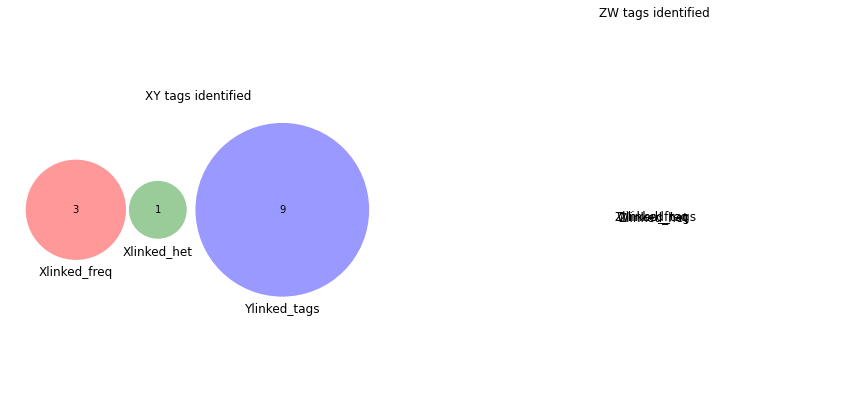

In [18]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

Good news, there are some XY linked markers identified (and no ZW's which is a good sign)

In [19]:
print "Number of markers found when pooling all males and females = %s" % len(XYset)

Number of markers found when pooling all males and females = 13


Of these 9 are Y specific, so could not have been detected with the family approach. So that leaves 4.


The question therefore is; are these loci (not the Y linked ones) in the sets identified in the families?

In [29]:
## Bv
N_in_bv = 0
N_in_93x94 = 0
N_in_95x96 = 0

Bv_XYs_tag = [i.split("_")[0] for i in Bv_XYs_set]
_93x94_XYs_tag = [i.split("_")[0] for i in _93x94_XYs_set]
GR_95x96_XYs_tag = [i.split("_")[0] for i in GR_95x96_XYs_set]

for i in XYset:
    if i in Bv_XYs_tag:
        N_in_bv += 1
    if i in _93x94_XYs_tag:
        N_in_93x94 += 1
    if i in GR_95x96_XYs_tag:
        N_in_95x96 += 1
        
print "Number of these markers found in Bv family = %s" % N_in_bv
print "Number of these markers found in 93x94 family = %s" % N_in_93x94
print "Number of these markers found in 95x96 family = %s" % N_in_95x96

Number of these markers found in Bv family = 1
Number of these markers found in 93x94 family = 1
Number of these markers found in 95x96 family = 0


Some are identified in Bv and 93x94 but not in 95x96. This looks to me like a power issue, the number of these markers identified follows the pattern of number of samples in each family. 

So why are these loci not being identified in the families??

After having a closer look, it seems that it is just due to the random dropout of samples at a locus. For example, in some cases, the male or female parent is missing at a locus, thus this locus cannot be used in the family approach. In other cases, too many of the offspring are missing. 

So my feeling is that these 4 loci are likely to indeed be sex linked, but are not identified in the family data due to 1) Lack of power coming from low number of samples, 2) the random dropout of loci across samples that will be present in a dataset of such low coverage.

Unfortunately this makes them difficult to validate, except for those that are present in Bv. 

The next thing to do is to see if I can make a linkage map with these families and combine them into one. I can then try to validate the sex linked markers identified here by mapping them to linkage groups. If they all map to a single one, then the likelihood that they are sex linked is higher.

In [15]:
vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/batch_1.vcf"

MISC.filter_vcf(vcf_path, XY_snps_only , "XY_linked_snps_freq_het.vcf") ## Function to filter a vcf for a subset of markers 

NameError: name 'XY_snps_only' is not defined

In [20]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/

## All data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_agegenet.vcf  ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_agegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_plink  ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//XY_linked_snps_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//XY_linked_snps_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//XY_linked_snps_freq_het_agegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//XY_linked_snps_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//XY_linked_snps_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//XY_linked_snps_plink-temporary.fam
written.
25 variants loaded from .bim file.
35 people (0 males, 0 females, 35 ambiguous) loaded from .fa

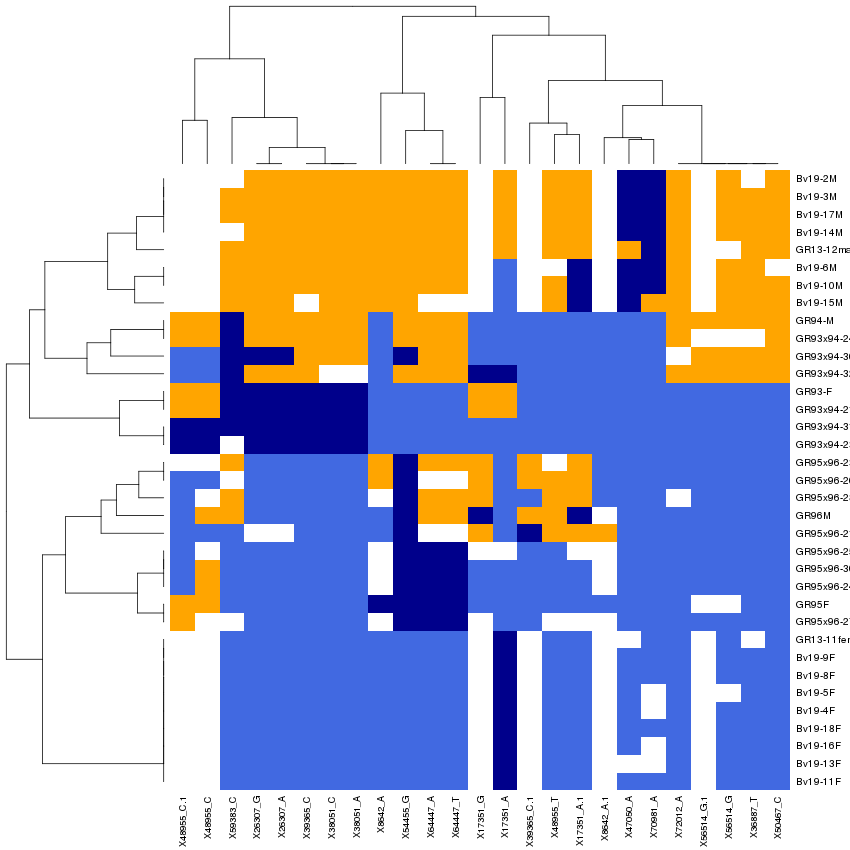

In [22]:
%%R -w 30 -h 30 -u cm


alldat <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/XY_plink_for_heatmap.raw", row.names = 1)

alldat_sorted <- alldat[order(row.names(alldat), decreasing = T), ]




alldatmat <- as.matrix(alldat_sorted )

heatmap(alldatmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1)

Interestingly the dataset containing the loci identified by pooling all males shows the same pattern as those identified in Bv. I think this is just beacause there is a bias of loci from the Bv family in this loci subset.

So I now want to look separately at the loci that are sex linked in each family and present in the other two families as well. I am expecting that there will be equivalent patterns in the other families, i.e. the 93x95 Y will cluster with the other families and away from its X. . . etc

In [9]:
## Getting the loci_subsets.

print "Loci sex linked in Bv and present in both other families: %s" %  len(BvXYs_shared_only)
print "Loci sex linked in 93x94 and present in both other families: %s" %  len(_93x94_shared_only)
print "Loci sex linked in 95x96 and present in both other families: %s" %  len(GR_95x96_shared_only)


Loci sex linked in Bv and present in both other families: 25
Loci sex linked in 93x94 and present in both other families: 10
Loci sex linked in 95x96 and present in both other families: 15


Now filtering the main VCF for these loci and making the inputs for the heatmaps . . . 

In [21]:
vcf_path = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/batch_1.vcf"

MISC.filter_vcf(vcf_path, BvXYs_shared_only , "Bv_XY_linked_snps_freq_het.vcf") ## Function to filter a vcf for a subset of markers 
MISC.filter_vcf(vcf_path, _93x94_shared_only , "93_94_XY_linked_snps_freq_het.vcf") ## Function to filter a vcf for a subset of markers 
MISC.filter_vcf(vcf_path, GR_95x96_shared_only , "95_96_linked_snps_freq_het.vcf") ## Function to filter a vcf for a subset of markers 

In [11]:
%%bash

wd=/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/

## All data 
sed 's/_/-/g' $wd/Bv_XY_linked_snps_freq_het.vcf > $wd/Bv_XY_linked_snps_freq_het_agegenet.vcf  ## Change the header (plink can be fussy)
sed 's/_/-/g' $wd/93_94_XY_linked_snps_freq_het.vcf > $wd/93_94_XY_linked_snps_freq_het_agegenet.vcf  ## Change the header (plink can be fussy)
sed 's/_/-/g' $wd/95_96_linked_snps_freq_het.vcf > $wd/95_96_XY_linked_snps_freq_het_agegenet.vcf  ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/Bv_XY_linked_snps_freq_het_agegenet.vcf --recode A --allow-extra-chr -out $wd/Bv_XY_linked_snps_plink  ## convert to plink format
~/Programs/plink_linux_x86_64/plink --vcf $wd/93_94_XY_linked_snps_freq_het_agegenet.vcf --recode A --allow-extra-chr -out $wd/93_94_XY_linked_snps_plink  ## convert to plink format
~/Programs/plink_linux_x86_64/plink --vcf $wd/95_96_XY_linked_snps_freq_het_agegenet.vcf --recode A --allow-extra-chr -out $wd/95_96_XY_linked_snps_plink  ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//Bv_XY_linked_snps_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//Bv_XY_linked_snps_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//Bv_XY_linked_snps_freq_het_agegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//Bv_XY_linked_snps_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//Bv_XY_linked_snps_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses//Bv_XY_linked_snps_plink-temporary.fam
written.
25 variants loaded from .bim file.
35 people (0 males, 0 females, 35 ambiguou

In [12]:
%%bash

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/Bv_XY_linked_snps_plink.raw /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/Bv_XY_heatmap
sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/93_94_XY_linked_snps_plink.raw /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/93_94_XY_heatmap
sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/95_96_XY_linked_snps_plink.raw /home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/95_96_XY_heatmap

### Now making heatmaps

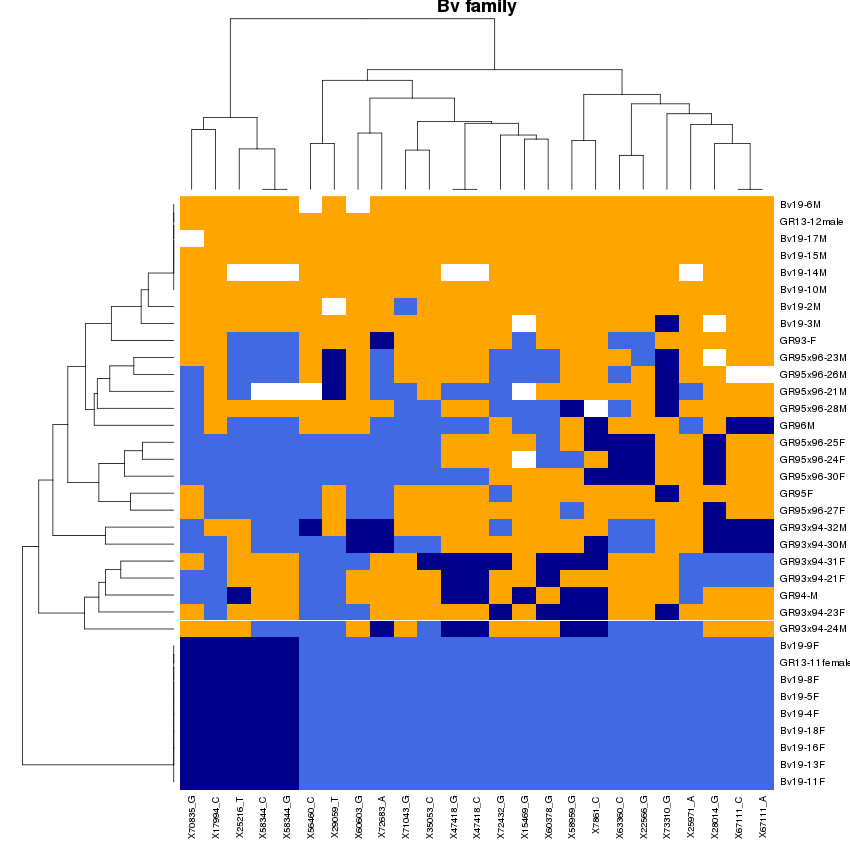

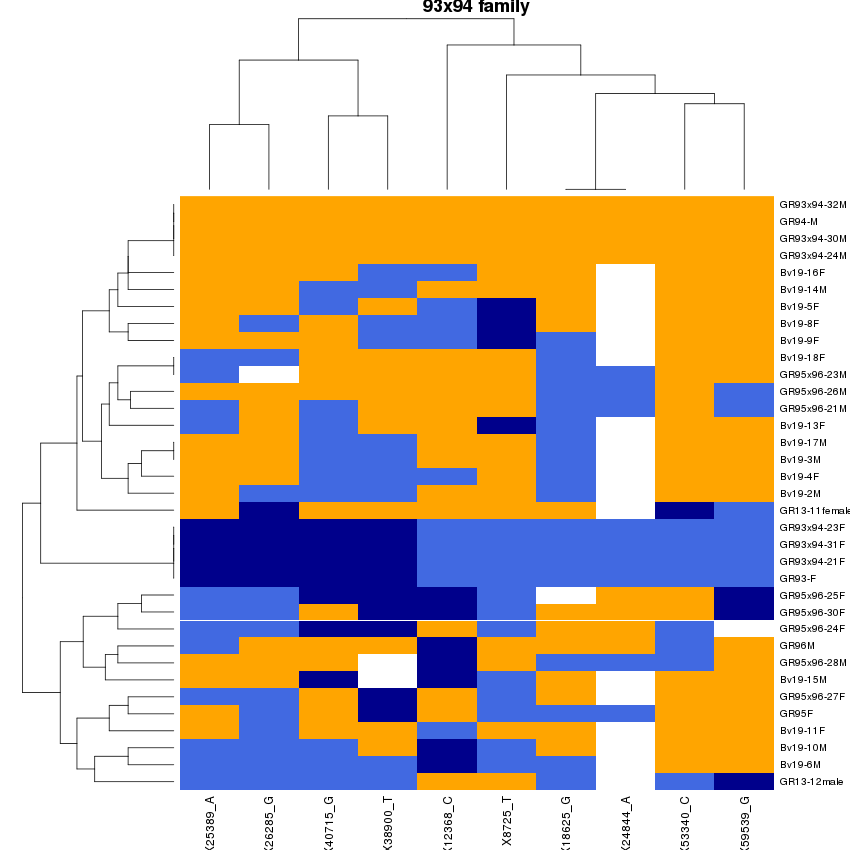

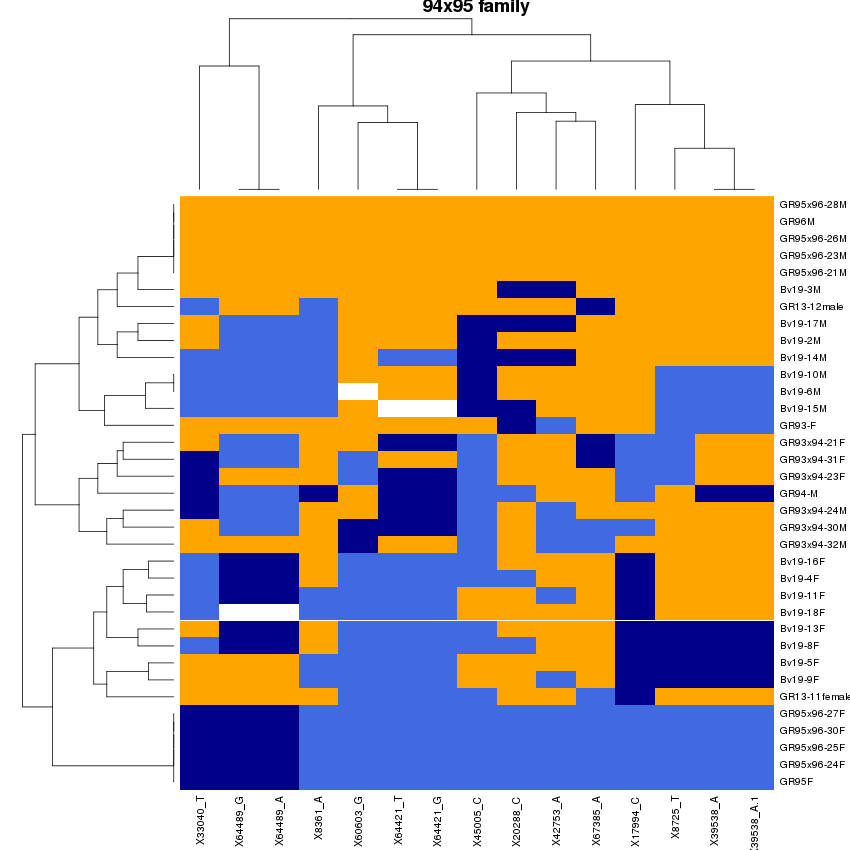

In [15]:
%%R -w 30 -h 30 -u cm

Bvdata <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/Bv_XY_heatmap.raw", row.names = 1)
Bvdata_sorted <- Bvdata[order(row.names(Bvdata), decreasing = T), ]
Bv_datmat <- as.matrix(Bvdata_sorted )

fam_93_94data <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/93_94_XY_heatmap.raw", row.names = 1)
fam_93_94data_sorted <- fam_93_94data[order(row.names(fam_93_94data), decreasing = T), ]
fam_93_94_datmat <- as.matrix(fam_93_94data_sorted )

GR95_96data <- read.delim("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Family_blind_analyses/95_96_XY_heatmap.raw", row.names = 1)
GR95_96_data_sorted <- GR95_96data[order(row.names(GR95_96data), decreasing = T), ]
GR95_96_datmat <- as.matrix(GR95_96_data_sorted )


heatmap(Bv_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Bv family")


heatmap(fam_93_94_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "93x94 family")


heatmap(GR95_96_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "95x96 family")

### Output all the tags into a file for mapping later

In [285]:
print len(Bv_XYs)
print len(GR_95x96_XYs)
print len(_93x94_XYs)

allSLtags = set(Bv_XYs + GR_95x96_XYs + _93x94_XYs)

print len(allSLtags)

76
58
100
231


In [286]:
catalog = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_stacks_outs/batch_1.catalog.tags.tsv.gz"
outfasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/SL_tags.fa"

MISC.fasta_maka(allSLtags, catalog)

Number of tags in whitelist: 231
203 sequences written to /home/djeffrie/Data/RADseq/STOECK/Bviridis/Final_stacks_outs/Whitelist_tags.fa


## Where are these tags in the linkage maps?


The linkage map is not great. There is some linkage signal, but I cannot get the program to confidently split linkage groups!

Below is the two "linkage groups that are resolved from the male of Bv. Adding the female or any of the other families does nothing.



Number of linkage groups: 154
The size of the linkage groups are: 1328	1328	128	128	10	10	42	42	8	8	64	64	2	2	6	6	2	2	7	7	2	2	4	4	9	9	2	2	3	3	5	5	41	41	1	1	5	5	9	9	6	6	15	15	1	1	28	28	2	2	1	1	7	7	3	3	11	11	3	3	2	2	3	3	3	3	2	2	6	6	3	3	6	6	3	3	2	2	6	6	1	1	2	2	1	1	3	3	1	1	2	2	1	1	1	1	1	1	2	2	1	1	1	1	2	2	1	1	1	1	1	1	1	1	1	1	4	4	1	1	1	1	1	1	1	1	1	1	3	3	1	1	1	1	1	1	1	1	1	1	1	1	1	1	2	2	1	1	1	1	1	1	1	1	
The number of bins in each linkage group: 54	54	4	4	1	1	5	5	1	1	3	3	1	1	1	1	1	1	1	1	1	1	1	1	3	3	1	1	1	1	1	1	4	4	1	1	2	2	3	3	2	2	2	2	1	1	3	3	1	1	1	1	2	2	1	1	3	3	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	


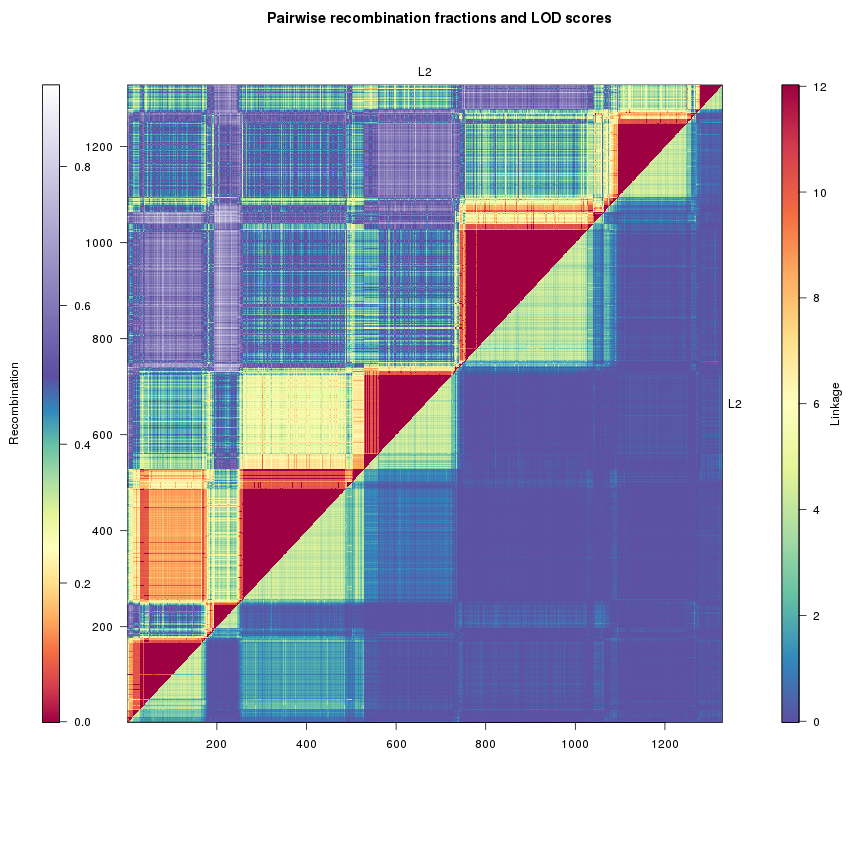

In [287]:
%%R -w 30 -h 30 -u cm

library(ASMap)

## Family Bv =============================================================

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/FAM_Bv/")


Maldat <- read.delim("MST_male_map_input.txt", stringsAsFactors = F)

MstMale <- mstmap(Maldat, pop.type = "DH", dist.fun = "kosambi",
                  objective.fun = "COUNT", p.value = 1e-03, noMap.dist = 30, noMap.size = 1,
                  miss.thresh = 1, mvest.bc = FALSE, detectBadData = TRUE, as.cross = TRUE,
                  return.imputed = TRUE, trace = FALSE)

heatMap(MstMale, chr = c("L2"))

Kept_maleLGs <- subsetCross(MstMale, chr = c("L2"))

#write(names(Kept_maleLGs$geno$L2$map), "Kept_male_linkage_group_L2.txt")



Below, I output the position on this map of each marker in order to find the position of the sex linked markers that I identified. 

In [77]:
%%R
foo <- MstMale$geno$L2$map

bar <- as.data.frame(foo)

write.table(bar, "TEST_LG2_positions.txt")

In [265]:
positions = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/FAM_Bv/TEST_LG2_positions.txt", 'r').readlines()

trimmed_positions = []
positions_only = []

for i in positions:
    loc = i.split()[0]
    positions_only.append(i.split()[1])
    if loc.startswith("compli"):
        loc = "_".join(loc.split("_")[1:])
    trimmed_positions.append(loc)

In [266]:
count = 0
SLpositions = []
for i in range(len(trimmed_positions)):
    if trimmed_positions[i] in allSLtags:
        count += 1
        SLpositions.append(positions_only[i])
        #print trimmed_positions[i], positions_only[i]
        
print count, "out of", len(allSLtags), "sex linked tags present in map"
    
    

163 out of 299 sex linked tags present in map


Very reassuringly, the sex linked tags all fall very close to eachother, in what looks like two or 3 linkage blocks.

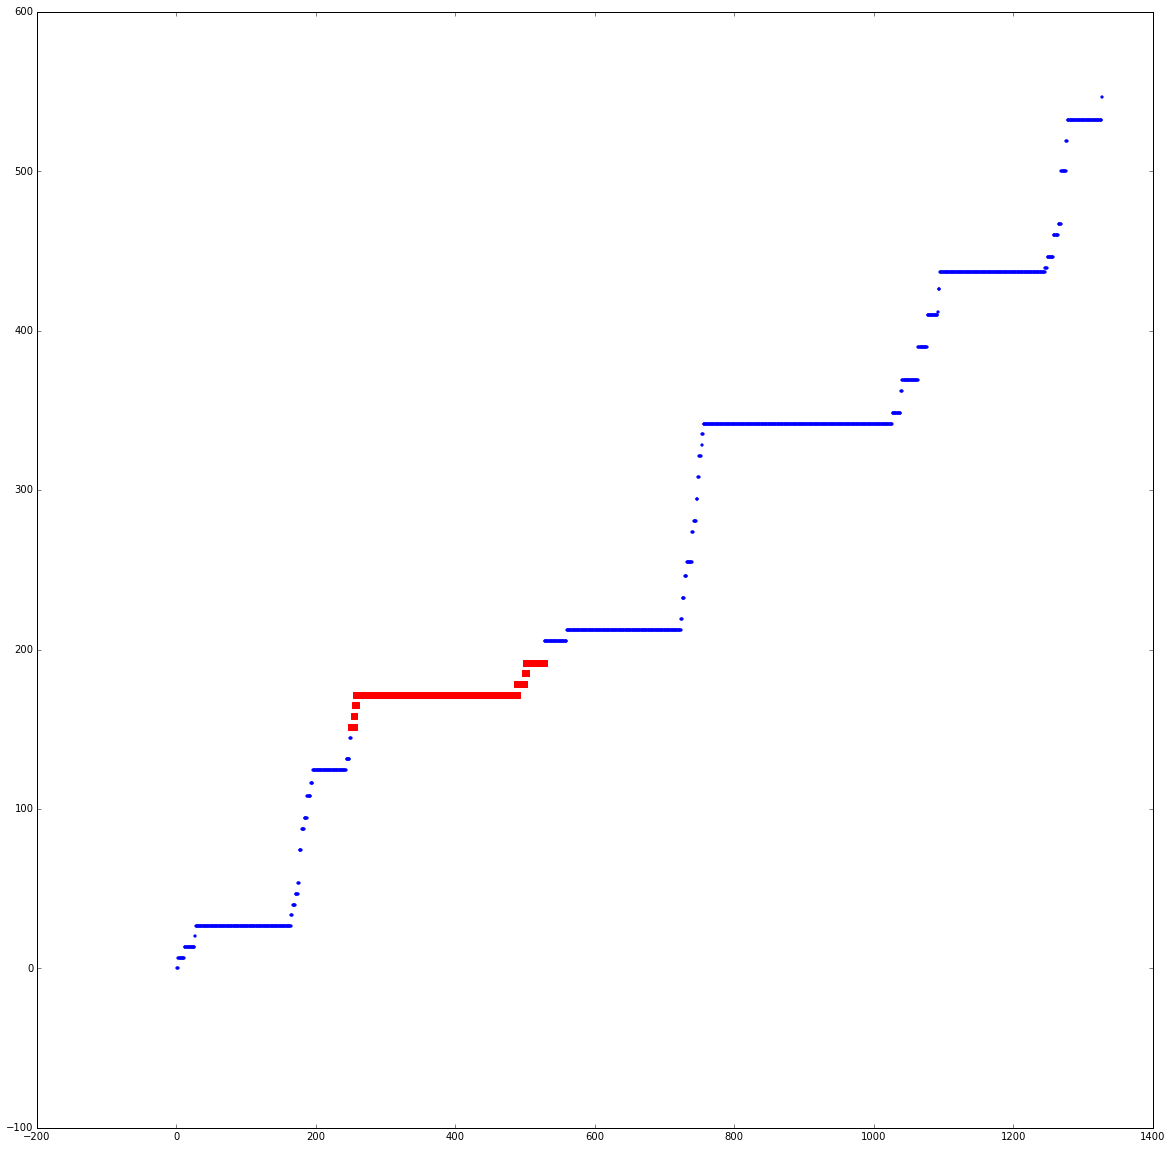

In [267]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))

x = range(1,len(trimmed_positions))
for i in x:
    if trimmed_positions[i] in SLM_markers:
        plt.scatter(i, float(positions_only[i]), color = "red", marker = "s", s = 30 )
    else:
        plt.scatter(i, float(positions_only[i]), color = "blue" , s = 5)
        
plt.show()


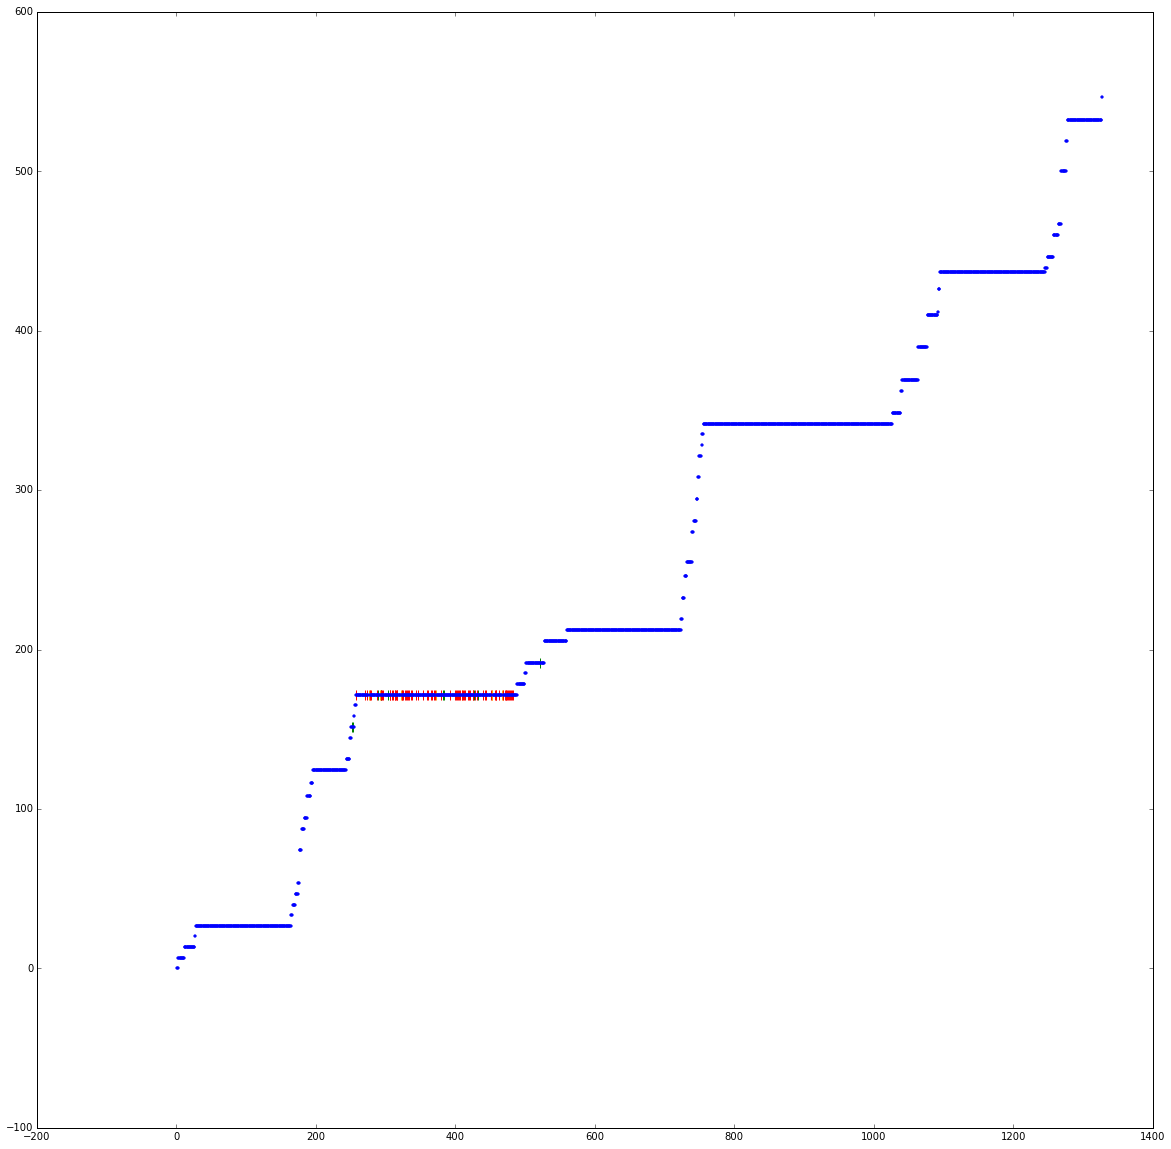

In [305]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))

x = range(1,len(trimmed_positions))
for i in x:
    if trimmed_positions[i] in Bv_XYs:
        plt.scatter(i, float(positions_only[i]), color = "red", marker = "|", s = 100 )
    if trimmed_positions[i] in GR_95x96_XYs:
        plt.scatter(i, float(positions_only[i]), color = "green", marker = "|", s = 100 )
    if trimmed_positions[i] in _93x94_XYs:
        plt.scatter(i, float(positions_only[i]), color = "orange",marker = "|",  s = 100 )
    else:
        plt.scatter(i, float(positions_only[i]), color = "blue" , s = 5)
        
plt.show()

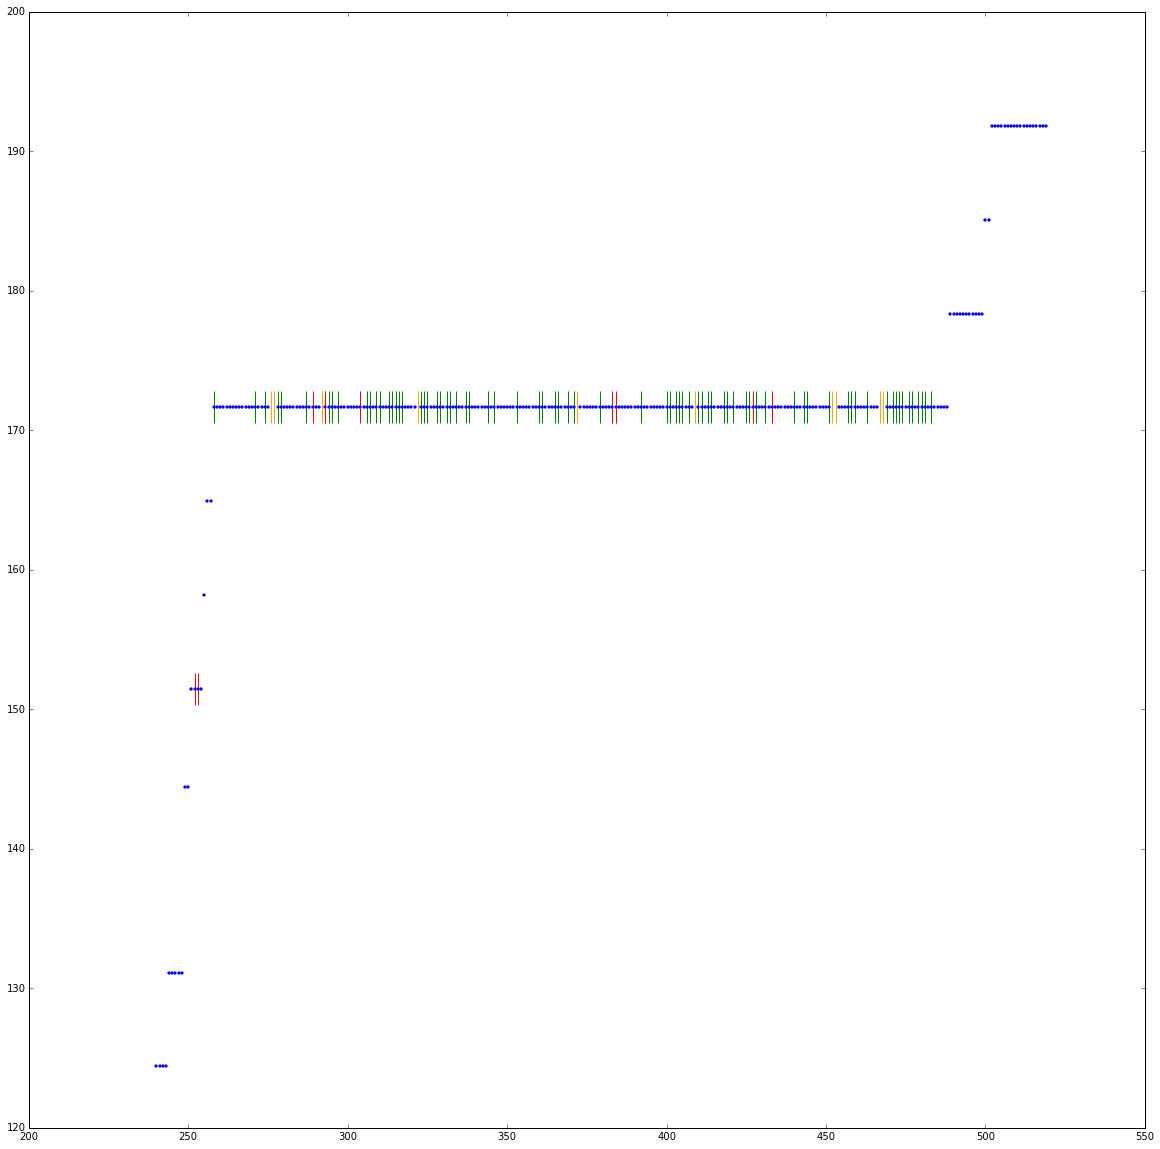

In [309]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))

x = range(240,520)
for i in x:
    if trimmed_positions[i] in Bv_XYs:
        plt.scatter(i, float(positions_only[i]), color = "green", marker = "|", s = 1000 )
    if trimmed_positions[i] in GR_95x96_XYs:
        plt.scatter(i, float(positions_only[i]), color = "red", marker = "|", s = 1000 )
    if trimmed_positions[i] in _93x94_XYs:
        plt.scatter(i, float(positions_only[i]), color = "orange", marker = "|", s = 1000 )
    else:
        plt.scatter(i, float(positions_only[i]), color = "blue" , s = 5)
        
plt.show()

This is a really nice way of visualising it. So it is clear that the third linkage block from the left is the sex chromosome. 

Which means that, if it truly is the sex linked region, the tags that are in that same linkage group are in fact all on the sex chromosome. So how many tags are in this linkage group all together (basically I will take all loci between map positions 151 and 191. Note also that the map positions of the sex linked markers are almost all 171.65, there are just a few markers either side which are slightly less linked. This is consistent with the known recombination at the tips of frog chromosomes but none in the middle. 

In [310]:
Bv_SLM_markers = []
count = 0
for i in range(len(trimmed_positions)):
    if float(positions_only[i]) > 151 and float(positions_only[i]) < 192:
        Bv_SLM_markers.append(trimmed_positions[i])
        count += 1
print "There are", count, "markers in the linkage group containing sex linked markers"

There are 277 markers in the linkage group containing sex linked markers


    So we started with 299 sex linked markers, 163 were included in the linkage map. They all hit in the same linkage block, suggesting that that linkage block is the sex chromosome. In that linkage block was 277 markers. So, 299 + 277 - 167 = 410

In [311]:
all_SLM_markers = list(allSLtags) + Bv_SLM_markers

print "Number of markers putatively on the sex chromosome=", len(set(all_SLM_markers))

Number of markers putatively on the sex chromosome= 413


Have accumulated a few extra loci - maybe those with more than 1 SNP. but thats not a problem, I can certainly work with 413 SNPs - beats 277.

So I now need to get a fasta from the catalog for these.

In [134]:
import gzip
catalog = gzip.open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/batch_1.catalog.tags.tsv.gz", 'r').readlines()[1:]
fasta = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Sex_linked_tags.fasta", 'w')

Sex_chrom_IDs = [i.split("_")[0] for i in all_SLM_markers]

cat_loci = []
for line in catalog:
    locus_ID = line.split()[2]
    cat_loci.append(locus_ID)
    if locus_ID in set(Sex_chrom_IDs):
        seq = line.split()[8]
        fasta.write(">%s\n%s\n" % (locus_ID,seq) )

fasta.close()


So, accounting for tags with more than one SNP, that gives me 355 sequences. 

### Now mapping

Tags ---> Bviridis transcript (unigene) IDs ---> Bviridis gene IDs ---> Xenopus scaff 1 gene IDs

In [147]:
mapping_outs = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/all_slm_tags_to_transc_blast.xml"
Bvirid_transcriptome = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/GDRL01.1.fa"
hit_diff = 1e-5
hit_thresh_min = 1e-20
window = 1000000

In [142]:
records = MISC.BlastParseExtra(mapping_outs,Bvirid_transcriptome,hit_diff,hit_thresh_min,window)

Number of multi-alingments kept: 4
Number of unique alingments kept: 17
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/GDRL01.1.fa . . . 
0 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_1000000_chunks.fa


In [145]:
unigenes = []
for i in records:
    unigenes.append(records[i]["Ref_hit_id"].split()[4].split("_")[0].split("e")[2])
    
### Get the gene IDs that go with the unigenes

Bvirid_annotations = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/Annotations/Bvirid_transcriptome_annotations.csv", 'r').readlines()[1:]

annotated_RAD_transcripts = {}

for line in Bvirid_annotations:
    unigene_ID = line.split()[0].split("_")[0].split("ne")[1]
    
    if unigene_ID in unigenes:
        
        if "GN=" in line:
            for field in line.split():
                if "GN=" in field:
                    gene_name = field.split("=")[1]
            annotated_RAD_transcripts[unigene_ID] = gene_name.lower() ## make sure its all lower case
            print "Unigene %s contains gene %s" % (unigene_ID, gene_name)
        else:
            print "No annotation for Bviridis transcript %s" % unigene_ID

### Now get the location of these genes in the Xenopus assembly

Xen_scaff_1_annotation = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/Annotations/Xen_scaffold_1_annotations.csv", 'r').readlines()

for line in Xen_scaff_1_annotation:
    gene_name = line.split()[6]
    
    if gene_name in annotated_RAD_transcripts.values():
        print gene_name

Unigene 1005 contains gene kdm3a-a
Unigene 101306 contains gene TPRXL
Unigene 104174 contains gene ccrn4l
No annotation for Bviridis transcript 105505
No annotation for Bviridis transcript 13941
No annotation for Bviridis transcript 147
No annotation for Bviridis transcript 44119
No annotation for Bviridis transcript 46808
No annotation for Bviridis transcript 5228
No annotation for Bviridis transcript 5714
No annotation for Bviridis transcript 60938
No annotation for Bviridis transcript 67696
No annotation for Bviridis transcript 69829
No annotation for Bviridis transcript 82323
No annotation for Bviridis transcript 82932
No annotation for Bviridis transcript 83519
No annotation for Bviridis transcript 88333
ccrn4l


In [146]:
annotated_RAD_transcripts

{'1005': 'kdm3a-a', '101306': 'tprxl', '104174': 'ccrn4l'}

### of these 3 annotated genes, two of them can be found on Xenopus chromosome 1 (kdma-a, ccrn4l)

What about the unannotated transcripts?? Now trying to map these to Xenopus, via Hyla and Nanorana if needed.

In [149]:
## Get the transcripts from the viridis transcriptome

from Bio import SeqIO

records_formatted = [records[i]["Ref_hit_id"].split("|")[1] for i in records] 

out_scaffs = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/allSLM_tags_to_transcr_blast_scaffs.fa", 'w')

counter = 0
for record in SeqIO.parse(Bvirid_transcriptome, "fasta"):
    if record.id.split("|")[1] in records_formatted:
        record.id = record.id.split("|")[1]
        counter += 1
        SeqIO.write(record,out_scaffs, "fasta")
print counter, "sequences"

out_scaffs.close()

17 sequences


In [ ]:
Tried mapping through Hyla, no luck.

In [152]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil


Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 8000

wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome"
prefix = "Bvirid_allSLM"


### Hyla chunks to Nanorana

print "\n##  Mapping transcripts to Nanorana  ##\n"

tags ="%s/%s" % (wd, "allSLM_tags_to_transcr_blast_scaffs.fa")
tags_Hyla_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "allSLM_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Nanorana_db, outfmt=5, out=tags_Hyla_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Hyla_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Hyla_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "allSLM_Nano_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Hyla_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Hyla_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "allSLM_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Hyla_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Hyla_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Hyla_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "allSLM_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping transcripts to Nanorana  ##

Number of multi-alingments kept: 0
Number of unique alingments kept: 1
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
1 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 1
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa . . . 
1 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa

##  Final Xenopus hits  ##

scaffold1762 Chr01


So there is one hit this way, but it contains the kdm3a-a gene that I already had. Now trying blast just to Xenopus.

In [154]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil


Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 8000

wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome"
prefix = "Bvirid_allSLM"


### transcripts direct to Xenopus

print "\n##  Mapping transcripts to Xenopus  ##\n"

tags ="%s/%s" % (wd, "allSLM_tags_to_transcr_blast_scaffs.fa")
transcripts_to_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "allSLM_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Xen_db, outfmt=5, out=transcripts_to_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(transcripts_to_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "allSLM_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping transcripts Xenopus  ##

Number of multi-alingments kept: 0
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa . . . 
0 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa

##  Final Xenopus hits  ##



No luck there either. Mapping just the Sex linked tags through hyla, nanorana and Xen is pointless, I get 2 tags mapping to Hyla, and can't get to Nanorana. So the transcriptome -> Xen or transcriptom -> Nanorana -> Xen is the best method.

### Now trying the linkage mapping in the other two families, in order to maximise the number of loci and confirm that sex linked loci from all families are on the same linkage group. 

Number of linkage groups: 9
The size of the linkage groups are: 1	1	1	1	2134	2	2	2	2	
The number of bins in each linkage group: 1	1	1	1	106	1	1	1	1	


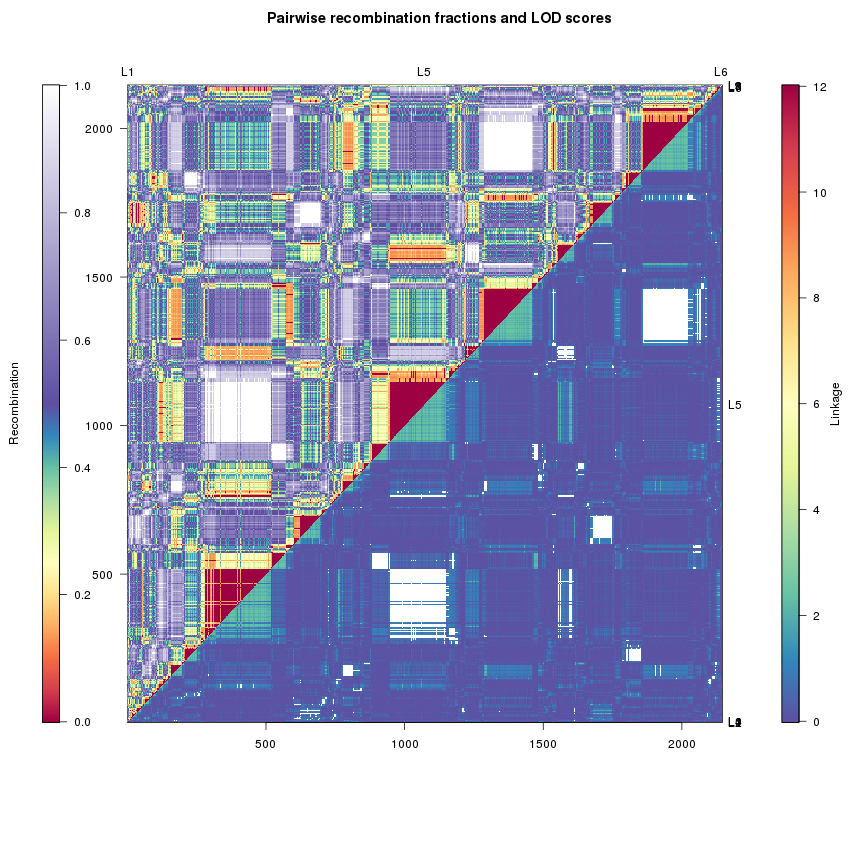

In [167]:
%%R -w 30 -h 30 -u cm

library(ASMap)

## Family Bv =============================================================

setwd("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/FAM_GR95x96")


Maldat <- read.delim("MST_male_map_input.txt", stringsAsFactors = F)

MstMale <- mstmap(Maldat, pop.type = "DH", dist.fun = "kosambi",
                  objective.fun = "COUNT", p.value = 1e-01, noMap.dist = 10, noMap.size = 1,
                  miss.thresh = 1, mvest.bc = FALSE, detectBadData = TRUE, as.cross = TRUE,
                  return.imputed = TRUE, trace = FALSE)

heatMap(MstMale)

Kept_maleLGs <- subsetCross(MstMale, chr = c("L2"))

#write(names(Kept_maleLGs$geno$L2$map), "Kept_male_linkage_group_L2.txt")

In [168]:
%%R
foo <- MstMale$geno$L5$map

bar <- as.data.frame(foo)

write.table(bar, "TEST_LG5_positions.txt")

In [203]:
positions = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/FAM_GR95x96/TEST_LG5_positions.txt", 'r').readlines()

trimmed_positions = []
positions_only = []

for i in positions:
    loc = i.split()[0]
    positions_only.append(i.split()[1])
    if loc.startswith("compli"):
        loc = "_".join(loc.split("_")[1:])
    trimmed_positions.append(loc)

In [204]:
count = 0
SLpositions = []
for i in range(len(trimmed_positions)):
    if trimmed_positions[i] in allSLtags:
        count += 1
        SLpositions.append(positions_only[i])
        #print trimmed_positions[i], positions_only[i]
        
print count, "out of", len(allSLtags), "sex linked tags present in map"
    
    

140 out of 299 sex linked tags present in map


In [247]:
allmarkers = [i.split()[0] for i in positions]

In [253]:
loci = []
for i in positions:
    if i.split()[0].startswith("compli"):
        loc = "_".join(i.split()[0].split("_")[1:])
        if loc not in loci:
            loci.append((loc, float(i.split()[1])))
            

In [254]:
loci

[('7030_653745', 0.0),
 ('8692_808327', 0.0),
 ('82735_7694291', 0.0),
 ('82735_7694311', 0.0),
 ('20783_1932812', 27.2391170411545),
 ('39466_3670270', 27.2391170411545),
 ('42968_3995964', 27.2391170411545),
 ('19084_1774753', 27.2391170411545),
 ('41699_3877963', 27.2391170411545),
 ('51301_4770918', 27.2391170411545),
 ('60460_5622721', 27.2391170411545),
 ('63120_5870155', 27.2391170411545),
 ('10495_976016', 43.8315725927166),
 ('34797_3236048', 43.8315725927166),
 ('37372_3475512', 43.8315725927166),
 ('44992_4184171', 43.8315725927166),
 ('45489_4230446', 43.8315725927166),
 ('52244_4858615', 43.8315725927166),
 ('60831_5657236', 43.8315725927166),
 ('60831_5657260', 43.8315725927166),
 ('64717_6018645', 43.8315725927166),
 ('70973_6600435', 43.8315725927166),
 ('86085_8005873', 43.8315725927166),
 ('1722_160140', 56.6022131868664),
 ('38543_3584477', 56.6022131868664),
 ('38543_3584492', 56.6022131868664),
 ('57524_5349716', 56.6022131868664),
 ('60865_5660442', 56.60221318686

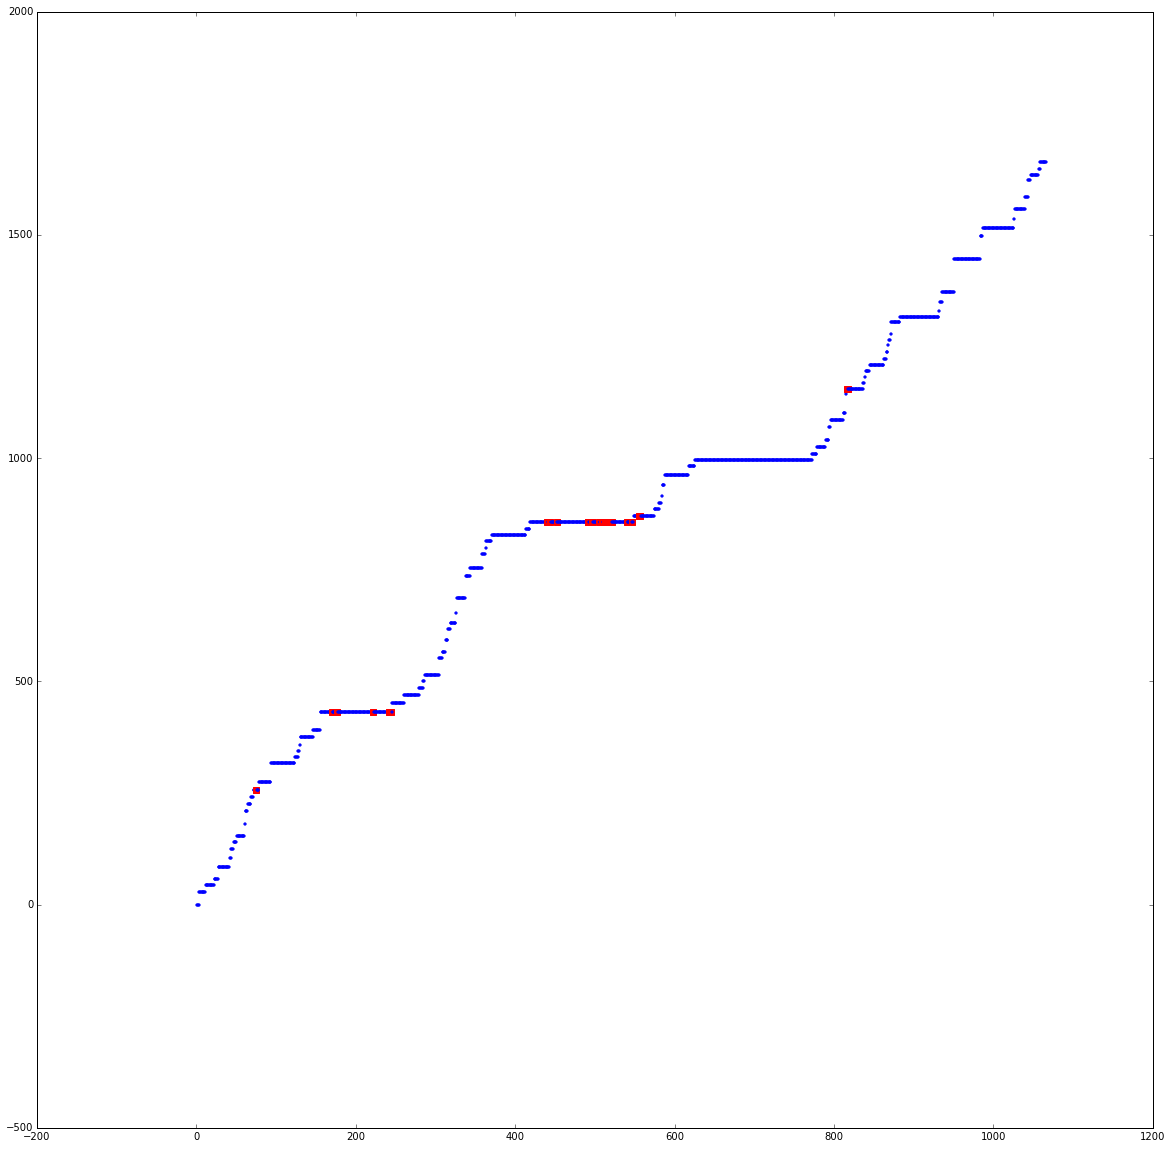

In [256]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))

x = range(1,len(loci))
for i in x:
    if loci[i][0] in SLM_markers:
        plt.scatter(i, loci[i][1], color = "red", marker = "s", s = 30 )
    else:
        plt.scatter(i, loci[i][1], color = "blue" , s = 5)
        
plt.show()




So, predictably, this map is no where near as nice, and the sex linked tags don't fall into a well formed block, it might be the map, it might be false positives. However, they are there, and there is one conspicuous cluster, so I can still try taking all the tags in that linkage block and mapping them to the transcriptome. So lets find out the map positions and get everything on the same blocks.

In [257]:
count =0
x = range(1,len(loci))
for i in x:
    if loci[i][0] in SLM_markers:
        count += 1
        print loci[i]

('7217_671162', 257.588238966096)
('64031_5954810', 431.375921772307)
('6427_597700', 431.375921772307)
('49064_4562872', 431.375921772307)
('72432_6736134', 431.375921772307)
('73310_6817806', 431.375921772307)
('15758_1465421', 856.678319275642)
('17994_1673399', 856.678319275642)
('21099_1962137', 856.678319275642)
('44921_4177591', 856.678319275642)
('44921_4177592', 856.678319275642)
('46353_4310773', 856.678319275642)
('47387_4406952', 856.678319275642)
('56460_5250763', 856.678319275642)
('59645_5546928', 856.678319275642)
('60603_5636043', 856.678319275642)
('60823_5656479', 856.678319275642)
('62705_5831501', 856.678319275642)
('64282_5978176', 856.678319275642)
('64282_5978177', 856.678319275642)
('64421_5991109', 856.678319275642)
('64421_5991142', 856.678319275642)
('73312_6817936', 856.678319275642)
('31419_2921898', 856.678319275642)
('32799_3050251', 871.232785809048)
('32799_3050301', 871.232785809048)
('2007_186645', 1156.03704490278)
('2007_186652', 1156.03704490278)


So its the loci in the 856 region that are the most convincing. Lets see how these perform.

In [260]:

SLM_markers_GR95_96 = []
x = range(1,len(loci))
for i in x:
    if float(loci[i][1]) == 856.678319275642:
        #print trimmed_positions[i], positions_only[i]
        SLM_markers_GR95_96.append(loci[i][0])
        
print "Number of markers linked to SLMs =", len(set(SLM_markers_GR95_96))

Number of markers linked to SLMs = 130


How does this set compare to that found in family Bv?

<matplotlib_venn._common.VennDiagram instance at 0x7fe526fec050>

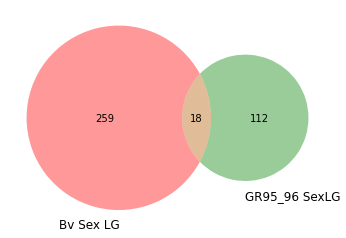

In [270]:
from matplotlib_venn import venn2

venn2((set(Bv_SLM_markers), set(SLM_markers_GR95_96)), ("Bv Sex LG", "GR95_96 SexLG"))


Great, so there is some overlap, which is reassuring, but there are also a lot more tags. So lets map them to the transcriptome now and see if we can squeeze out any more genes in Xenopus

## Mapping 

First, get tags from catalog

In [262]:
import gzip
catalog = gzip.open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/batch_1.catalog.tags.tsv.gz", 'r').readlines()[1:]
fasta = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Linkage_maps/Bv_GR95_96_Sex_linked_tags.fasta", 'w')


ALL_SLM_markers = set(all_SLM_markers + SLM_markers_GR95_96)

Sex_chrom_IDs = [i.split("_")[0] for i in ALL_SLM_markers]

cat_loci = []
for line in catalog:
    locus_ID = line.split()[2]
    cat_loci.append(locus_ID)
    if locus_ID in set(Sex_chrom_IDs):
        seq = line.split()[8]
        fasta.write(">%s\n%s\n" % (locus_ID,seq) )

fasta.close()

That gives me 404 tags to map! About 60 more than I had without this second family. 

In [263]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil


Bviridis_transcriptome = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/GDRL01.1.fa"
Bviridis_transcriptome_db =  "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/GDRL01.1.fa"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"

best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 8000

wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome"
prefix = "Bv_GR95_95_all_SLM"


### Hyla chunks to Nanorana

print "\n##  Mapping transcripts to Nanorana  ##\n"

tags ="%s/%s" % (wd, "Bv_GR95_96_Sex_linked_tags.fasta")
tags_transcriptome_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "allSLM_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Bviridis_transcriptome_db, outfmt=5, out=tags_transcriptome_blastnouts)
stdout, stderr = blastn_cline()

Bv_GR95_96_transcriptome_records = MISC.BlastParseExtra(tags_transcriptome_blastnouts, Bviridis_transcriptome , best_hit_crit, Eval_threshold,Window)

Bv_GR95_96_transcriptome_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Bv_GR95_96_transcriptome_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Bv_GR95_96_transcriptome_chunks)



##  Mapping transcripts to Nanorana  ##

Number of multi-alingments kept: 13
Number of unique alingments kept: 27
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/GDRL01.1.fa . . . 
0 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa


In [264]:
unigenes = []
for i in Bv_GR95_96_transcriptome_records:
    unigenes.append(Bv_GR95_96_transcriptome_records[i]["Ref_hit_id"].split()[4].split("_")[0].split("e")[2])
    
### Get the gene IDs that go with the unigenes

Bvirid_annotations = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/Annotations/Bvirid_transcriptome_annotations.csv", 'r').readlines()[1:]

annotated_RAD_transcripts = {}

for line in Bvirid_annotations:
    unigene_ID = line.split()[0].split("_")[0].split("ne")[1]
    
    if unigene_ID in unigenes:
        
        if "GN=" in line:
            for field in line.split():
                if "GN=" in field:
                    gene_name = field.split("=")[1]
            annotated_RAD_transcripts[unigene_ID] = gene_name.lower() ## make sure its all lower case
            print "Unigene %s contains gene %s" % (unigene_ID, gene_name)
        else:
            print "No annotation for Bviridis transcript %s" % unigene_ID

### Now get the location of these genes in the Xenopus assembly

Xen_scaff_1_annotation = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/Annotations/Xen_scaffold_1_annotations.csv", 'r').readlines()

for line in Xen_scaff_1_annotation:
    gene_name = line.split()[6]
    
    if gene_name in annotated_RAD_transcripts.values():
        print gene_name

Unigene 1005 contains gene kdm3a-a
No annotation for Bviridis transcript 100728
Unigene 101306 contains gene TPRXL
No annotation for Bviridis transcript 101774
Unigene 104174 contains gene ccrn4l
No annotation for Bviridis transcript 105505
Unigene 106721 contains gene SVIL
No annotation for Bviridis transcript 11241
No annotation for Bviridis transcript 13941
No annotation for Bviridis transcript 147
No annotation for Bviridis transcript 3217
No annotation for Bviridis transcript 44119
No annotation for Bviridis transcript 46808
No annotation for Bviridis transcript 47491
No annotation for Bviridis transcript 51660
No annotation for Bviridis transcript 5228
No annotation for Bviridis transcript 55605
No annotation for Bviridis transcript 5714
No annotation for Bviridis transcript 59362
No annotation for Bviridis transcript 60938
No annotation for Bviridis transcript 67696
No annotation for Bviridis transcript 69829
No annotation for Bviridis transcript 72728
No annotation for Bviridis

In [234]:
## Get the transcripts from the viridis transcriptome

from Bio import SeqIO

records_formatted = [Bv_GR95_96_transcriptome_records[i]["Ref_hit_id"].split("|")[1] for i in Bv_GR95_96_transcriptome_records] 

out_scaffs = open("/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/Bv_GR95_96_transcriptome_blast_scaffs.fa", 'w')

counter = 0
for record in SeqIO.parse(Bvirid_transcriptome, "fasta"):
    if record.id.split("|")[1] in records_formatted:
        record.id = record.id.split("|")[1]
        counter += 1
        SeqIO.write(record,out_scaffs, "fasta")
print counter, "sequences"

out_scaffs.close()

33 sequences


In [235]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil


Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 8000

wd = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome"
prefix = "Bvirid_allSLM"


### Hyla chunks to Nanorana

print "\n##  Mapping transcripts to Nanorana  ##\n"

tags ="%s/%s" % (wd, "Bv_GR95_96_transcriptome_blast_scaffs.fa")
tags_Hyla_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "allSLM_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Nanorana_db, outfmt=5, out=tags_Hyla_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Hyla_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Hyla_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "allSLM_Nano_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Hyla_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Hyla_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "allSLM_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Hyla_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Hyla_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Hyla_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "allSLM_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping transcripts to Nanorana  ##

Number of multi-alingments kept: 0
Number of unique alingments kept: 2
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
2 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 1
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa . . . 
1 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa

##  Final Xenopus hits  ##

scaffold1762 Chr01


### Finally trying blastx

In [236]:

best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 8000


blastx_outs = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/Bv_GR95_96_transcriptome_blastx.xml"

Xen_records = MISC.BlastParseExtra(blastx_outs, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Number of multi-alingments kept: 3
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa . . . 
3 sequence scaffold segments are in /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Bviridis_transcriptome/blast_8000_chunks.fa


In [237]:
Xen_records


{u'GDRL01000948.1 gb|GDRL01000948.1| TSA: Bufotes viridis Unigene1005_Bufo_viridis transcribed RNA sequence': {'Evalue': 0.0,
  'Hit_end_coord': 11405432,
  'Hit_start_coord': 11405250,
  'Ref_hit_id': 'Chr01'},
 u'GDRL01074880.1 gb|GDRL01074880.1| TSA: Bufotes viridis Unigene104174_Bufo_viridis transcribed RNA sequence': {'Evalue': 7.0875e-94,
  'Hit_end_coord': 51741263,
  'Hit_start_coord': 51740838,
  'Ref_hit_id': 'Chr01'},
 u'GDRL01077427.1 gb|GDRL01077427.1| TSA: Bufotes viridis Unigene106721_Bufo_viridis transcribed RNA sequence': {'Evalue': 3.38801e-49,
  'Hit_end_coord': 15202722,
  'Hit_start_coord': 15202582,
  'Ref_hit_id': 'Chr06'}}

So these are the 3 hits that I already had. Basically, whatever is annotated in he virids transcriptome will map to Xenopus, but nothing else.

One more thing - blastx to the Nanorana genome, to see if I can get any larger chunks to map over to xenopus.